In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import random as rd
import matplotlib.pyplot as plt
import itertools
from tensorflow.keras.layers import GRU, Input, Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasRegressor  # Wrapper da scikeras
from sklearn.model_selection import GridSearchCV
import json


df = pd.read_excel('Dataset-Project-Deep-Learning-SMRES-Unificato.xlsx')





In [2]:
import pandas as pd


# Crea una colonna di timestamp orari
df['Data'] = pd.date_range(start='2021-01-01 00:00:00', periods=len(df), freq='H')

print(df.head(10))

                 Data    Ora  Potenza Uffici [W]  Temperatura [K]  \
0 2021-01-01 00:00:00  00:00               38808           279.09   
1 2021-01-01 01:00:00  01:00               38388           279.86   
2 2021-01-01 02:00:00  02:00               39816           279.73   
3 2021-01-01 03:00:00  03:00               38808           279.99   
4 2021-01-01 04:00:00  04:00               38976           280.19   
5 2021-01-01 05:00:00  05:00               38052           280.65   
6 2021-01-01 06:00:00  06:00               38892           280.71   
7 2021-01-01 07:00:00  07:00               42336           281.17   
8 2021-01-01 08:00:00  08:00               41664           282.16   
9 2021-01-01 09:00:00  09:00               39144           282.51   

   Nuvolosità [%]  Irraggiamento [kWh/m2]  
0               0                 0.00000  
1               0                 0.00000  
2               0                 0.00000  
3               0                 0.00000  
4               0   

/var/folders/fj/jf8_1bs122n5rv0h0w7bdgh00000gn/T/ipykernel_1568/2767103168.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['Data'] = pd.date_range(start='2021-01-01 00:00:00', periods=len(df), freq='H')


In [16]:
day = 24*60*60
year = (365.2425)*day
hour=36000
date_time = pd.to_datetime(df.pop('Data'), format='%d.%m.%Y %H:%M:%S')
timestamp_s = date_time.map(pd.Timestamp.timestamp)
df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))
df['Hour sin'] = np.sin(timestamp_s * (2 * np.pi / hour))
df['Hour cos'] = np.cos(timestamp_s * (2 * np.pi / hour))

plt.plot(np.array(df['Year sin']))
plt.plot(np.array(df['Year cos']))
plt.xlabel('Time [h]')
plt.title('Time of year signal')

plt.plot(np.array(df['Hour sin'])[:24])
plt.plot(np.array(df['Hour cos'])[:24])
plt.xlabel('Time [h]')
plt.title('Time of hour signal')

plt.plot(np.array(df['Day sin'])[:25])
plt.plot(np.array(df['Day cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of day signal')


KeyError: 'Data'

Text(0.5, 1.0, 'Time of year signal')

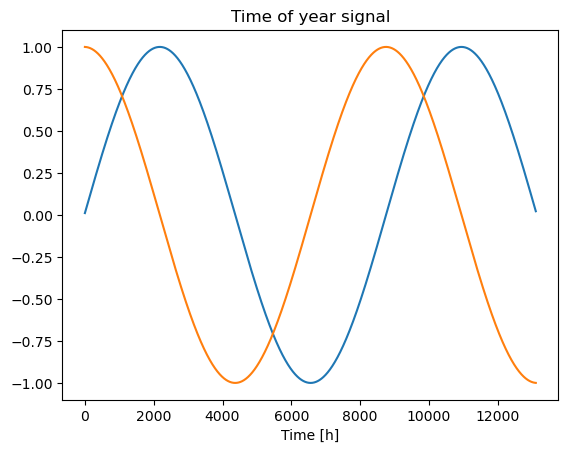

In [ ]:
plt.plot(np.array(df['Year sin']))
plt.plot(np.array(df['Year cos']))
plt.xlabel('Time [h]')
plt.title('Time of year signal')


Text(0.5, 1.0, 'Time of day signal')

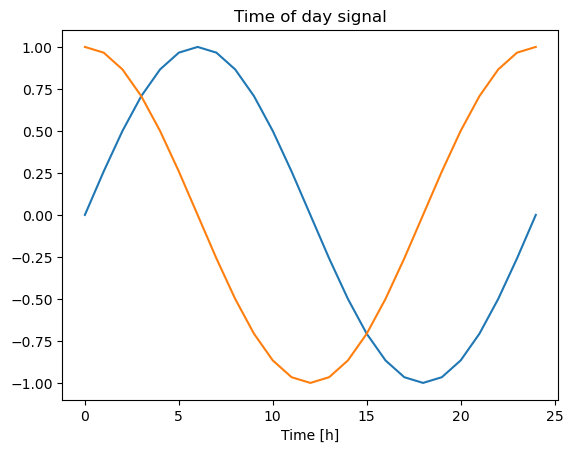

In [4]:
plt.plot(np.array(df['Day sin'])[:25])
plt.plot(np.array(df['Day cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of day signal')


In [7]:
df['Hour cos']

0        0.309017
1       -0.309017
2       -0.809017
3       -1.000000
4       -0.809017
           ...   
13099    0.809017
13100    0.309017
13101   -0.309017
13102   -0.809017
13103   -1.000000
Name: Hour cos, Length: 13104, dtype: float64

Text(0.5, 1.0, 'Time of hour signal')

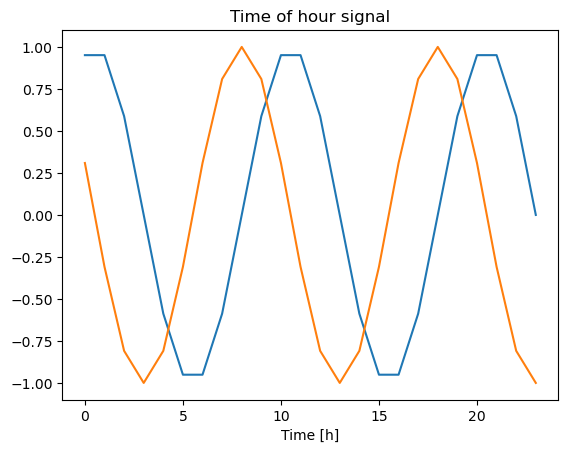

In [6]:
plt.plot(np.array(df['Hour sin'])[:24])
plt.plot(np.array(df['Hour cos'])[:24])
plt.xlabel('Time [h]')
plt.title('Time of hour signal')

In [ ]:
df.info()

In [7]:

features = [
    "Potenza Uffici [W]", "Temperatura [K]", "Nuvolosità [%]",
    "Irraggiamento [kWh/m2]", "Day sin", "Day cos",
    "Year sin", "Year cos", "Hour sin", "Hour cos"
]
data = df[features].copy()

# Calcolo media e std per ogni colonna
data_mean = data.mean()
data_devstd = data.std()

# Crea il DataFrame standardizzato (IMPORTANTE)
data_std = (data - data_mean) / data_devstd

# Suddivisione in train, val, test A PARTIRE DA data_std
n = len(data_std)
train_data_std = data_std.iloc[: int(n * 0.7)]
val_data_std   = data_std.iloc[int(n * 0.7) : int(n * 0.9)]
test_data_std  = data_std.iloc[int(n * 0.9) : ]



In [ ]:

data2 = pd.read_excel('/Users/mattiacastiello/Desktop/ProgettiDeepLearning/TimeSeries/Dataset-Project-Deep-Learning-SMRES-Scartati.xlsx')
data2 = data2[data2['Data'] <= '2022-09-01']
eval_start_date = data2['Data'].min()
data2['Data'] = pd.date_range(start='2022-07-01 00:00:00', periods=len(data2), freq='H')
date_time = pd.to_datetime(data2.pop('Data'), format='%d.%m.%Y %H:%M:%S')
timestamp_s = date_time.map(pd.Timestamp.timestamp)
data2['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
data2['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
data2['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
data2['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))
data2['Hour sin'] = np.sin(timestamp_s * (2 * np.pi / hour))
data2['Hour cos'] = np.cos(timestamp_s * (2 * np.pi / hour))
evaluation_data = data2.copy()  


evaluation_data_std = (evaluation_data[features] - data_mean) / data_devstd

/var/folders/fj/jf8_1bs122n5rv0h0w7bdgh00000gn/T/ipykernel_1568/2354255123.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data2['Data'] = pd.date_range(start='2021-01-01 00:00:00', periods=len(data2), freq='H')


In [11]:
evaluation_data_std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1488 entries, 0 to 1487
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Potenza Uffici [W]      1488 non-null   float64
 1   Temperatura [K]         1488 non-null   float64
 2   Nuvolosità [%]          1488 non-null   float64
 3   Irraggiamento [kWh/m2]  1488 non-null   float64
 4   Day sin                 1488 non-null   float64
 5   Day cos                 1488 non-null   float64
 6   Year sin                1488 non-null   float64
 7   Year cos                1488 non-null   float64
 8   Hour sin                1488 non-null   float64
 9   Hour cos                1488 non-null   float64
dtypes: float64(10)
memory usage: 116.4 KB


In [ ]:
import numpy as np                        
import tensorflow as tf                  
from tensorflow.keras import Input, Model 
from tensorflow.keras.layers import Dense, LSTM, Concatenate  
from tensorflow.keras.callbacks import EarlyStopping         
import matplotlib.pyplot as plt           
import os                                 
import random as rd                       

# Definizione delle feature statiche 
static_features = ['Year sin', 'Year cos', 'Hour sin', 'Hour cos',
                  'Day sin', 'Day cos', 'Nuvolosità [%]']
# Feature dinamiche 
dynamic_features = ['Irraggiamento [kWh/m2]', 'Temperatura [K]', 'Potenza Uffici [W]']
# Colonna target da prevedere
target_col = 'Potenza Uffici [W]'

def create_dataset(df, window_size, static_feats, dynamic_feats, target):
    """
    Funzione che crea dataset con finestre temporali per series forecasting
    
    Args:
        df: DataFrame contenente i dati
        window_size: Dimensione della finestra temporale per le feature dinamiche
        static_feats: Lista di feature statiche
        dynamic_feats: Lista di feature dinamiche
        target: Colonna target da prevedere
        
    Returns:
        X_stat: Array delle feature statiche
        X_dyn: Array delle feature dinamiche organizzate in finestre temporali
        y: Array dei valori target
    """
    X_stat, X_dyn, y = [], [], []
    
    for i in range(window_size, len(df)):
        # Estrae una finestra di feature dinamiche: [i-window_size, i)
        dyn_window = df[dynamic_feats].iloc[i-window_size:i].values
        X_dyn.append(dyn_window)
        
        # Estrae le feature statiche al timestep corrente i
        stat_current = df[static_feats].iloc[i].values
        X_stat.append(stat_current)
        
        # Estrae il valore target al timestep corrente i
        y.append(df[target].iloc[i])
    
    return np.array(X_stat), np.array(X_dyn), np.array(y)

window_size = 24  # Finestra di 24 ore (dati orari)

# Creazione dei dataset di training, validazione e test
X_stat_train, X_dyn_train, y_train = create_dataset(
    train_data_std, window_size, static_features, dynamic_features, target_col
)
X_stat_val, X_dyn_val, y_val = create_dataset(
    val_data_std, window_size, static_features, dynamic_features, target_col
)
X_stat_test, X_dyn_test, y_test = create_dataset(
    test_data_std, window_size, static_features, dynamic_features, target_col
)

# Stampa delle dimensioni dei dataset creati
print("Shapes:")
print(" X_stat_train:", X_stat_train.shape)
print(" X_dyn_train:", X_dyn_train.shape)
print(" y_train:", y_train.shape)

Shapes:
 X_stat_train: (9148, 7)
 X_dyn_train: (9148, 24, 3)
 y_train: (9148,)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_dynamic       │ (None, 24, 3)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_static        │ (None, 7)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 24, 100)   │     41,600 │ input_dynamic[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 100)       │        800 │ input_static[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ (None, 100)       │     80,400 │ lstm[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 200)       │          0 │ dense[0][0],      │
│ (Concatenate)       │                   │            │ lstm_1[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 1)         │        201 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 123,001 (480.47 KB)

 Trainable params: 123,001 (480.47 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import numpy as np                        # Libreria per calcoli numerici
import tensorflow as tf                   # Framework per deep learning
from tensorflow.keras import Input, Model # Componenti di base per la creazione del modello
from tensorflow.keras.layers import Dense, LSTM, Concatenate, Dropout  # Layer specifici 
from tensorflow.keras.callbacks import EarlyStopping  # Per interrompere l'addestramento anticipatamente
from scikeras.wrappers import KerasRegressor  # Wrapper per usare Keras con scikit-learn
from sklearn.model_selection import GridSearchCV  # Per ottimizzazione degli iperparametri


def build_model(static_units=100, lstm_units=100, dropout_rate=0.0, learning_rate=0.001):
    """
    Funzione di creazione del modello parametrizzata per la grid search
    
    Args:
        static_units: Numero di unità nel layer Dense per le feature statiche
        lstm_units: Numero di unità nei layer LSTM per le feature dinamiche
        dropout_rate: Tasso di dropout per la regolarizzazione
        learning_rate: Tasso di apprendimento per l'ottimizzatore Adam
        
    Returns:
        model: Modello Keras compilato
    """
    # Input per le feature statiche
    input_stat = Input(shape=(len(static_features),), name='input_static')
    # Input per le feature dinamiche (sequenza temporale)
    input_dyn = Input(shape=(window_size, len(dynamic_features)), name='input_dynamic')
    
    # Ramo statico con Dense layer e Dropout
    x_stat = Dense(static_units, activation='relu')(input_stat)
    x_stat = Dropout(dropout_rate)(x_stat)  # Aggiunge regolarizzazione dropout
    
    # Ramo dinamico: due layer LSTM con dropout interno
    x_dyn = LSTM(lstm_units, activation='relu', return_sequences=True, dropout=dropout_rate)(input_dyn)
    x_dyn2 = LSTM(lstm_units, activation='relu', dropout=dropout_rate)(x_dyn)
    
    # Concatenazione dei risultati dei due rami
    merged = Concatenate()([x_stat, x_dyn2])
    output = Dense(1)(merged)  # Layer di output con singolo neurone (regressione)
    
    # Definizione dell'ottimizzatore Adam con learning rate parametrizzato
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model = Model(inputs=[input_stat, input_dyn], outputs=output)
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_squared_error'])
    model.summary()
    return model

regressor = KerasRegressor(
    model=build_model,
    epochs=50,  
    batch_size=64,  
    callbacks=[EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)],  # Early stopping
    verbose=0  
)

# Griglia di iperparametri da esplorare durante la grid search
param_grid = {
    'model__static_units': [50, 100, 150],  
    'model__lstm_units': [50, 100, 150],    
    'model__dropout_rate': [0.0, 0.1, 0.2], 
    'model__learning_rate': [0.01, 0.001, 0.0001],  
    'batch_size': [32, 64, 128]  
}

grid = GridSearchCV(
    estimator=regressor,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Metrica da ottimizzare (MSE negativo)
    cv=3,  # 3-fold cross-validation
    verbose=2,   # Output dettagliato durante la ricerca
    n_jobs=-1    # Utilizza tutti i core disponibili
)

# Addestra e valuta modelli con tutte le combinazioni di iperparametri
grid_result = grid.fit(
    {"input_static": X_stat_train, "input_dynamic": X_dyn_train},  # Input divisi in statici e dinamici
    y_train  # Target
)
print("Migliori parametri:", grid_result.best_params_)  # Stampa la migliore combinazione di parametri
print("Miglior punteggio (neg MSE):", grid_result.best_score_)  # Stampa il miglior punteggio

# Valuta il modello migliore sul set di test
test_loss = grid.score(
    {"input_static": X_stat_test, "input_dynamic": X_dyn_test},
    y_test
)
print("Test Loss:", test_loss)  # Stampa la loss sul test set

Shapes:
 X_stat_train: (9148, 7)
 X_dyn_train: (9148, 24, 3)
 y_train: (9148,)
Total parameter combinations: 72
Starting Grid Search 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.



Training model with params: learning_rate=0.01, dropout_rate=0.2

Training model with params: learning_rate=0.005, dropout_rate=0.2

Training model with params: learning_rate=0.005, dropout_rate=0.2

Training model with params: learning_rate=0.01, dropout_rate=0.2

Training model with params: learning_rate=0.001, dropout_rate=0.2

Training model with params: learning_rate=0.001, dropout_rate=0.3

Training model with params: learning_rate=0.01, dropout_rate=0.2

Training model with params: learning_rate=0.005, dropout_rate=0.2

Training model with params: learning_rate=0.01, dropout_rate=0.2

Training model with params: learning_rate=0.001, dropout_rate=0.3

Training model with params: learning_rate=0.005, dropout_rate=0.2

Training model with params: learning_rate=0.001, dropout_rate=0.2

Training model with params: learning_rate=0.001, dropout_rate=0.2

Training model with params: learning_rate=0.001, dropout_rate=0.2
Completed in 580.47s - Val Loss: 0.047988

Training model with par

[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed: 11.0min



Training model with params: learning_rate=0.001, dropout_rate=0.5
Completed in 664.70s - Val Loss: 0.050297

Training model with params: learning_rate=0.001, dropout_rate=0.5
Completed in 697.97s - Val Loss: 0.058096


/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



Training model with params: learning_rate=0.005, dropout_rate=0.5
Completed in 710.58s - Val Loss: 0.064991

Training model with params: learning_rate=0.005, dropout_rate=0.5
Completed in 815.46s - Val Loss: 0.045999
Completed in 758.75s - Val Loss: 0.056993

Training model with params: learning_rate=0.005, dropout_rate=0.5

Training model with params: learning_rate=0.005, dropout_rate=0.5
Completed in 804.45s - Val Loss: 0.051711

Training model with params: learning_rate=0.01, dropout_rate=0.5
Completed in 813.43s - Val Loss: 0.045970

Training model with params: learning_rate=0.01, dropout_rate=0.5
Completed in 814.55s - Val Loss: 0.048218

Training model with params: learning_rate=0.01, dropout_rate=0.5
Completed in 826.80s - Val Loss: 0.052344
Completed in 813.42s - Val Loss: 0.048878

Training model with params: learning_rate=0.01, dropout_rate=0.5

Training model with params: learning_rate=0.001, dropout_rate=0.2
Completed in 821.79s - Val Loss: 0.185916

Training model with pa

[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed: 62.8min finished


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0398 - mean_squared_error: 0.0398



Final Test Loss with Best Model: [0.05989929661154747, 0.05989929661154747]
Best model saved as 'best_hybrid_lstm_model.h5'


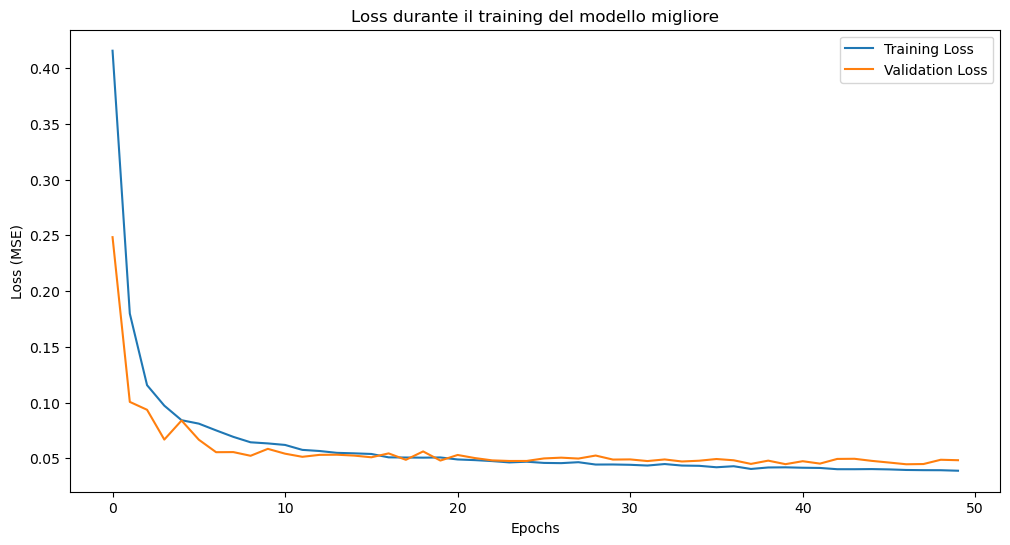

In [14]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense, LSTM, Concatenate, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import ParameterGrid
import matplotlib.pyplot as plt
import os
import random as rd
from joblib import Parallel, delayed
import time

# --- DEFINIZIONE DELLA FUNZIONE PER CREARE IL DATASET ---
static_features = ['Year sin', 'Year cos', 'Hour sin', 'Hour cos', 
                   'Day sin', 'Day cos', 'Nuvolosità [%]']
dynamic_features = ['Irraggiamento [kWh/m2]', 'Temperatura [K]', 'Potenza Uffici [W]']
target_col = 'Potenza Uffici [W]'

def create_dataset(df, window_size, static_feats, dynamic_feats, target):
    X_stat, X_dyn, y = [], [], []
    # Partiamo da index = window_size (così possiamo prendere i dati precedenti)
    for i in range(window_size, len(df)):
        # Finestra delle feature dinamiche: [i-window_size, i)
        dyn_window = df[dynamic_feats].iloc[i-window_size:i].values
        X_dyn.append(dyn_window)
        
        # Feature statiche al timestep i
        stat_current = df[static_feats].iloc[i].values
        X_stat.append(stat_current)
        
        # Target al timestep i
        y.append(df[target].iloc[i])
    
    return np.array(X_stat), np.array(X_dyn), np.array(y)

# --- COSTRUZIONE DEI DATASET ---
# Si assume che train_data_std, val_data_std e test_data_std siano già definiti
window_size = 24

X_stat_train, X_dyn_train, y_train = create_dataset(
    train_data_std, window_size, static_features, dynamic_features, target_col
)
X_stat_val, X_dyn_val, y_val = create_dataset(
    val_data_std, window_size, static_features, dynamic_features, target_col
)
X_stat_test, X_dyn_test, y_test = create_dataset(
    test_data_std, window_size, static_features, dynamic_features, target_col
)

print("Shapes:")
print(" X_stat_train:", X_stat_train.shape)
print(" X_dyn_train:", X_dyn_train.shape)
print(" y_train:", y_train.shape)

# --- FUNZIONE PER CREARE IL MODELLO CON PARAMETRI VARIABILI ---
def create_model(learning_rate, dropout_rate):
    # Pulizia della sessione per evitare problemi di memoria
    tf.keras.backend.clear_session()
    
    input_stat = Input(shape=(len(static_features),), name='input_static')
    input_dyn = Input(shape=(window_size, len(dynamic_features)), name='input_dynamic')

    # Ramo statico con dropout
    x_stat = Dense(100, activation='relu')(input_stat)
    x_stat = Dropout(dropout_rate)(x_stat)

    # Ramo dinamico con dropout
    # Primo LSTM restituisce sequenze
    x_dyn = LSTM(100, activation='relu', return_sequences=True)(input_dyn)
    x_dyn = Dropout(dropout_rate)(x_dyn)
    # Secondo LSTM: anche qui restituisce sequenze per mantenere la dimensione 3D
    x_dyn2 = LSTM(100, activation='relu', return_sequences=True)(x_dyn)
    # Terzo LSTM: l'ultimo non necessita di return_sequences
    x_dyn3 = LSTM(100, activation='relu')(x_dyn2)
    x_dyn4 = Dropout(dropout_rate)(x_dyn3)

    # Concatenazione dei rami statico e dinamico
    merged = Concatenate()([x_stat, x_dyn4])
    output = Dense(1)(merged)

    model = Model(inputs=[input_stat, input_dyn], outputs=output)
    
    # Compilazione del modello con Adam e learning rate personalizzato
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, 
                  loss='mean_squared_error', 
                  metrics=['mean_squared_error'])
    
    return model

# --- GRID SEARCH CON PARALLELIZZAZIONE ---
def train_and_evaluate(params, X_stat_train, X_dyn_train, y_train, X_stat_val, X_dyn_val, y_val):
    learning_rate = params['learning_rate']
    dropout_rate = params['dropout_rate']
    
    print(f"\nTraining model with params: learning_rate={learning_rate}, dropout_rate={dropout_rate}")
    
    # Creazione del modello con i parametri correnti
    model = create_model(learning_rate, dropout_rate)
    
    # Early stopping per evitare overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)
    
    # Training
    start_time = time.time()
    history = model.fit(
        x=[X_stat_train, X_dyn_train],
        y=y_train,
        validation_data=([X_stat_val, X_dyn_val], y_val),
        epochs=50,
        batch_size=128,
        callbacks=[early_stopping],
        verbose=0  # Disattivato per chiarezza nell'output
    )
    
    # Valutazione
    val_loss = model.evaluate([X_stat_val, X_dyn_val], y_val, verbose=0)[0]
    training_time = time.time() - start_time
    
    # Stampa risultati
    print(f"Completed in {training_time:.2f}s - Val Loss: {val_loss:.6f}")
    
    return {
        'params': params,
        'val_loss': val_loss,
        'history': history.history,
        'model': model,
        'training_time': training_time
    }

# Definizione dello spazio dei parametri
param_grid = {
    'learning_rate': [0.001, 0.005, 0.01],
    'dropout_rate': [0.2, 0.3, 0.5],
    'model__static_units': [50, 100],
    'model__lstm_units': [50, 100],
    'batch_size': [32, 64]
}

# Creazione della griglia di parametri
grid = list(ParameterGrid(param_grid))
print(f"Total parameter combinations: {len(grid)}")

# Esecuzione del grid search in parallelo con n_jobs=-1 (tutti i core disponibili)
print("Starting Grid Search ")
results = Parallel(n_jobs=-1, verbose=2)(
    delayed(train_and_evaluate)(
        params, X_stat_train, X_dyn_train, y_train, X_stat_val, X_dyn_val, y_val
    ) for params in grid
)

# Ordinamento dei risultati per val_loss
results.sort(key=lambda x: x['val_loss'])

# Stampa dei risultati in ordine di performance
print("\nGrid Search Results (sorted by validation loss):")
for i, result in enumerate(results):
    params = result['params']
    val_loss = result['val_loss']
    time_taken = result['training_time']
    print(f"{i+1}. Val Loss: {val_loss:.6f}, Learning Rate: {params['learning_rate']}, "
          f"Dropout Rate: {params['dropout_rate']}, Time: {time_taken:.2f}s")

# Recupero del modello migliore
best_result = results[0]
best_model = best_result['model']
best_params = best_result['params']

print(f"\nBest Model Parameters:")
print(f"  Learning Rate: {best_params['learning_rate']}")
print(f"  Dropout Rate: {best_params['dropout_rate']}")
print(f"  Validation Loss: {best_result['val_loss']:.6f}")

# Test finale con il modello migliore
test_loss = best_model.evaluate([X_stat_test, X_dyn_test], y_test)
print(f"\nFinal Test Loss with Best Model: {test_loss}")

# Salvataggio del modello migliore
best_model.save("best_hybrid_lstm_model.h5")
print("Best model saved as 'best_hybrid_lstm_model.h5'")

# Visualizzazione dell'andamento della loss durante il training per il modello migliore
plt.figure(figsize=(12, 6))
plt.plot(best_result['history']['loss'], label='Training Loss')
plt.plot(best_result['history']['val_loss'], label='Validation Loss')
plt.title('Loss durante il training del modello migliore')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.savefig('best_model_tr')

Executing single-chain autoregressive inference from the BEGINNING with Optimized_Hybrid_Model...
Single-chain forecast completed. Global RMSE=30921.13, Global NMAE=0.2609
Results saved to Hybrid_model_single_forecast.xlsx


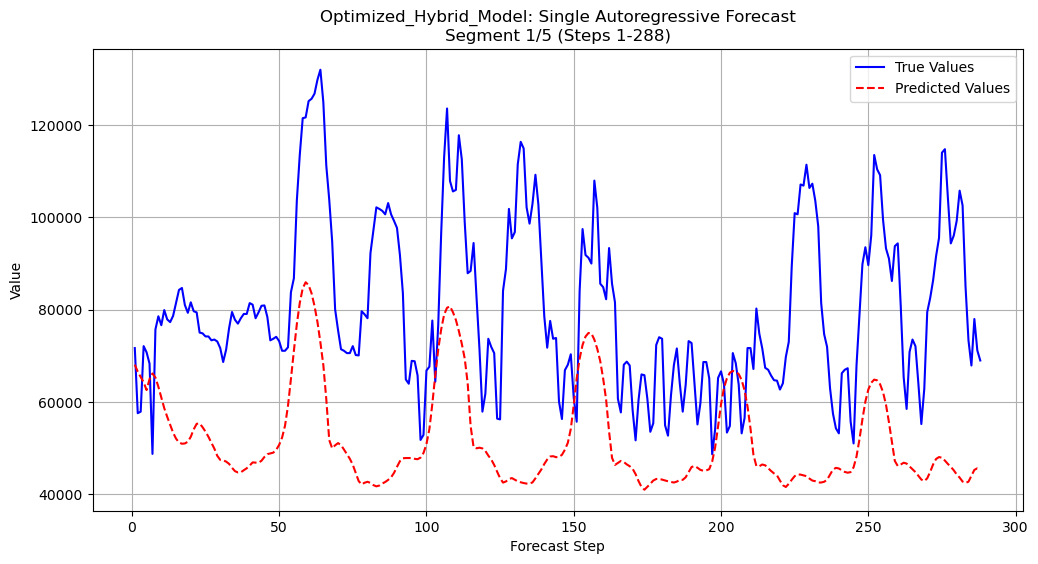

Segment plot saved to: inference_plots/Optimized_Hybrid_Model_single_forecast_segment1_20250322_192251.png


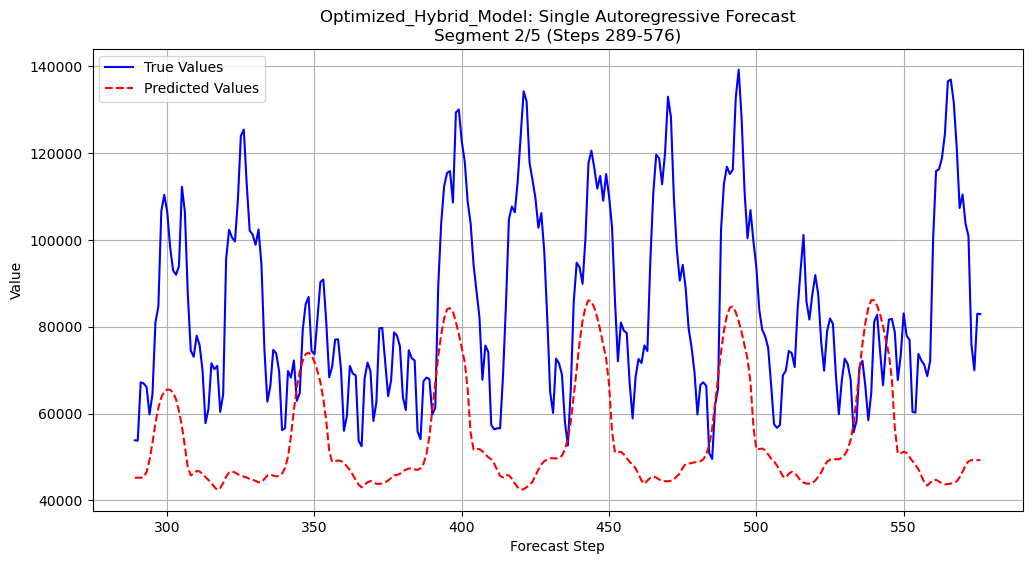

Segment plot saved to: inference_plots/Optimized_Hybrid_Model_single_forecast_segment2_20250322_192251.png


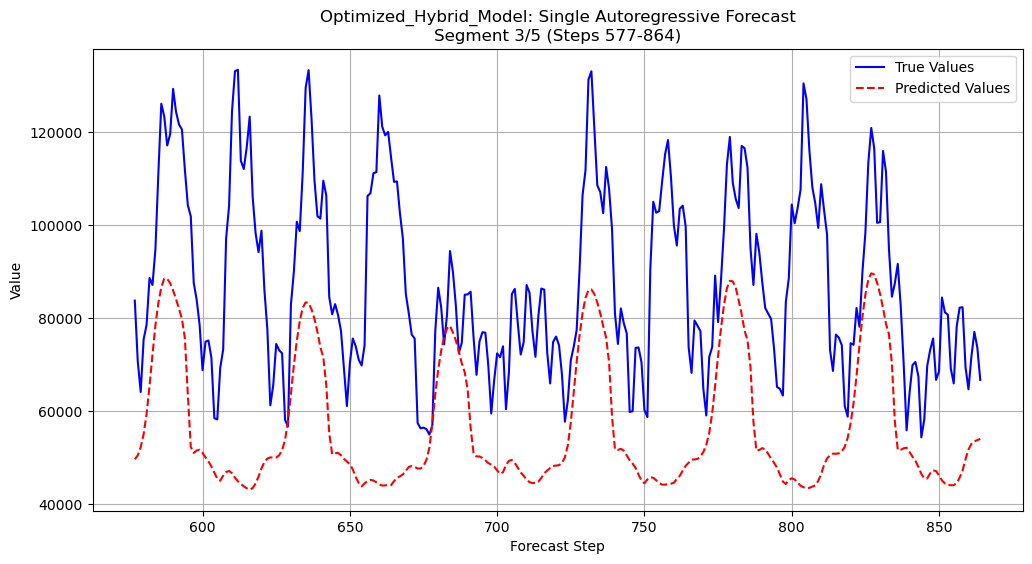

Segment plot saved to: inference_plots/Optimized_Hybrid_Model_single_forecast_segment3_20250322_192251.png


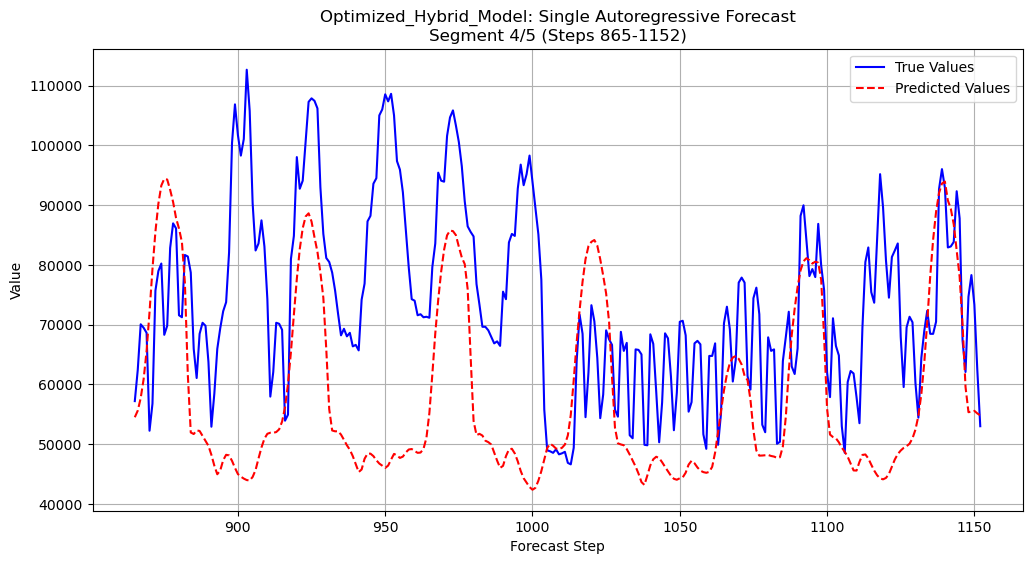

Segment plot saved to: inference_plots/Optimized_Hybrid_Model_single_forecast_segment4_20250322_192251.png


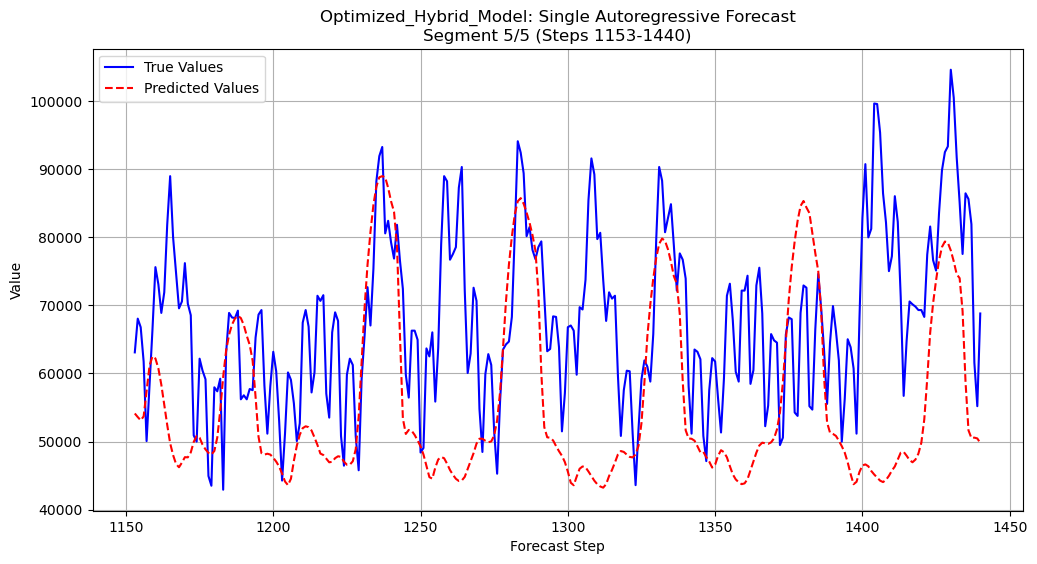

Segment plot saved to: inference_plots/Optimized_Hybrid_Model_single_forecast_segment5_20250322_192251.png


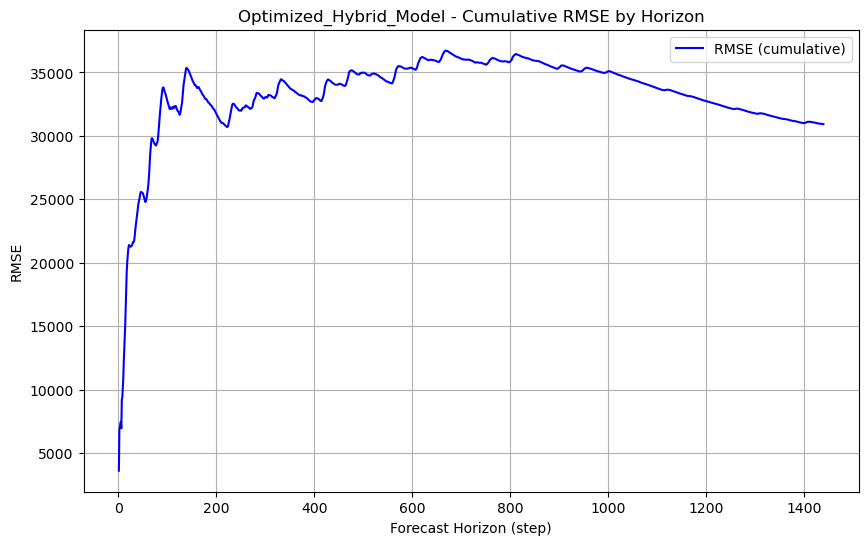

Cumulative RMSE plot saved to: inference_plots/Optimized_Hybrid_Model_cumulative_rmse_20250322_192251.png


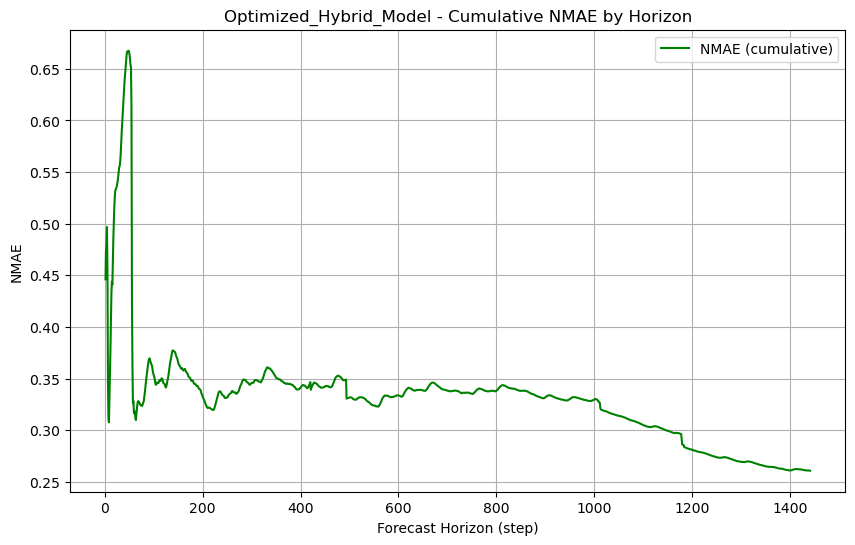

Cumulative NMAE plot saved to: inference_plots/Optimized_Hybrid_Model_cumulative_nmae_20250322_192251.png


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import tensorflow as tf
import os
from datetime import datetime

def single_chain_autoregressive_inference_with_plots(model, data_evaluation, static_features, dynamic_features, input_width, forecast_steps, target, train_mean, train_std, model_name='Hybrid_Model', output_filename='predictions_single_chain.xlsx'
):
    """
    Esegue un'unica previsione autoregressiva di lunghezza 'forecast_steps',
    PARTENDO DALL'INIZIO di 'data_evaluation'.
    
    1) Usa i primi 'input_width' timestep come finestra iniziale (in scala reale, poi standardizzata).
    2) Prevede un passo alla volta, reinserendo la predizione (in forma standardizzata)
       al posto del target per il passo successivo (autoregressione).
    3) Restituisce un array 1D di previsioni (in scala reale) di lunghezza 'forecast_steps'
       e confronta tali previsioni con i valori reali in 'data_evaluation'.
    4) Suddivide la serie di predizioni in 5 plot distinti.
    5) Calcola e plotta le metriche (RMSE e NMAE) cumulativamente fino a ogni orizzonte.
    """

    print(f"Executing single-chain autoregressive inference from the BEGINNING with {model_name}...")

    if len(data_evaluation) < input_width + forecast_steps:
        raise ValueError("Il dataset non è abbastanza lungo per coprire finestra iniziale + forecast_steps.")

    data_real = data_evaluation.copy()

    data_std = data_evaluation.copy()
    for col in data_std.columns:
        if col in train_mean and col in train_std:
            data_std[col] = (data_std[col] - train_mean[col]) / train_std[col]
        else:
            print(f"Warning: colonna '{col}' non presente in train_mean/std, lasciata invariata.")

    current_window = data_std.iloc[0 : input_width + forecast_steps].copy()

    predictions_std = np.zeros(forecast_steps)
    predictions_real = np.zeros(forecast_steps)

    for step in range(forecast_steps):
        local_idx = input_width + step

        # Feature statiche (1 riga)
        X_stat_current = current_window[static_features].iloc[local_idx - 1 : local_idx].values

        # Finestra dinamica (ultimi input_width timestep)
        X_dyn_window = current_window[dynamic_features].iloc[step : step + input_width].values
        X_dyn_window = X_dyn_window.reshape(1, input_width, len(dynamic_features))

        # Predizione
        y_pred_std = model.predict([X_stat_current, X_dyn_window], verbose=0)[0][0]
        predictions_std[step] = y_pred_std

        # Destandardizzazione
        y_pred_real = y_pred_std * train_std[target] + train_mean[target]
        predictions_real[step] = y_pred_real

        # Reinserimento della predizione (in scala std) per il passo successivo
        if step < forecast_steps - 1:
            current_window.at[current_window.index[local_idx], target] = y_pred_std

    # Estrazione dei valori reali corrispondenti
    true_values_real = data_real[target].iloc[input_width : input_width + forecast_steps].values

    #Calcolo di RMSE e NMAE globali (sull'intera catena)
    rmse_full = np.sqrt(mean_squared_error(true_values_real, predictions_real))
    mae_full = np.mean(np.abs(true_values_real - predictions_real))
    data_range = np.max(true_values_real) - np.min(true_values_real) if len(true_values_real) > 0 else 1
    nmae_full = mae_full / data_range if data_range != 0 else np.nan
    print(f"Single-chain forecast completed. Global RMSE={rmse_full:.2f}, Global NMAE={nmae_full:.4f}")

    # Salvataggio dei risultati in Excel
    results_df = pd.DataFrame({
        'Step': np.arange(1, forecast_steps + 1),
        'True_Values': true_values_real,
        'Predicted_Values': predictions_real
    })
    with pd.ExcelWriter(output_filename) as writer:
        results_df.to_excel(writer, sheet_name='Single_Forecast', index=False)
    print(f"Results saved to {output_filename}")
    plots_dir = "inference_plots"
    if not os.path.exists(plots_dir):
        os.makedirs(plots_dir)
    num_groups = 5
    group_size = forecast_steps // num_groups
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    for group in range(num_groups):
        start_h = group * group_size
        end_h = (group + 1) * group_size if group < num_groups - 1 else forecast_steps
        xvals = np.arange(start_h + 1, end_h + 1)

        plt.figure(figsize=(12,6))
        plt.plot(xvals, true_values_real[start_h:end_h], label='True Values', color='blue')
        plt.plot(xvals, predictions_real[start_h:end_h], label='Predicted Values', color='red', linestyle='--')
        plt.title(f'{model_name}: Single Autoregressive Forecast\nSegment {group+1}/{num_groups} (Steps {start_h+1}-{end_h})')
        plt.xlabel('Forecast Step')
        plt.ylabel('Value')
        plt.legend()
        plt.grid(True)

        segment_filename = f"{plots_dir}/{model_name}_single_forecast_segment{group+1}_{timestamp}.png"
        plt.savefig(segment_filename, dpi=300, bbox_inches='tight')
        plt.show()
        print(f"Segment plot saved to: {segment_filename}")
    #  Plot Metrice vs. Prediction Horizon
    horizon_rmse = np.zeros(forecast_steps)
    horizon_nmae = np.zeros(forecast_steps)
    for h in range(1, forecast_steps + 1):
        tv = true_values_real[:h]
        pv = predictions_real[:h]
        rmse_h = np.sqrt(mean_squared_error(tv, pv))
        mae_h = np.mean(np.abs(tv - pv))
        rng = np.max(tv) - np.min(tv) if len(tv) > 0 else 1
        nmae_h = mae_h / rng if rng != 0 else np.nan
        horizon_rmse[h-1] = rmse_h
        horizon_nmae[h-1] = nmae_h
    # Plot RMSE
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, forecast_steps + 1), horizon_rmse, label='RMSE (cumulative)', color='blue')
    plt.title(f'{model_name} - Cumulative RMSE by Horizon')
    plt.xlabel('Forecast Horizon (step)')
    plt.ylabel('RMSE')
    plt.grid(True)
    plt.legend()
    rmse_filename = f"{plots_dir}/{model_name}_cumulative_rmse_{timestamp}.png"
    plt.savefig(rmse_filename, dpi=300, bbox_inches='tight')
    plt.show()
    print(f"Cumulative RMSE plot saved to: {rmse_filename}")
    # Plot NMAE
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, forecast_steps + 1), horizon_nmae, label='NMAE (cumulative)', color='green')
    plt.title(f'{model_name} - Cumulative NMAE by Horizon')
    plt.xlabel('Forecast Horizon (step)')
    plt.ylabel('NMAE')
    plt.grid(True)
    plt.legend()
    nmae_filename = f"{plots_dir}/{model_name}_cumulative_nmae_{timestamp}.png"
    plt.savefig(nmae_filename, dpi=300, bbox_inches='tight')
    plt.show()
    print(f"Cumulative NMAE plot saved to: {nmae_filename}")
    return predictions_real, true_values_real



pred_uff_real, true_uff_real = single_chain_autoregressive_inference_with_plots(
    model=best_model,
    data_evaluation=evaluation_data,
    static_features=static_features,
    dynamic_features=dynamic_features,
    input_width=24,
    forecast_steps=1440,
    target="Potenza Uffici [W]",
    train_mean=data_mean,
    train_std=data_devstd,
    model_name='Optimized_Hybrid_Model',
    output_filename='Hybrid_model_single_forecast.xlsx'
)

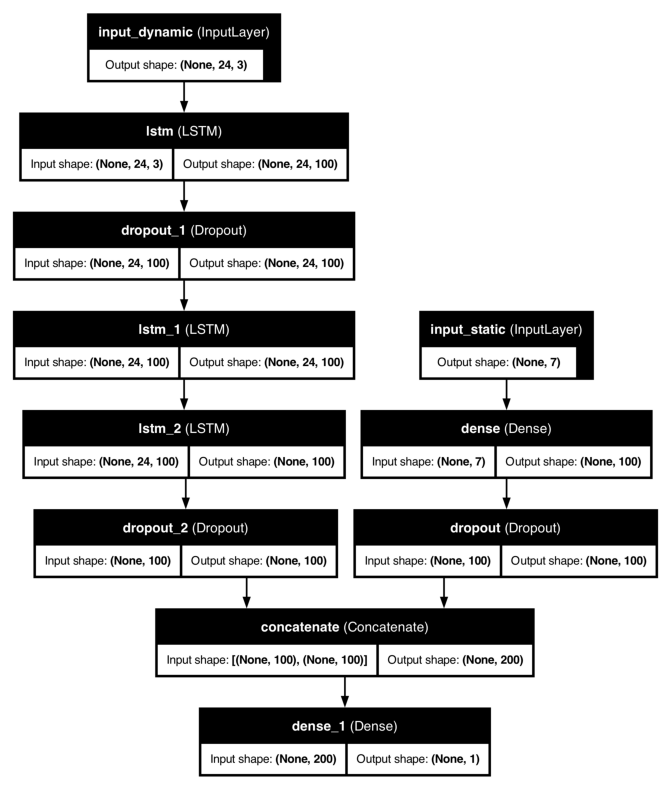

In [30]:
! pip install pydot graphviz
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import tensorflow as tf

# Supponiamo che il tuo modello sia chiamato 'model'
plot_model(best_model, to_file='model_structure.png', show_shapes=True, show_layer_names=True)

# Carica e mostra l'immagine generata
img = plt.imread('model_structure.png')
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()

Shapes:
 X_stat_train: (9148, 7)
 X_dyn_train: (9148, 24, 3)
 y_train: (9148,)
Total parameter combinations: 72
Starting Grid Search 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.



Training model with params: learning_rate=0.001, dropout_rate=0.2, static_units=50, lstm_units=100

Training model with params: learning_rate=0.001, dropout_rate=0.2, static_units=50, lstm_units=50

Training model with params: learning_rate=0.001, dropout_rate=0.2, static_units=100, lstm_units=50

Training model with params: learning_rate=0.005, dropout_rate=0.2, static_units=50, lstm_units=50

Training model with params: learning_rate=0.001, dropout_rate=0.2, static_units=100, lstm_units=100

Training model with params: learning_rate=0.005, dropout_rate=0.2, static_units=100, lstm_units=50

Training model with params: learning_rate=0.001, dropout_rate=0.3, static_units=50, lstm_units=50

Training model with params: learning_rate=0.01, dropout_rate=0.2, static_units=50, lstm_units=100

Training model with params: learning_rate=0.005, dropout_rate=0.2, static_units=50, lstm_units=100

Training model with params: learning_rate=0.01, dropout_rate=0.2, static_units=100, lstm_units=100

Tr

[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  6.9min


Completed in 409.76s - Val Loss: 0.045085

Training model with params: learning_rate=0.001, dropout_rate=0.5, static_units=100, lstm_units=100
Completed in 378.41s - Val Loss: 0.094814

Training model with params: learning_rate=0.005, dropout_rate=0.5, static_units=50, lstm_units=50
Completed in 506.50s - Val Loss: 0.046151


/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



Training model with params: learning_rate=0.005, dropout_rate=0.5, static_units=100, lstm_units=50
Completed in 527.55s - Val Loss: 0.046024
Completed in 524.51s - Val Loss: 0.047288
Completed in 522.46s - Val Loss: 0.051756

Training model with params: learning_rate=0.005, dropout_rate=0.5, static_units=50, lstm_units=100

Training model with params: learning_rate=0.005, dropout_rate=0.5, static_units=100, lstm_units=100

Training model with params: learning_rate=0.01, dropout_rate=0.5, static_units=50, lstm_units=50
Completed in 530.44s - Val Loss: 0.057006

Training model with params: learning_rate=0.01, dropout_rate=0.5, static_units=100, lstm_units=50
Completed in 540.90s - Val Loss: 0.046812
Completed in 541.51s - Val Loss: 0.048193

Training model with params: learning_rate=0.01, dropout_rate=0.5, static_units=50, lstm_units=100
Completed in 532.89s - Val Loss: 0.049797

Training model with params: learning_rate=0.01, dropout_rate=0.5, static_units=100, lstm_units=100

Training

[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed: 44.4min finished


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0401 - mean_squared_error: 0.0401



Final Test Loss with Best Model: [0.059927742928266525, 0.059927742928266525]
Best model saved as 'best_hybrid_modelHybridShort_lstm.h5'


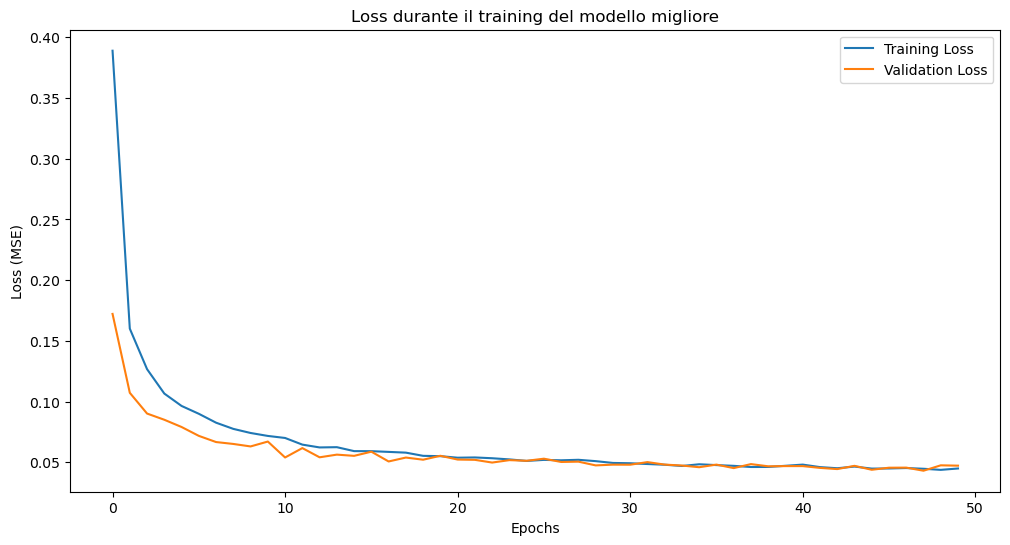

In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense, LSTM, Concatenate, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import ParameterGrid
import matplotlib.pyplot as plt
import os
import random as rd
from joblib import Parallel, delayed
import time

# --- DEFINIZIONE DELLA FUNZIONE PER CREARE IL DATASET ---
static_features = ['Year sin', 'Year cos', 'Hour sin', 'Hour cos', 
                   'Day sin', 'Day cos', 'Nuvolosità [%]']
dynamic_features = ['Irraggiamento [kWh/m2]', 'Temperatura [K]', 'Potenza Uffici [W]']
target_col = 'Potenza Uffici [W]'

def create_dataset(df, window_size, static_feats, dynamic_feats, target):
    X_stat, X_dyn, y = [], [], []
    # Partiamo da index = window_size (così possiamo prendere i dati precedenti)
    for i in range(window_size, len(df)):
        # Finestra delle feature dinamiche: [i-window_size, i)
        dyn_window = df[dynamic_feats].iloc[i-window_size:i].values
        X_dyn.append(dyn_window)
        
        # Feature statiche al timestep i
        stat_current = df[static_feats].iloc[i].values
        X_stat.append(stat_current)
        
        # Target al timestep i
        y.append(df[target].iloc[i])
    
    return np.array(X_stat), np.array(X_dyn), np.array(y)

# --- COSTRUZIONE DEI DATASET ---
# Si assume che train_data_std, val_data_std e test_data_std siano già definiti
window_size = 24

X_stat_train, X_dyn_train, y_train = create_dataset(
    train_data_std, window_size, static_features, dynamic_features, target_col
)
X_stat_val, X_dyn_val, y_val = create_dataset(
    val_data_std, window_size, static_features, dynamic_features, target_col
)
X_stat_test, X_dyn_test, y_test = create_dataset(
    test_data_std, window_size, static_features, dynamic_features, target_col
)

print("Shapes:")
print(" X_stat_train:", X_stat_train.shape)
print(" X_dyn_train:", X_dyn_train.shape)
print(" y_train:", y_train.shape)

# --- FUNZIONE PER CREARE IL MODELLO CON PARAMETRI VARIABILI ---
def create_model(learning_rate, dropout_rate):
    # Pulizia della sessione per evitare problemi di memoria
    tf.keras.backend.clear_session()
    
    input_stat = Input(shape=(len(static_features),), name='input_static')
    input_dyn = Input(shape=(window_size, len(dynamic_features)), name='input_dynamic')

    # Ramo statico con dropout
    x_stat = Dense(100, activation='relu')(input_stat)
    x_stat = Dropout(dropout_rate)(x_stat)

    # Ramo dinamico con dropout
    # Primo LSTM restituisce sequenze
    x_dyn = LSTM(100, activation='relu', return_sequences=True)(input_dyn)
    x_dyn = Dropout(dropout_rate)(x_dyn)
    # Secondo LSTM: anche qui restituisce sequenze per mantenere la dimensione 3D
    x_dyn2 = LSTM(100, activation='relu', return_sequences=True)(x_dyn)
    # Terzo LSTM: l'ultimo non necessita di return_sequences
    x_dyn3 = LSTM(100, activation='relu', return_sequences=False)(x_dyn)

    x_dyn3 = Dropout(dropout_rate)(x_dyn3)

    # Concatenazione dei rami statico e dinamico
    merged = Concatenate()([x_stat, x_dyn3])
    output = Dense(1)(merged)

    model = Model(inputs=[input_stat, input_dyn], outputs=output)
    
    # Compilazione del modello con Adam e learning rate personalizzato
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, 
                  loss='mean_squared_error', 
                  metrics=['mean_squared_error'])
    
    return model

# --- GRID SEARCH CON PARALLELIZZAZIONE ---
def train_and_evaluate(params, X_stat_train, X_dyn_train, y_train, X_stat_val, X_dyn_val, y_val):
    learning_rate = params['learning_rate']
    dropout_rate = params['dropout_rate']
    model__static_units = params['model__static_units']
    model__lstm_units = params['model__lstm_units']
    
    print(f"\nTraining model with params: learning_rate={learning_rate}, dropout_rate={dropout_rate}, static_units={model__static_units}, lstm_units={model__lstm_units}")
    
    # Creazione del modello con i parametri correnti
    model = create_model(learning_rate, dropout_rate)
    
    # Early stopping per evitare overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)
    
    # Training
    start_time = time.time()
    history = model.fit(
        x=[X_stat_train, X_dyn_train],
        y=y_train,
        validation_data=([X_stat_val, X_dyn_val], y_val),
        epochs=50,
        batch_size=128,
        callbacks=[early_stopping],
        verbose=0  # Disattivato per chiarezza nell'output
    )
    
    # Valutazione
    val_loss = model.evaluate([X_stat_val, X_dyn_val], y_val, verbose=0)[0]
    training_time = time.time() - start_time
    
    # Stampa risultati
    print(f"Completed in {training_time:.2f}s - Val Loss: {val_loss:.6f}")
    
    return {
        'params': params,
        'val_loss': val_loss,
        'history': history.history,
        'model': model,
        'training_time': training_time
    }

# Definizione dello spazio dei parametri
param_grid = {
    'learning_rate': [0.001, 0.005, 0.01],
    'dropout_rate': [0.2, 0.3, 0.5],
    'model__static_units': [50, 100],
    'model__lstm_units': [50, 100],
    'batch_size': [32, 64]
}

# Creazione della griglia di parametri
grid = list(ParameterGrid(param_grid))
print(f"Total parameter combinations: {len(grid)}")

# Esecuzione del grid search in parallelo con n_jobs=-1 (tutti i core disponibili)
print("Starting Grid Search ")
results = Parallel(n_jobs=-1, verbose=2)(
    delayed(train_and_evaluate)(
        params, X_stat_train, X_dyn_train, y_train, X_stat_val, X_dyn_val, y_val
    ) for params in grid
)

# Ordinamento dei risultati per val_loss
results.sort(key=lambda x: x['val_loss'])

# Stampa dei risultati in ordine di performance
print("\nGrid Search Results (sorted by validation loss):")
for i, result in enumerate(results):
    params = result['params']
    val_loss = result['val_loss']
    time_taken = result['training_time']
    print(f"{i+1}. Val Loss: {val_loss:.6f}, Learning Rate: {params['learning_rate']}, "
          f"Dropout Rate: {params['dropout_rate']}, Time: {time_taken:.2f},"
          f"Static Units: {params['model__static_units']}", f"LSTM Units: {params['model__lstm_units']}")

# Recupero del modello migliore
best_result_modelHybridShort = results[0]
best_model_HybridShort = best_result_modelHybridShort['model']
best_params_modelHybridShort = best_result_modelHybridShort['params']

print(f"\nBest Model Parameters:")
print(f"  Learning Rate: {best_params_modelHybridShort['learning_rate']}")
print(f"  Dropout Rate: {best_params_modelHybridShort['dropout_rate']}")
print(f"  Validation Loss: {best_result_modelHybridShort['val_loss']:.6f}")
print(f"  Static Units: {best_params_modelHybridShort['model__static_units']}")
print(f"  LSTM Units: {best_params_modelHybridShort['model__lstm_units']}")

# Test finale con il modello migliore
test_loss = best_model_HybridShort.evaluate([X_stat_test, X_dyn_test], y_test)
print(f"\nFinal Test Loss with Best Model: {test_loss}")

# Salvataggio del modello migliore
best_model_HybridShort.save("best_hybrid_modelHybridShort_lstm.h5")
print("Best model saved as 'best_hybrid_modelHybridShort_lstm.h5'")

# Visualizzazione dell'andamento della loss durante il training per il modello migliore
plt.figure(figsize=(12, 6))
plt.plot(best_result_modelHybridShort['history']['loss'], label='Training Loss')
plt.plot(best_result_modelHybridShort['history']['val_loss'], label='Validation Loss')
plt.title('Loss durante il training del modello migliore')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.savefig('best_model_tr')

Executing single-chain autoregressive inference from the BEGINNING with Optimized_Hybrid_Model...
Single-chain forecast completed. Global RMSE=28777.46, Global NMAE=0.2592
Results saved to Hybrid_model_single_forecast.xlsx


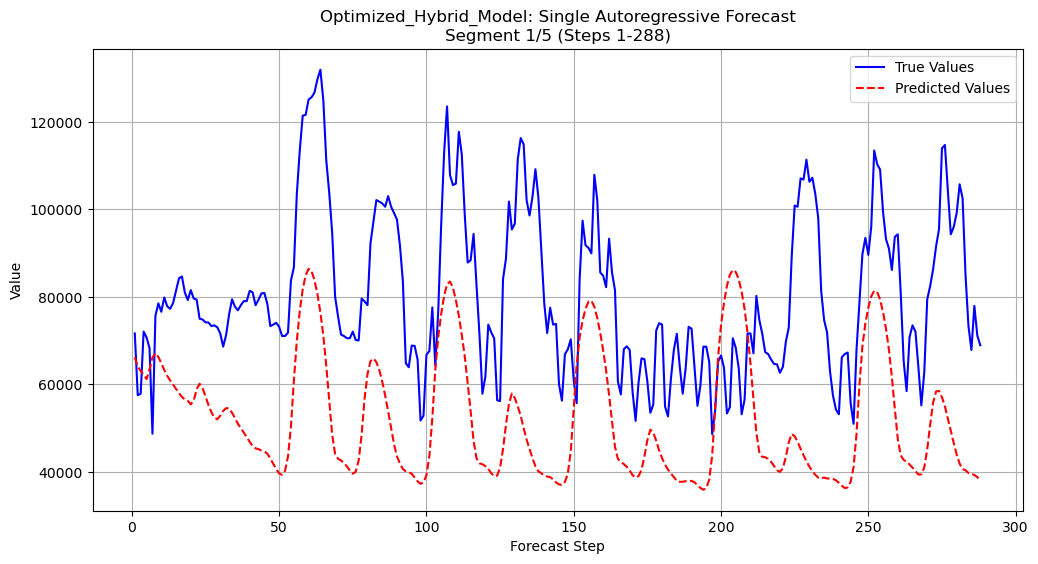

Segment plot saved to: inference_plots/Optimized_Hybrid_Model_modelHybridShort_single_forecast_segment1_20250323_142619.png


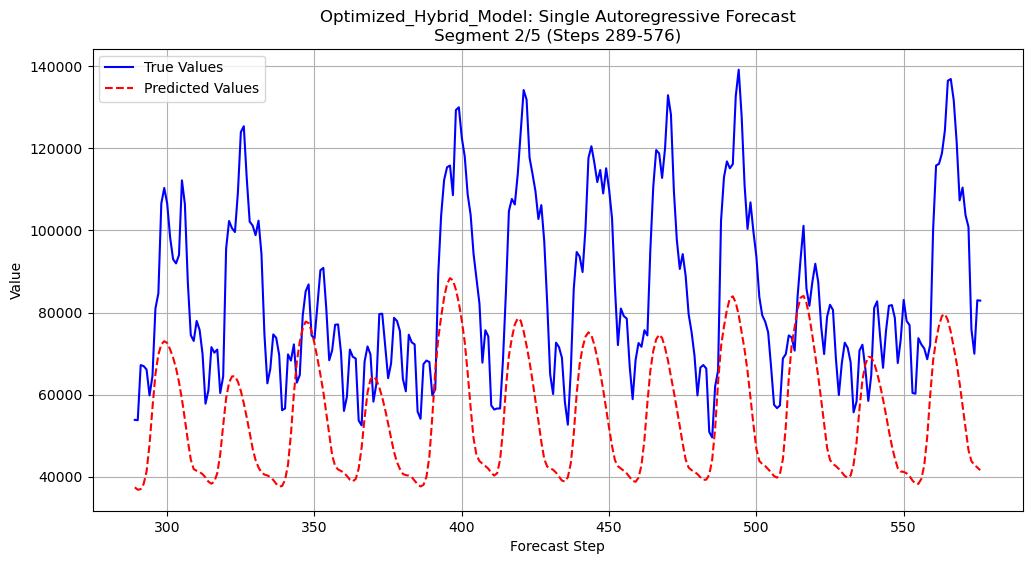

Segment plot saved to: inference_plots/Optimized_Hybrid_Model_modelHybridShort_single_forecast_segment2_20250323_142619.png


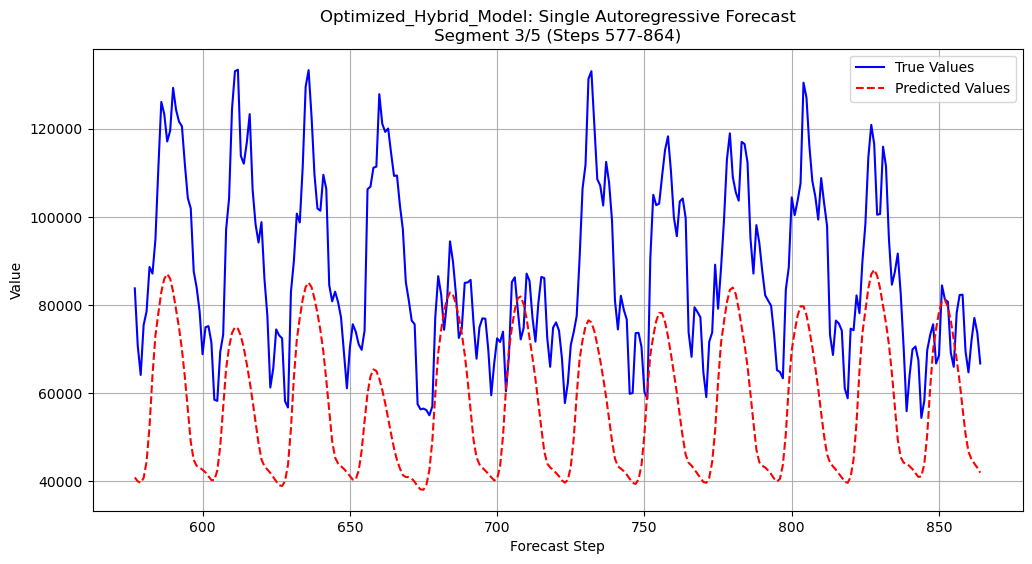

Segment plot saved to: inference_plots/Optimized_Hybrid_Model_modelHybridShort_single_forecast_segment3_20250323_142619.png


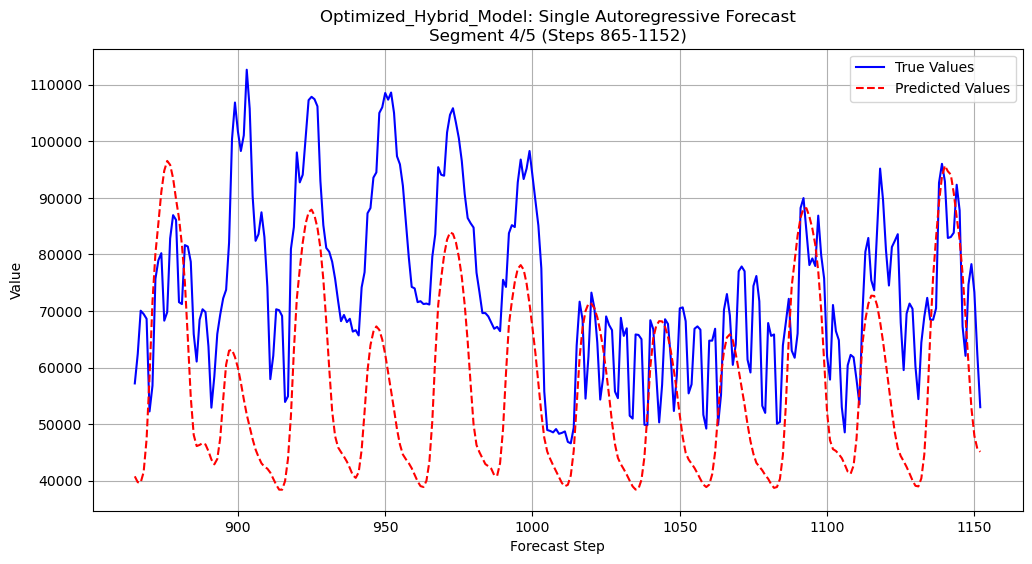

Segment plot saved to: inference_plots/Optimized_Hybrid_Model_modelHybridShort_single_forecast_segment4_20250323_142619.png


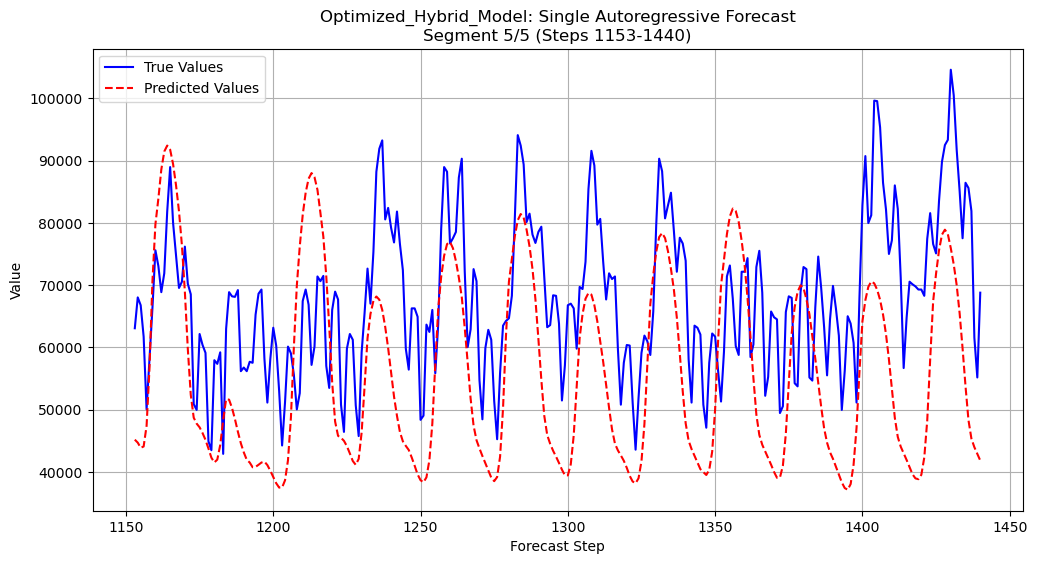

Segment plot saved to: inference_plots/Optimized_Hybrid_Model_modelHybridShort_single_forecast_segment5_20250323_142619.png


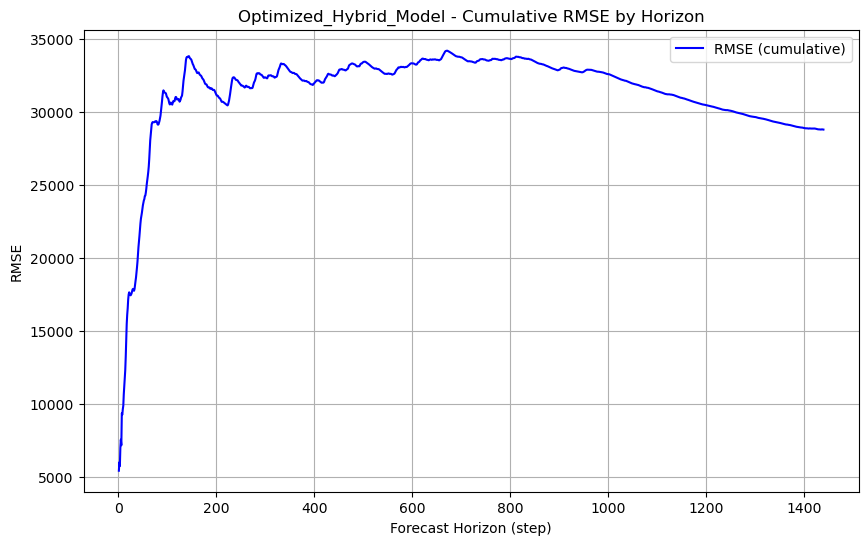

Cumulative RMSE plot saved to: inference_plots/Optimized_Hybrid_Model_cumulative_rmse_modelHybridShort_20250323_142619.png


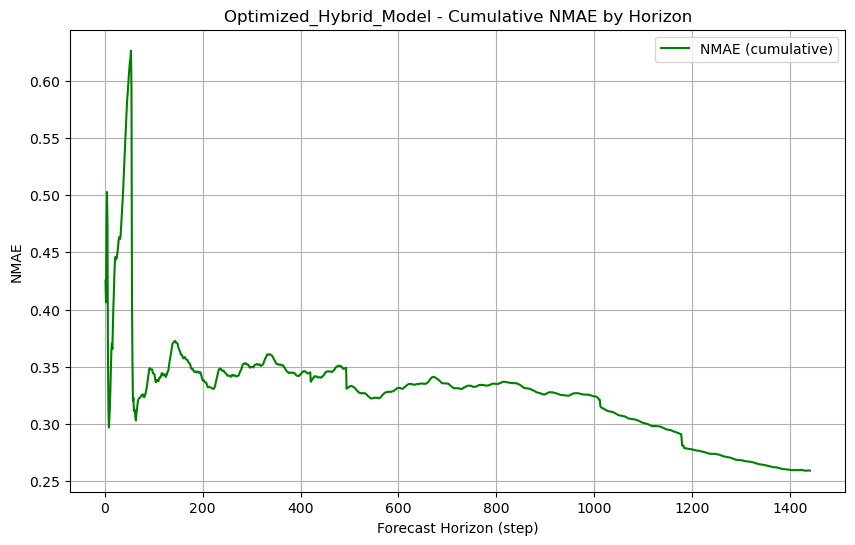

Cumulative NMAE plot saved to: inference_plots/Optimized_Hybrid_Model_cumulative_nmae_modelHybridShort_20250323_142619.png


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import tensorflow as tf
import os
from datetime import datetime

def single_chain_autoregressive_inference_with_plots(
    model,
    data_evaluation,       # dati in scala reale
    static_features,
    dynamic_features,
    input_width,
    forecast_steps,
    target,
    train_mean,            # dizionario con la media di ogni colonna
    train_std,             # dizionario con la std di ogni colonna
    model_name='Hybrid_Model',
    output_filename='predictions_single_chain.xlsx'
):
    """
    Esegue un'unica previsione autoregressiva di lunghezza 'forecast_steps',
    PARTENDO DALL'INIZIO di 'data_evaluation'.
    
    1) Usa i primi 'input_width' timestep come finestra iniziale (in scala reale, poi standardizzata).
    2) Prevede un passo alla volta, reinserendo la predizione (in forma standardizzata)
       al posto del target per il passo successivo (autoregressione).
    3) Restituisce un array 1D di previsioni (in scala reale) di lunghezza 'forecast_steps'
       e confronta tali previsioni con i valori reali in 'data_evaluation'.
    4) Suddivide la serie di predizioni in 5 plot distinti.
    5) Calcola e plotta le metriche (RMSE e NMAE) cumulativamente fino a ogni orizzonte.
    """

    print(f"Executing single-chain autoregressive inference from the BEGINNING with {model_name}...")

    # 1. Controllo che il dataset abbia abbastanza righe
    if len(data_evaluation) < input_width + forecast_steps:
        raise ValueError("Il dataset non è abbastanza lungo per coprire finestra iniziale + forecast_steps.")

    # 2. Copia in scala reale, per poi estrarre i valori di confronto
    data_real = data_evaluation.copy()

    # 3. Creiamo una versione standardizzata per il modello
    data_std = data_evaluation.copy()
    for col in data_std.columns:
        if col in train_mean and col in train_std:
            data_std[col] = (data_std[col] - train_mean[col]) / train_std[col]
        else:
            print(f"Warning: colonna '{col}' non presente in train_mean/std, lasciata invariata.")

    # 4. Prepariamo la finestra iniziale (input_width) + i forecast_steps
    #    Il DataFrame 'current_window' verrà modificato step-by-step
    current_window = data_std.iloc[0 : input_width + forecast_steps].copy()

    # Array per salvare le predizioni
    predictions_std = np.zeros(forecast_steps)
    predictions_real = np.zeros(forecast_steps)

    # 5. Loop autoregressivo
    for step in range(forecast_steps):
        local_idx = input_width + step

        # (a) Feature statiche (1 riga)
        X_stat_current = current_window[static_features].iloc[local_idx - 1 : local_idx].values

        # (b) Finestra dinamica (ultimi input_width timestep)
        X_dyn_window = current_window[dynamic_features].iloc[step : step + input_width].values
        X_dyn_window = X_dyn_window.reshape(1, input_width, len(dynamic_features))

        # (c) Predizione
        y_pred_std = model.predict([X_stat_current, X_dyn_window], verbose=0)[0][0]
        predictions_std[step] = y_pred_std

        # (d) Destandardizzazione
        y_pred_real = y_pred_std * train_std[target] + train_mean[target]
        predictions_real[step] = y_pred_real

        # (e) Reinserimento della predizione (in scala std) per il passo successivo
        if step < forecast_steps - 1:
            current_window.at[current_window.index[local_idx], target] = y_pred_std

    # 6. Estrazione dei valori reali corrispondenti
    true_values_real = data_real[target].iloc[input_width : input_width + forecast_steps].values

    # 7. Calcolo di RMSE e NMAE globali (sull'intera catena)
    rmse_full = np.sqrt(mean_squared_error(true_values_real, predictions_real))
    mae_full = np.mean(np.abs(true_values_real - predictions_real))
    data_range = np.max(true_values_real) - np.min(true_values_real) if len(true_values_real) > 0 else 1
    nmae_full = mae_full / data_range if data_range != 0 else np.nan
    print(f"Single-chain forecast completed. Global RMSE={rmse_full:.2f}, Global NMAE={nmae_full:.4f}")

    # 8. Salvataggio dei risultati in Excel
    results_df = pd.DataFrame({
        'Step': np.arange(1, forecast_steps + 1),
        'True_Values': true_values_real,
        'Predicted_Values': predictions_real
    })
    with pd.ExcelWriter(output_filename) as writer:
        results_df.to_excel(writer, sheet_name='Single_Forecast', index=False)
    print(f"Results saved to {output_filename}")

    # 9. Plot 1: Suddividere i 1440 step in 5 segmenti per visualizzare meglio i dati
    plots_dir = "inference_plots"
    if not os.path.exists(plots_dir):
        os.makedirs(plots_dir)

    num_groups = 5
    group_size = forecast_steps // num_groups
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

    for group in range(num_groups):
        start_h = group * group_size
        end_h = (group + 1) * group_size if group < num_groups - 1 else forecast_steps
        xvals = np.arange(start_h + 1, end_h + 1)

        plt.figure(figsize=(12,6))
        plt.plot(xvals, true_values_real[start_h:end_h], label='True Values', color='blue')
        plt.plot(xvals, predictions_real[start_h:end_h], label='Predicted Values', color='red', linestyle='--')
        plt.title(f'{model_name}: Single Autoregressive Forecast\nSegment {group+1}/{num_groups} (Steps {start_h+1}-{end_h})')
        plt.xlabel('Forecast Step')
        plt.ylabel('Value')
        plt.legend()
        plt.grid(True)

        segment_filename = f"{plots_dir}/{model_name}_modelHybridShort_single_forecast_segment{group+1}_{timestamp}.png"
        plt.savefig(segment_filename, dpi=300, bbox_inches='tight')
        plt.show()
        print(f"Segment plot saved to: {segment_filename}")

    # 10. Plot 2: Metricas vs. Prediction Horizon (cumulativa)
    #     Per ogni h, calcoliamo RMSE e NMAE considerando i primi h passi (1..h).
    horizon_rmse = np.zeros(forecast_steps)
    horizon_nmae = np.zeros(forecast_steps)
    for h in range(1, forecast_steps + 1):
        tv = true_values_real[:h]
        pv = predictions_real[:h]
        rmse_h = np.sqrt(mean_squared_error(tv, pv))
        mae_h = np.mean(np.abs(tv - pv))
        rng = np.max(tv) - np.min(tv) if len(tv) > 0 else 1
        nmae_h = mae_h / rng if rng != 0 else np.nan
        horizon_rmse[h-1] = rmse_h
        horizon_nmae[h-1] = nmae_h

    # Plot RMSE
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, forecast_steps + 1), horizon_rmse, label='RMSE (cumulative)', color='blue')
    plt.title(f'{model_name} - Cumulative RMSE by Horizon')
    plt.xlabel('Forecast Horizon (step)')
    plt.ylabel('RMSE')
    plt.grid(True)
    plt.legend()
    rmse_filename = f"{plots_dir}/{model_name}_cumulative_rmse_modelHybridShort_{timestamp}.png"
    plt.savefig(rmse_filename, dpi=300, bbox_inches='tight')
    plt.show()
    print(f"Cumulative RMSE plot saved to: {rmse_filename}")

    # Plot NMAE
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, forecast_steps + 1), horizon_nmae, label='NMAE (cumulative)', color='green')
    plt.title(f'{model_name} - Cumulative NMAE by Horizon')
    plt.xlabel('Forecast Horizon (step)')
    plt.ylabel('NMAE')
    plt.grid(True)
    plt.legend()
    nmae_filename = f"{plots_dir}/{model_name}_cumulative_nmae_modelHybridShort_{timestamp}.png"
    plt.savefig(nmae_filename, dpi=300, bbox_inches='tight')
    plt.show()
    print(f"Cumulative NMAE plot saved to: {nmae_filename}")

    return predictions_real, true_values_real



pred_uff_real, true_uff_real = single_chain_autoregressive_inference_with_plots(
    model=best_model_HybridShort,
    data_evaluation=evaluation_data,
    static_features=static_features,
    dynamic_features=dynamic_features,
    input_width=24,
    forecast_steps=1440,
    target="Potenza Uffici [W]",
    train_mean=data_mean,
    train_std=data_devstd,
    model_name='Optimized_Hybrid_Model',
    output_filename='Hybrid_model_single_forecast.xlsx'
)

Total parameter combinations: 72

Esperimento per input width = 24 (ore)
Shapes:
 X_stat_train: (9148, 7)
 X_dyn_train: (9148, 24, 3)
 y_train: (9148,)
Starting Grid Search...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.



Training model with params: learning_rate=0.005, dropout_rate=0.2, static_units=100, lstm_units=100, batch_size=32

Training model with params: learning_rate=0.001, dropout_rate=0.3, static_units=100, lstm_units=50, batch_size=32

Training model with params: learning_rate=0.01, dropout_rate=0.2, static_units=100, lstm_units=50, batch_size=32

Training model with params: learning_rate=0.01, dropout_rate=0.2, static_units=50, lstm_units=100, batch_size=32

Training model with params: learning_rate=0.001, dropout_rate=0.2, static_units=50, lstm_units=50, batch_size=32

Training model with params: learning_rate=0.001, dropout_rate=0.2, static_units=50, lstm_units=100, batch_size=32

Training model with params: learning_rate=0.005, dropout_rate=0.2, static_units=50, lstm_units=50, batch_size=32

Training model with params: learning_rate=0.01, dropout_rate=0.2, static_units=50, lstm_units=50, batch_size=32

Training model with params: learning_rate=0.001, dropout_rate=0.3, static_units=50, 

[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  7.9min


Completed in 605.97s - Val Loss: 0.048634

Training model with params: learning_rate=0.001, dropout_rate=0.5, static_units=100, lstm_units=100, batch_size=32
Completed in 205.94s - Val Loss: 0.063704

Training model with params: learning_rate=0.005, dropout_rate=0.5, static_units=50, lstm_units=50, batch_size=32
Completed in 209.75s - Val Loss: 0.057354

Training model with params: learning_rate=0.005, dropout_rate=0.5, static_units=100, lstm_units=50, batch_size=32
Completed in 653.81s - Val Loss: 0.051656

Training model with params: learning_rate=0.005, dropout_rate=0.5, static_units=50, lstm_units=100, batch_size=32
Completed in 662.68s - Val Loss: 0.049266

Training model with params: learning_rate=0.005, dropout_rate=0.5, static_units=100, lstm_units=100, batch_size=32
Completed in 674.95s - Val Loss: 0.046596

Training model with params: learning_rate=0.01, dropout_rate=0.5, static_units=50, lstm_units=50, batch_size=32
Completed in 676.83s - Val Loss: 0.046214

Training model w

/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



Training model with params: learning_rate=0.01, dropout_rate=0.3, static_units=50, lstm_units=100, batch_size=64
Completed in 147.38s - Val Loss: 0.056327

Training model with params: learning_rate=0.01, dropout_rate=0.3, static_units=100, lstm_units=100, batch_size=64
Completed in 674.07s - Val Loss: 0.062084

Training model with params: learning_rate=0.001, dropout_rate=0.5, static_units=50, lstm_units=50, batch_size=64
Completed in 147.87s - Val Loss: 0.056652

Training model with params: learning_rate=0.001, dropout_rate=0.5, static_units=100, lstm_units=50, batch_size=64
Completed in 663.19s - Val Loss: 0.045803

Training model with params: learning_rate=0.001, dropout_rate=0.5, static_units=50, lstm_units=100, batch_size=64
Completed in 670.53s - Val Loss: 0.045360

Training model with params: learning_rate=0.001, dropout_rate=0.5, static_units=100, lstm_units=100, batch_size=64
Completed in 668.41s - Val Loss: 0.048744

Training model with params: learning_rate=0.005, dropout_r

[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed: 35.3min finished



Final Test Loss with Best Model (input width 24): [0.0581725612282753, 0.0581725612282753]
Best model saved as 'best_hybrid_model_lstm_24h.h5'
Executing single-chain autoregressive inference from the BEGINNING with Optimized_Hybrid_Model_24h (input_width=24)...
Single-chain forecast completed. Global RMSE=24194.78, Global NMAE=0.2104
Results saved to Hybrid_model_single_forecast_24h.xlsx


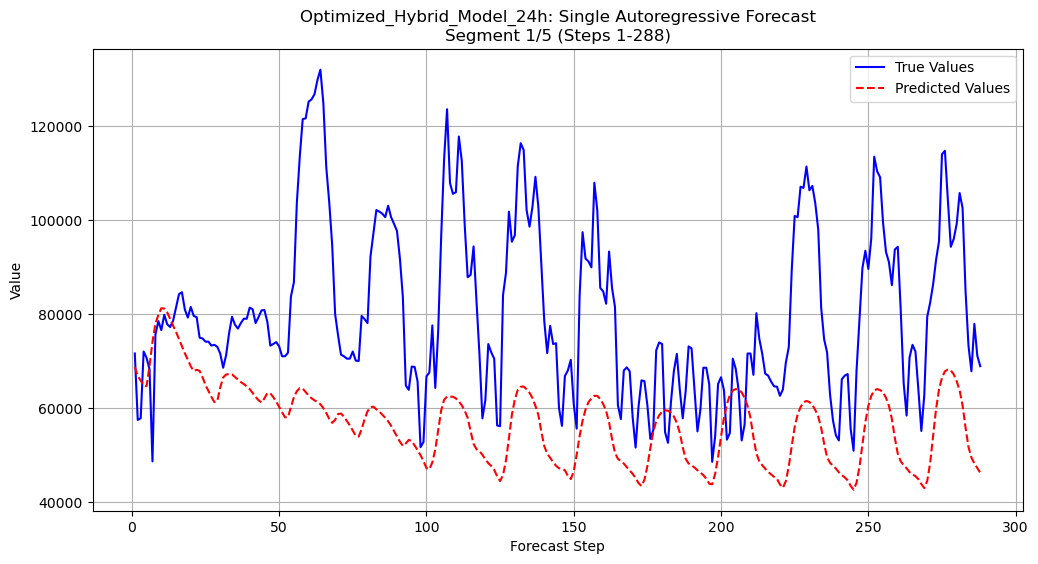

Segment plot saved to: inference_plots/Optimized_Hybrid_Model_24h_segment1_20250323_153945.png


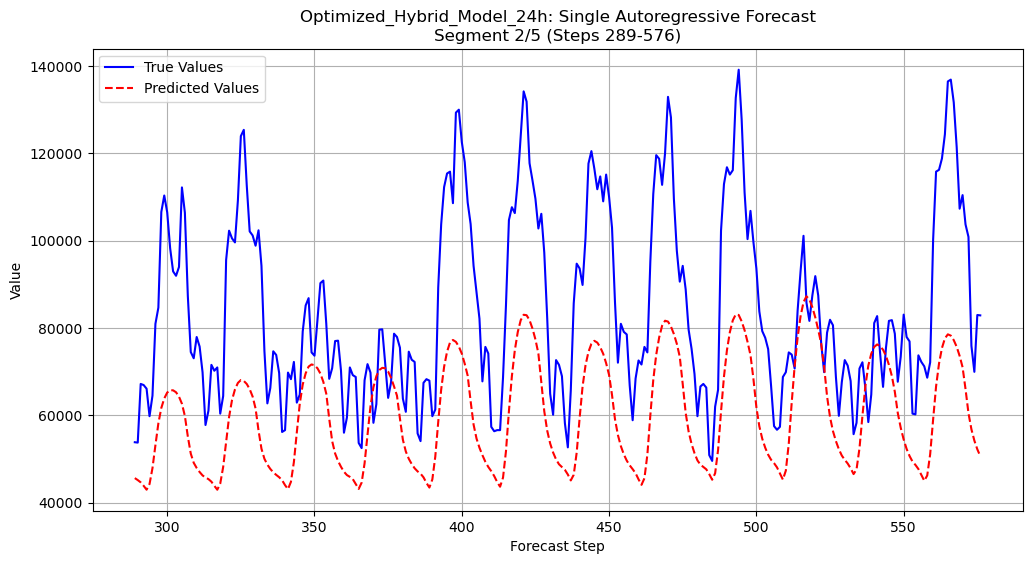

Segment plot saved to: inference_plots/Optimized_Hybrid_Model_24h_segment2_20250323_153945.png


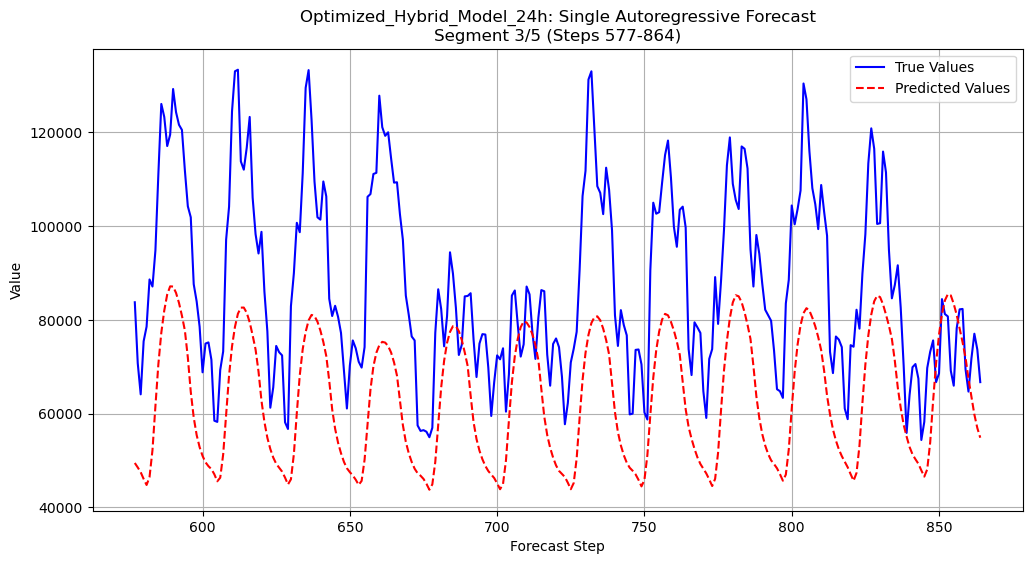

Segment plot saved to: inference_plots/Optimized_Hybrid_Model_24h_segment3_20250323_153945.png


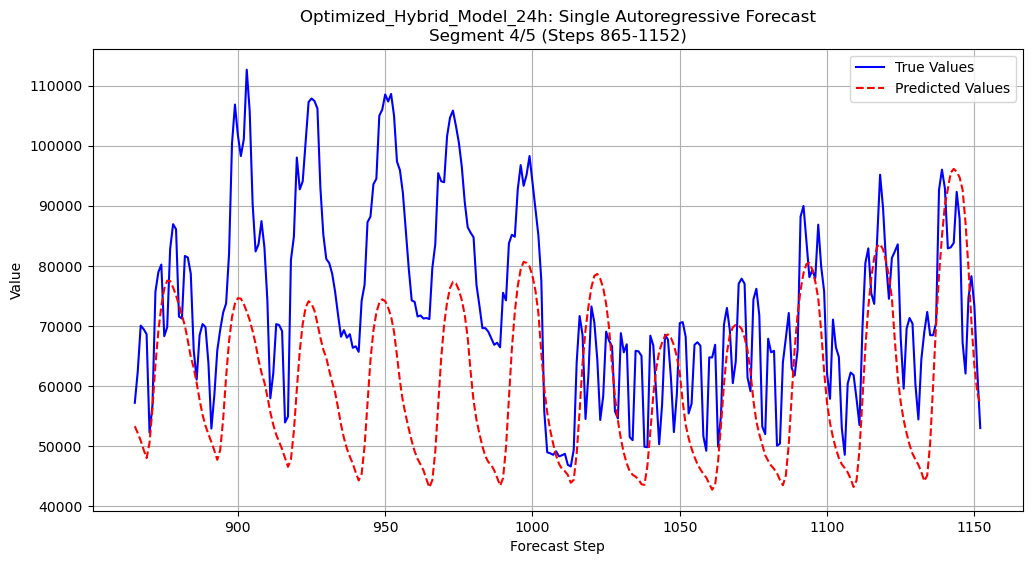

Segment plot saved to: inference_plots/Optimized_Hybrid_Model_24h_segment4_20250323_153945.png


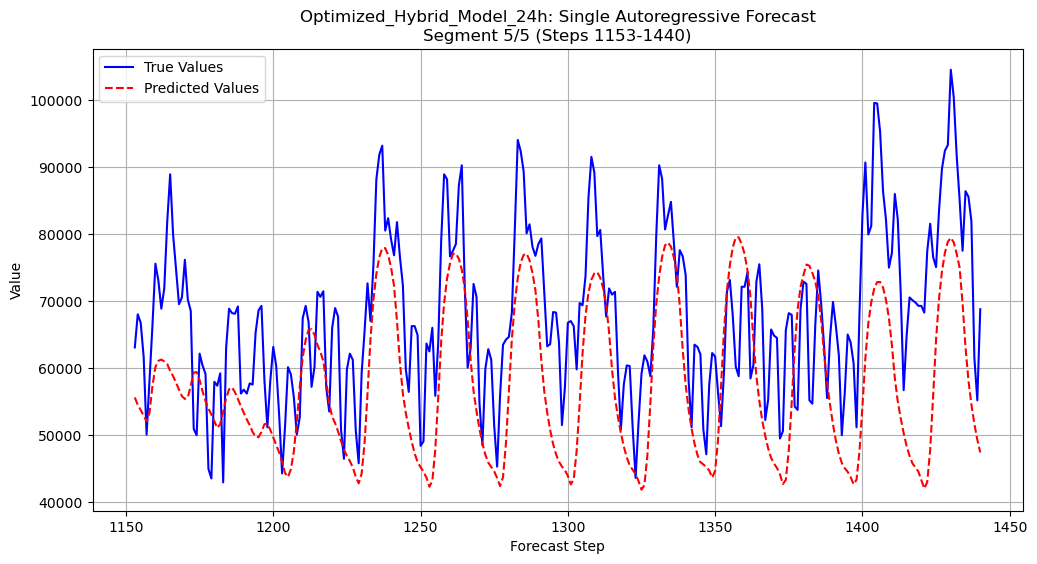

Segment plot saved to: inference_plots/Optimized_Hybrid_Model_24h_segment5_20250323_153945.png


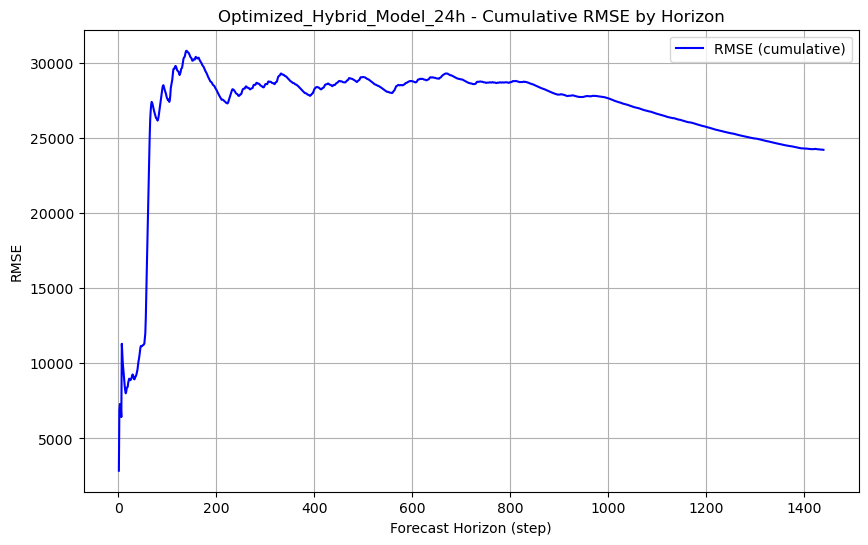

Cumulative RMSE plot saved to: inference_plots/Optimized_Hybrid_Model_24h_cumulative_rmse_20250323_153945.png


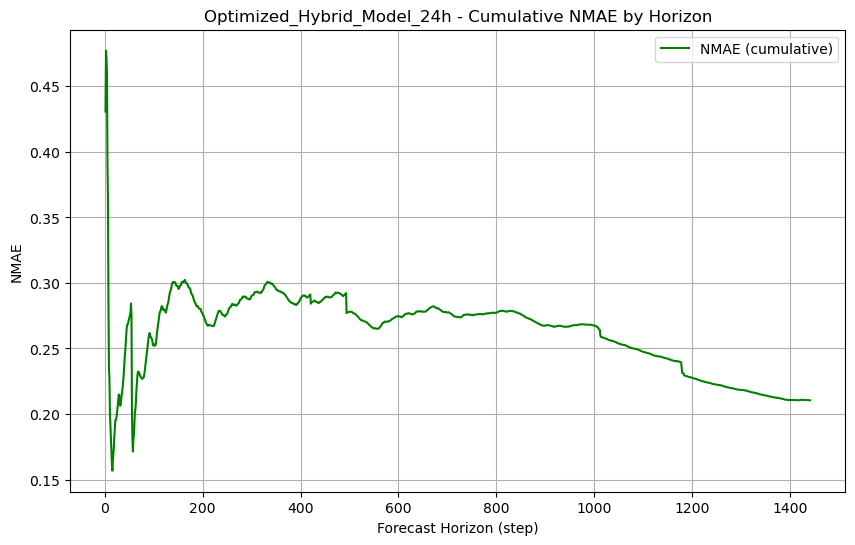

Cumulative NMAE plot saved to: inference_plots/Optimized_Hybrid_Model_24h_cumulative_nmae_20250323_153945.png

Esperimento per input width = 48 (ore)
Shapes:
 X_stat_train: (9124, 7)
 X_dyn_train: (9124, 48, 3)
 y_train: (9124,)
Starting Grid Search...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.



Training model with params: learning_rate=0.001, dropout_rate=0.2, static_units=50, lstm_units=50, batch_size=32

Training model with params: learning_rate=0.001, dropout_rate=0.2, static_units=50, lstm_units=100, batch_size=32

Training model with params: learning_rate=0.001, dropout_rate=0.2, static_units=100, lstm_units=50, batch_size=32

Training model with params: learning_rate=0.001, dropout_rate=0.2, static_units=100, lstm_units=100, batch_size=32

Training model with params: learning_rate=0.005, dropout_rate=0.2, static_units=50, lstm_units=50, batch_size=32

Training model with params: learning_rate=0.005, dropout_rate=0.2, static_units=100, lstm_units=50, batch_size=32

Training model with params: learning_rate=0.005, dropout_rate=0.2, static_units=50, lstm_units=100, batch_size=32

Training model with params: learning_rate=0.005, dropout_rate=0.2, static_units=100, lstm_units=100, batch_size=32

Training model with params: learning_rate=0.01, dropout_rate=0.2, static_units=

/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



Training model with params: learning_rate=0.001, dropout_rate=0.3, static_units=50, lstm_units=100, batch_size=32
Completed in 358.46s - Val Loss: 0.048283
Completed in 361.90s - Val Loss: 0.058878

Training model with params: learning_rate=0.005, dropout_rate=0.3, static_units=50, lstm_units=50, batch_size=32

Training model with params: learning_rate=0.001, dropout_rate=0.3, static_units=100, lstm_units=100, batch_size=32
Completed in 365.60s - Val Loss: 0.084856

Training model with params: learning_rate=0.005, dropout_rate=0.3, static_units=100, lstm_units=50, batch_size=32
Completed in 371.46s - Val Loss: 0.049240

Training model with params: learning_rate=0.005, dropout_rate=0.3, static_units=50, lstm_units=100, batch_size=32
Completed in 376.93s - Val Loss: 0.048618

Training model with params: learning_rate=0.005, dropout_rate=0.3, static_units=100, lstm_units=100, batch_size=32
Completed in 381.69s - Val Loss: 0.049058

Training model with params: learning_rate=0.01, dropout_

[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed: 13.7min


Completed in 351.86s - Val Loss: 0.056660

Training model with params: learning_rate=0.001, dropout_rate=0.5, static_units=100, lstm_units=100, batch_size=32
Completed in 361.08s - Val Loss: 0.066521

Training model with params: learning_rate=0.005, dropout_rate=0.5, static_units=50, lstm_units=50, batch_size=32
Completed in 794.34s - Val Loss: 0.574798

Training model with params: learning_rate=0.005, dropout_rate=0.5, static_units=100, lstm_units=50, batch_size=32
Completed in 1256.16s - Val Loss: 7.213782

Training model with params: learning_rate=0.005, dropout_rate=0.5, static_units=50, lstm_units=100, batch_size=32
Completed in 1271.04s - Val Loss: 0.044998

Training model with params: learning_rate=0.005, dropout_rate=0.5, static_units=100, lstm_units=100, batch_size=32
Completed in 1291.16s - Val Loss: 0.051351

Training model with params: learning_rate=0.01, dropout_rate=0.5, static_units=50, lstm_units=50, batch_size=32
Completed in 1323.05s - Val Loss: 0.044203

Training mod

[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed: 64.2min finished



Final Test Loss with Best Model (input width 48): [0.06108029931783676, 0.06108029931783676]
Best model saved as 'best_hybrid_model_lstm_48h.h5'
Executing single-chain autoregressive inference from the BEGINNING with Optimized_Hybrid_Model_48h (input_width=48)...
Single-chain forecast completed. Global RMSE=42432.22, Global NMAE=0.3891
Results saved to Hybrid_model_single_forecast_48h.xlsx


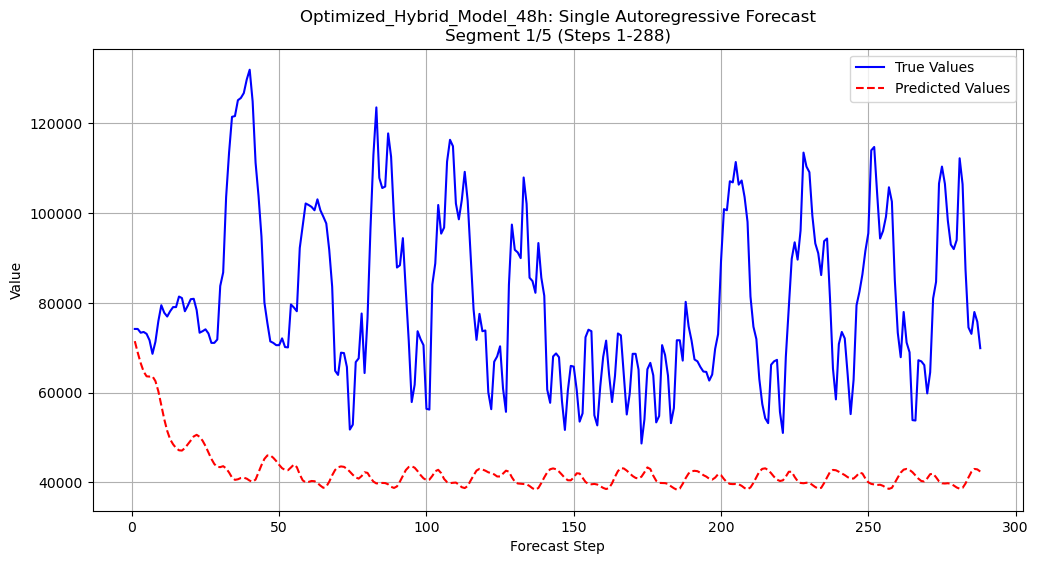

Segment plot saved to: inference_plots/Optimized_Hybrid_Model_48h_segment1_20250323_164439.png


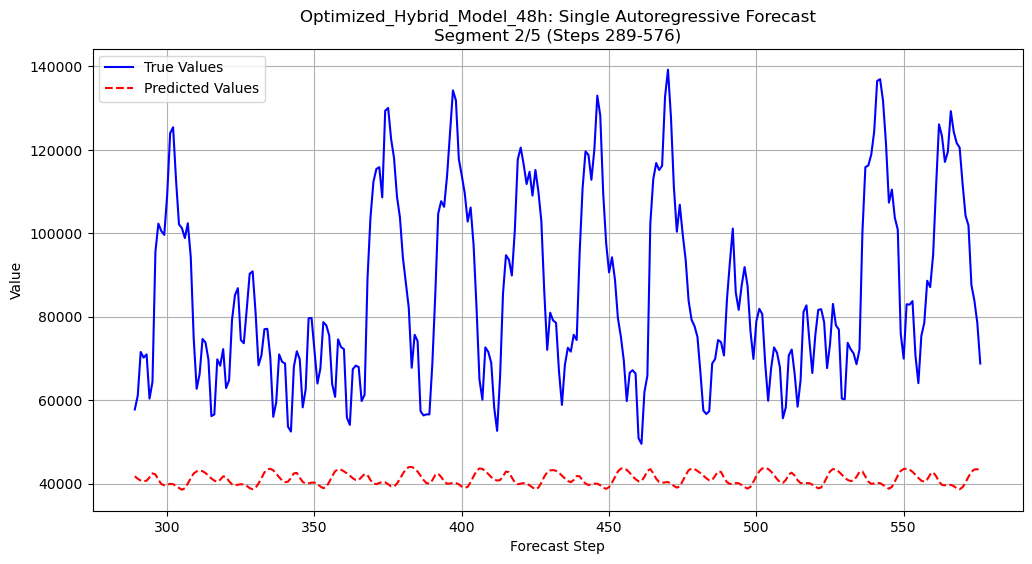

Segment plot saved to: inference_plots/Optimized_Hybrid_Model_48h_segment2_20250323_164439.png


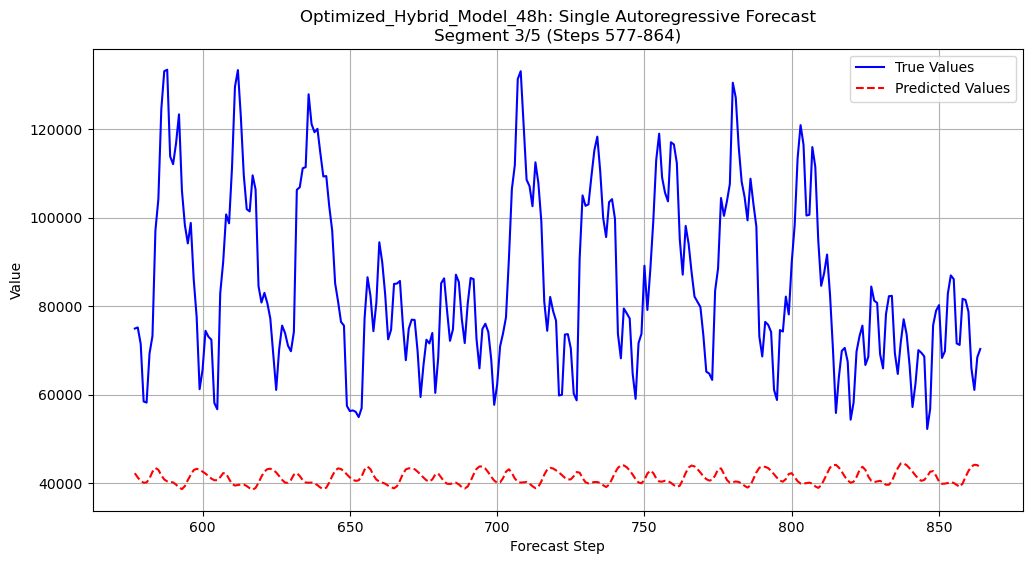

Segment plot saved to: inference_plots/Optimized_Hybrid_Model_48h_segment3_20250323_164439.png


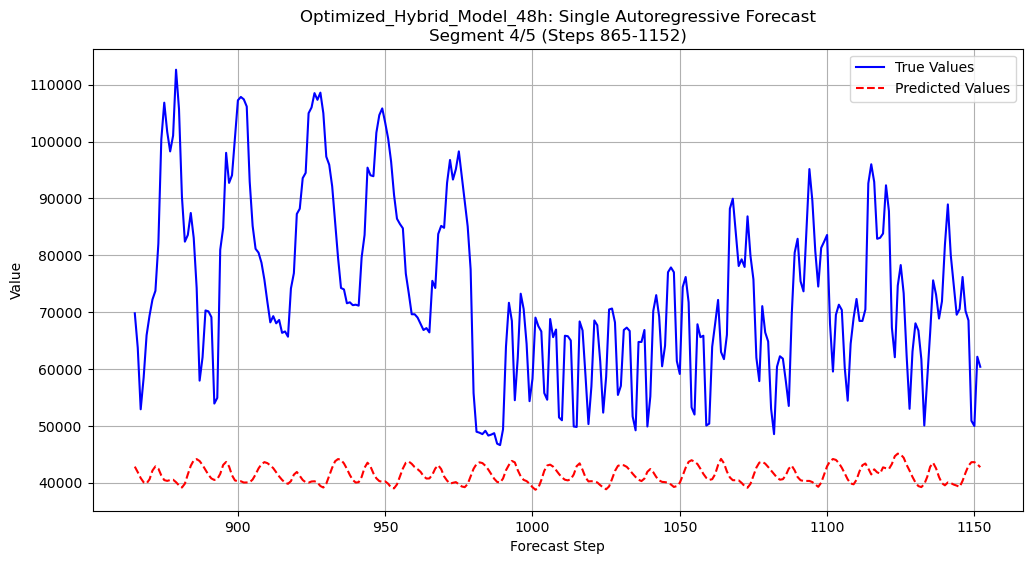

Segment plot saved to: inference_plots/Optimized_Hybrid_Model_48h_segment4_20250323_164439.png


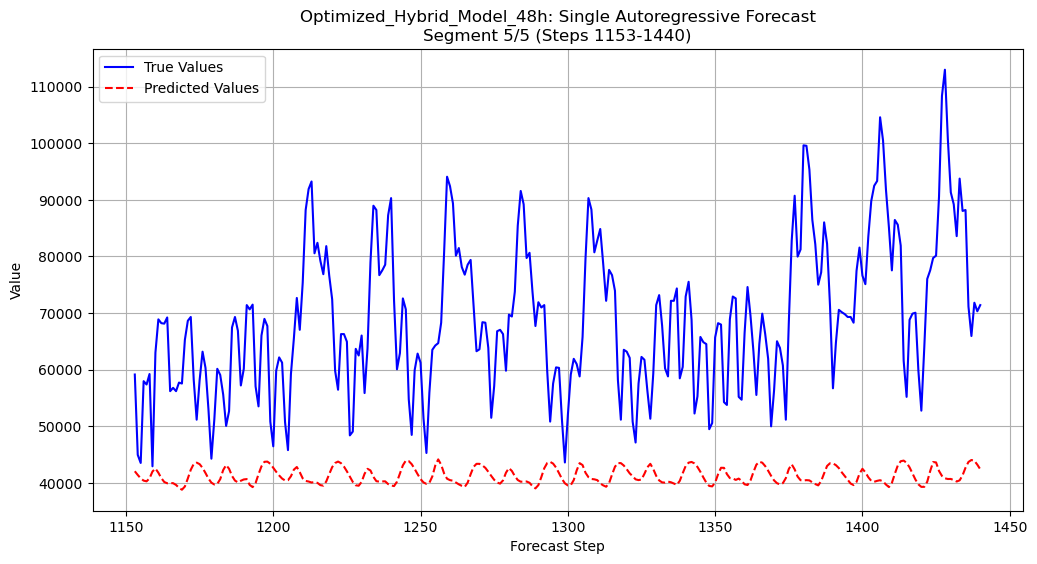

Segment plot saved to: inference_plots/Optimized_Hybrid_Model_48h_segment5_20250323_164439.png


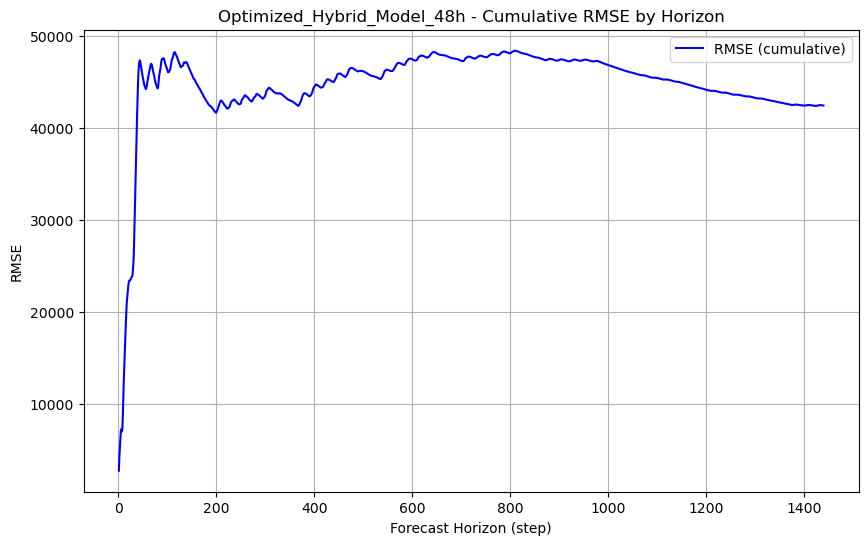

Cumulative RMSE plot saved to: inference_plots/Optimized_Hybrid_Model_48h_cumulative_rmse_20250323_164439.png


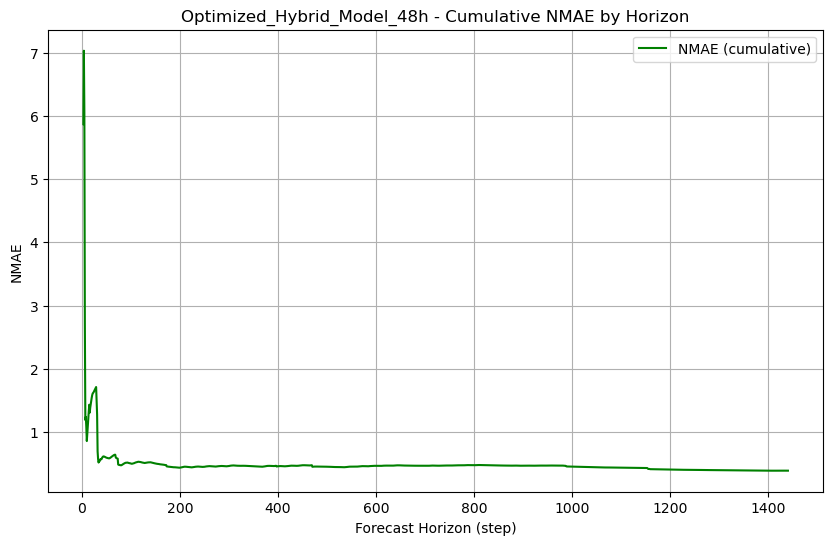

Cumulative NMAE plot saved to: inference_plots/Optimized_Hybrid_Model_48h_cumulative_nmae_20250323_164439.png

Esperimento per input width = 96 (ore)
Shapes:
 X_stat_train: (9076, 7)
 X_dyn_train: (9076, 96, 3)
 y_train: (9076,)
Starting Grid Search...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.



Training model with params: learning_rate=0.001, dropout_rate=0.2, static_units=50, lstm_units=50, batch_size=32

Training model with params: learning_rate=0.001, dropout_rate=0.2, static_units=100, lstm_units=50, batch_size=32

Training model with params: learning_rate=0.001, dropout_rate=0.2, static_units=50, lstm_units=100, batch_size=32

Training model with params: learning_rate=0.001, dropout_rate=0.2, static_units=100, lstm_units=100, batch_size=32

Training model with params: learning_rate=0.005, dropout_rate=0.2, static_units=50, lstm_units=50, batch_size=32

Training model with params: learning_rate=0.005, dropout_rate=0.2, static_units=100, lstm_units=50, batch_size=32

Training model with params: learning_rate=0.01, dropout_rate=0.2, static_units=50, lstm_units=50, batch_size=32

Training model with params: learning_rate=0.01, dropout_rate=0.2, static_units=50, lstm_units=100, batch_size=32

Training model with params: learning_rate=0.005, dropout_rate=0.2, static_units=100

/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Completed in 714.68s - Val Loss: 0.049151

Training model with params: learning_rate=0.005, dropout_rate=0.3, static_units=100, lstm_units=100, batch_size=32
Completed in 716.53s - Val Loss: 0.283240

Training model with params: learning_rate=0.01, dropout_rate=0.3, static_units=50, lstm_units=50, batch_size=32

Training model with params: learning_rate=0.005, dropout_rate=0.3, static_units=50, lstm_units=100, batch_size=32
Completed in 718.31s - Val Loss: 0.054872

Training model with params: learning_rate=0.01, dropout_rate=0.3, static_units=100, lstm_units=50, batch_size=32
Completed in 458.04s - Val Loss: 0.592328

Training model with params: learning_rate=0.01, dropout_rate=0.3, static_units=50, lstm_units=100, batch_size=32
Completed in 423.86s - Val Loss: nan

Training model with params: learning_rate=0.01, dropout_rate=0.3, static_units=100, lstm_units=100, batch_size=32
Completed in 588.93s - Val Loss: 0.782558

Training model with params: learning_rate=0.001, dropout_rate=0.5

[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed: 25.9min


Completed in 1557.48s - Val Loss: nan

Training model with params: learning_rate=0.001, dropout_rate=0.5, static_units=100, lstm_units=100, batch_size=32
Completed in 1575.83s - Val Loss: nan

Training model with params: learning_rate=0.005, dropout_rate=0.5, static_units=50, lstm_units=50, batch_size=32
Completed in 1588.86s - Val Loss: 0.593035

Training model with params: learning_rate=0.005, dropout_rate=0.5, static_units=100, lstm_units=50, batch_size=32
Completed in 709.51s - Val Loss: 0.056314

Training model with params: learning_rate=0.005, dropout_rate=0.5, static_units=50, lstm_units=100, batch_size=32
Completed in 444.31s - Val Loss: nan

Training model with params: learning_rate=0.005, dropout_rate=0.5, static_units=100, lstm_units=100, batch_size=32
Completed in 713.98s - Val Loss: 0.094012

Training model with params: learning_rate=0.01, dropout_rate=0.5, static_units=50, lstm_units=50, batch_size=32
Completed in 1555.89s - Val Loss: 0.930821

Training model with params:

[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed: 99.6min finished



Final Test Loss with Best Model (input width 96): [0.06725995987653732, 0.06725995987653732]
Best model saved as 'best_hybrid_model_lstm_96h.h5'
Executing single-chain autoregressive inference from the BEGINNING with Optimized_Hybrid_Model_96h (input_width=96)...
Forecast steps reduced to 1344 to match dataset length.
Single-chain forecast completed. Global RMSE=44703.32, Global NMAE=0.4257
Results saved to Hybrid_model_single_forecast_96h.xlsx


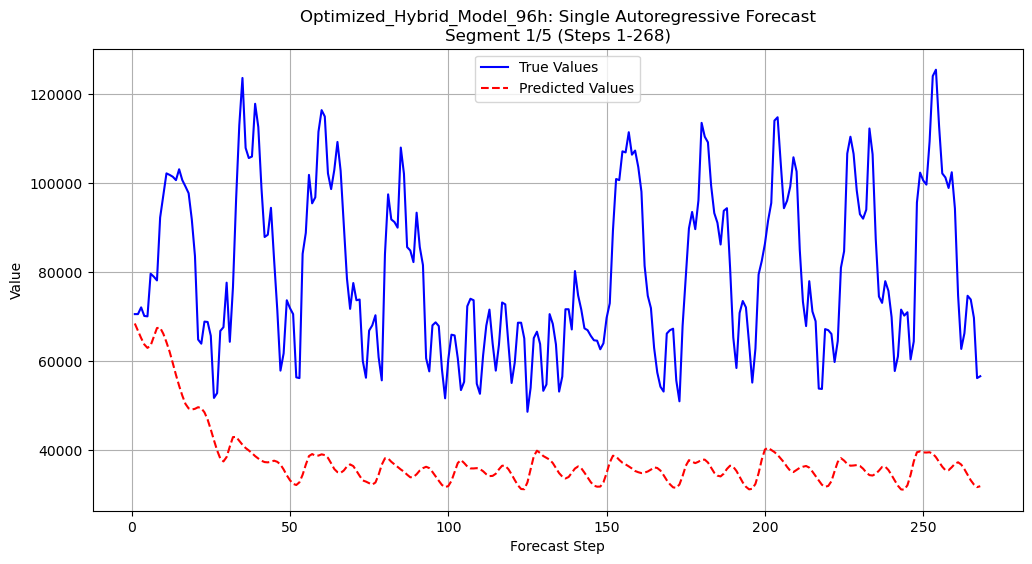

Segment plot saved to: inference_plots/Optimized_Hybrid_Model_96h_segment1_20250323_182504.png


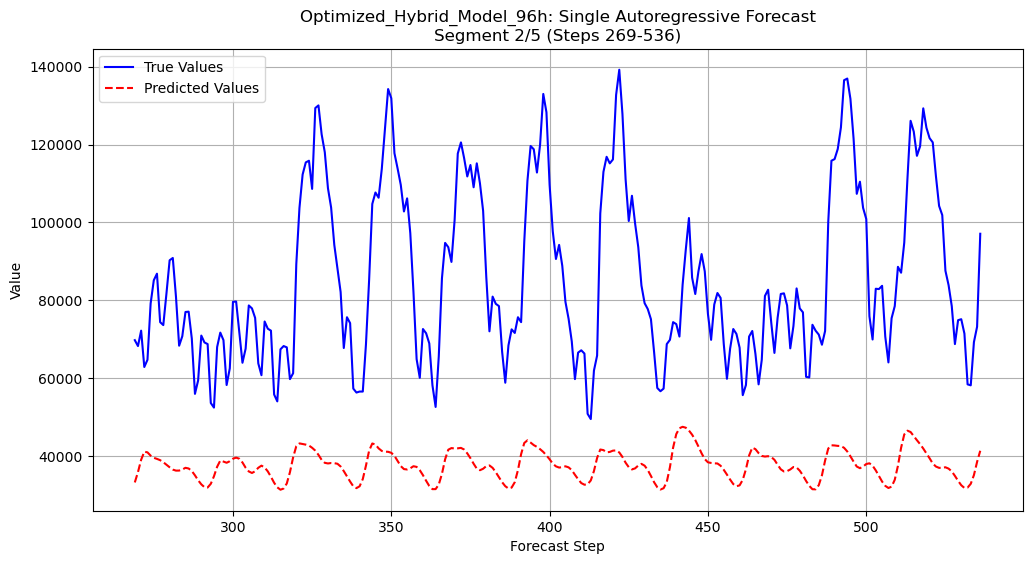

Segment plot saved to: inference_plots/Optimized_Hybrid_Model_96h_segment2_20250323_182504.png


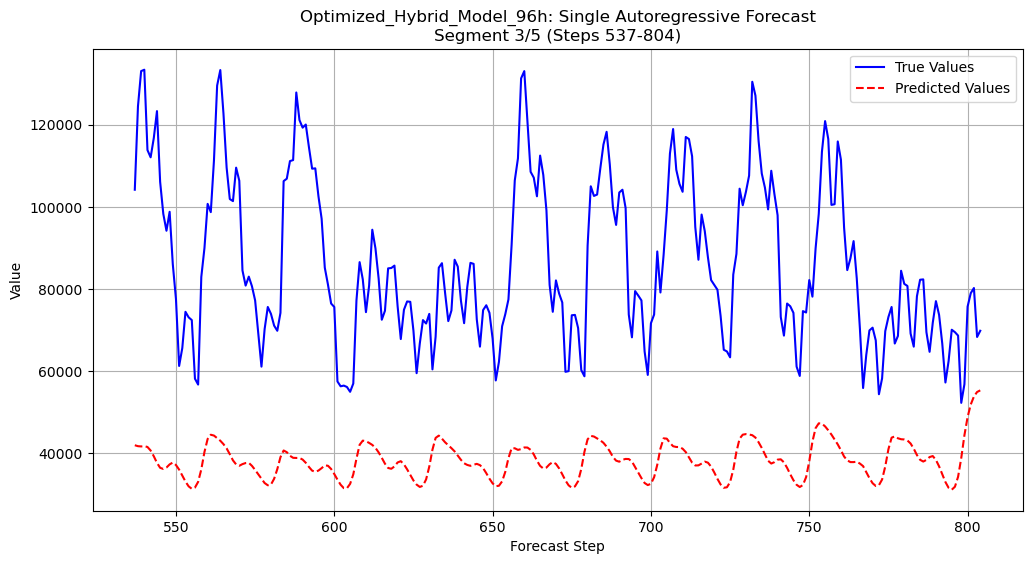

Segment plot saved to: inference_plots/Optimized_Hybrid_Model_96h_segment3_20250323_182504.png


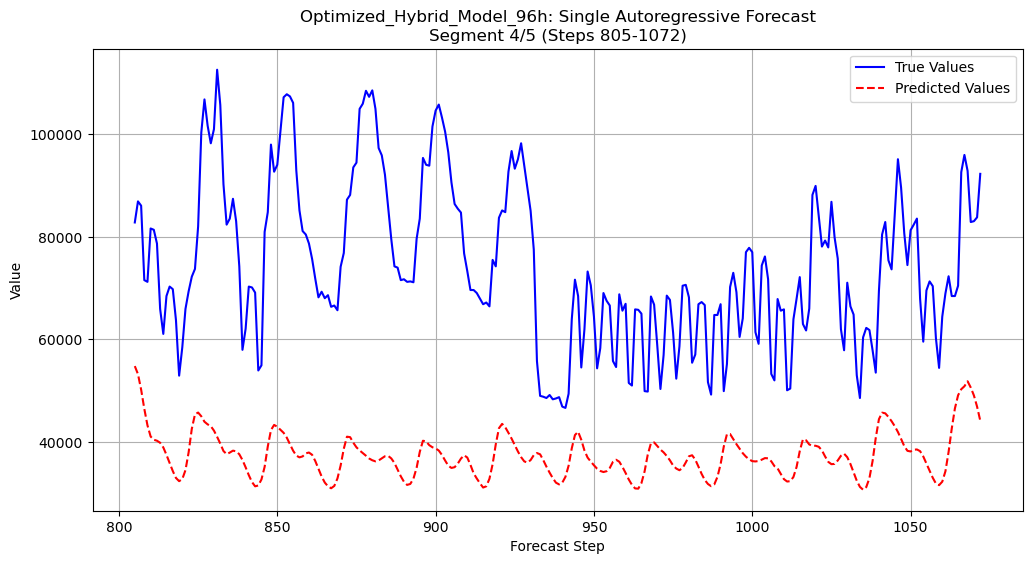

Segment plot saved to: inference_plots/Optimized_Hybrid_Model_96h_segment4_20250323_182504.png


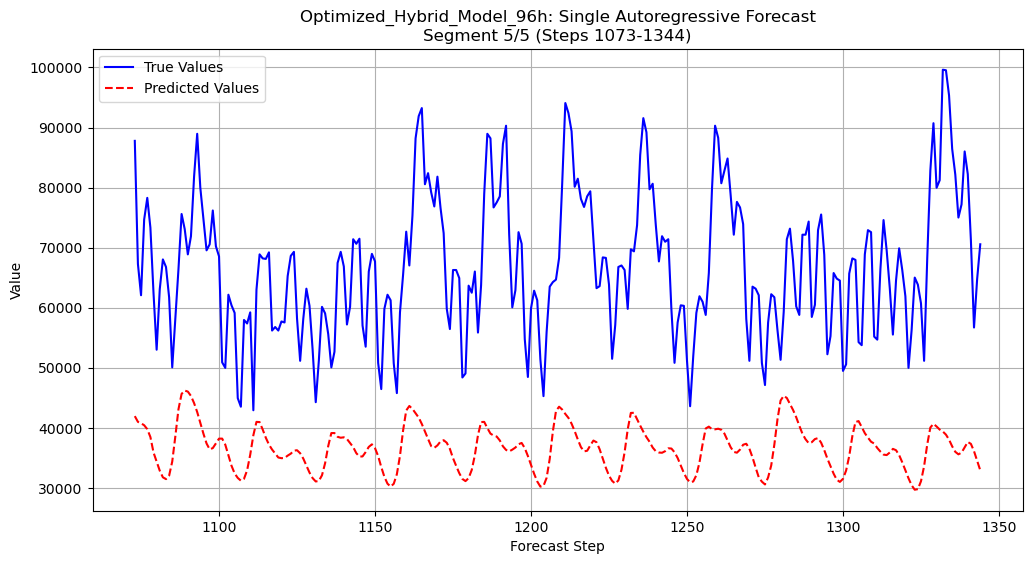

Segment plot saved to: inference_plots/Optimized_Hybrid_Model_96h_segment5_20250323_182504.png


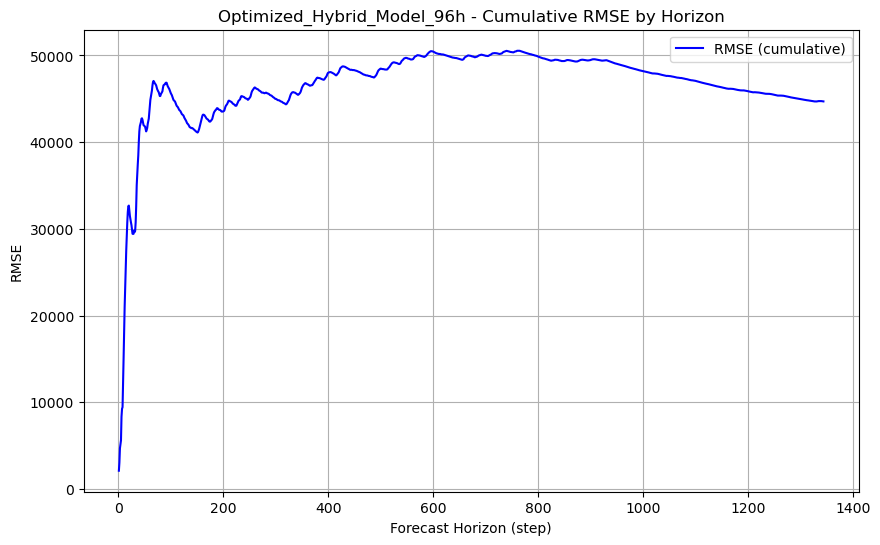

Cumulative RMSE plot saved to: inference_plots/Optimized_Hybrid_Model_96h_cumulative_rmse_20250323_182504.png


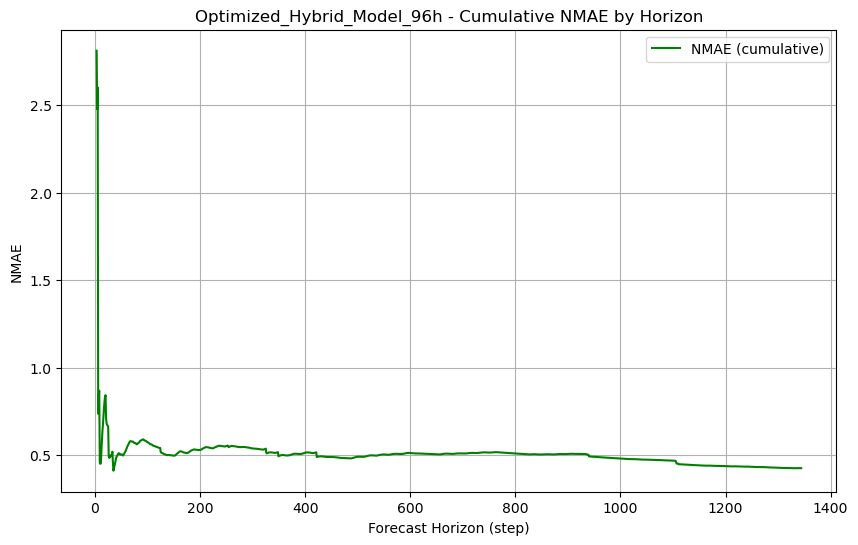

Cumulative NMAE plot saved to: inference_plots/Optimized_Hybrid_Model_96h_cumulative_nmae_20250323_182504.png

Esperimento per input width = 168 (ore)
Shapes:
 X_stat_train: (9004, 7)
 X_dyn_train: (9004, 168, 3)
 y_train: (9004,)
Starting Grid Search...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.



Training model with params: learning_rate=0.001, dropout_rate=0.2, static_units=50, lstm_units=50, batch_size=32

Training model with params: learning_rate=0.001, dropout_rate=0.2, static_units=100, lstm_units=50, batch_size=32

Training model with params: learning_rate=0.001, dropout_rate=0.2, static_units=50, lstm_units=100, batch_size=32

Training model with params: learning_rate=0.001, dropout_rate=0.2, static_units=100, lstm_units=100, batch_size=32

Training model with params: learning_rate=0.01, dropout_rate=0.2, static_units=100, lstm_units=50, batch_size=32

Training model with params: learning_rate=0.005, dropout_rate=0.2, static_units=50, lstm_units=100, batch_size=32

Training model with params: learning_rate=0.01, dropout_rate=0.2, static_units=50, lstm_units=50, batch_size=32

Training model with params: learning_rate=0.01, dropout_rate=0.2, static_units=50, lstm_units=100, batch_size=32

Training model with params: learning_rate=0.005, dropout_rate=0.2, static_units=100

/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



Training model with params: learning_rate=0.005, dropout_rate=0.3, static_units=100, lstm_units=100, batch_size=32
Completed in 1151.84s - Val Loss: 0.045436
Completed in 1148.57s - Val Loss: 0.086154

Training model with params: learning_rate=0.01, dropout_rate=0.3, static_units=100, lstm_units=50, batch_size=32

Training model with params: learning_rate=0.01, dropout_rate=0.3, static_units=50, lstm_units=50, batch_size=32
Completed in 698.37s - Val Loss: nan

Training model with params: learning_rate=0.01, dropout_rate=0.3, static_units=50, lstm_units=100, batch_size=32
Completed in 720.03s - Val Loss: nan

Training model with params: learning_rate=0.01, dropout_rate=0.3, static_units=100, lstm_units=100, batch_size=32
Completed in 681.26s - Val Loss: nan

Training model with params: learning_rate=0.001, dropout_rate=0.5, static_units=50, lstm_units=50, batch_size=32
Completed in 708.72s - Val Loss: nan

Training model with params: learning_rate=0.001, dropout_rate=0.5, static_units

[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed: 43.3min



Training model with params: learning_rate=0.001, dropout_rate=0.5, static_units=50, lstm_units=100, batch_size=32
Completed in 2769.66s - Val Loss: nan

Training model with params: learning_rate=0.001, dropout_rate=0.5, static_units=100, lstm_units=100, batch_size=32
Completed in 2776.23s - Val Loss: nan

Training model with params: learning_rate=0.005, dropout_rate=0.5, static_units=50, lstm_units=50, batch_size=32
Completed in 2787.22s - Val Loss: nan

Training model with params: learning_rate=0.005, dropout_rate=0.5, static_units=100, lstm_units=50, batch_size=32
Completed in 2792.64s - Val Loss: nan

Training model with params: learning_rate=0.005, dropout_rate=0.5, static_units=50, lstm_units=100, batch_size=32
Completed in 2805.86s - Val Loss: nan

Training model with params: learning_rate=0.005, dropout_rate=0.5, static_units=100, lstm_units=100, batch_size=32
Completed in 2829.22s - Val Loss: nan

Training model with params: learning_rate=0.01, dropout_rate=0.5, static_units=5

[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed: 173.6min finished



Final Test Loss with Best Model (input width 168): [0.06774894893169403, 0.06774894893169403]
Best model saved as 'best_hybrid_model_lstm_168h.h5'
Executing single-chain autoregressive inference from the BEGINNING with Optimized_Hybrid_Model_168h (input_width=168)...
Forecast steps reduced to 1272 to match dataset length.
Single-chain forecast completed. Global RMSE=38092.36, Global NMAE=0.3267
Results saved to Hybrid_model_single_forecast_168h.xlsx


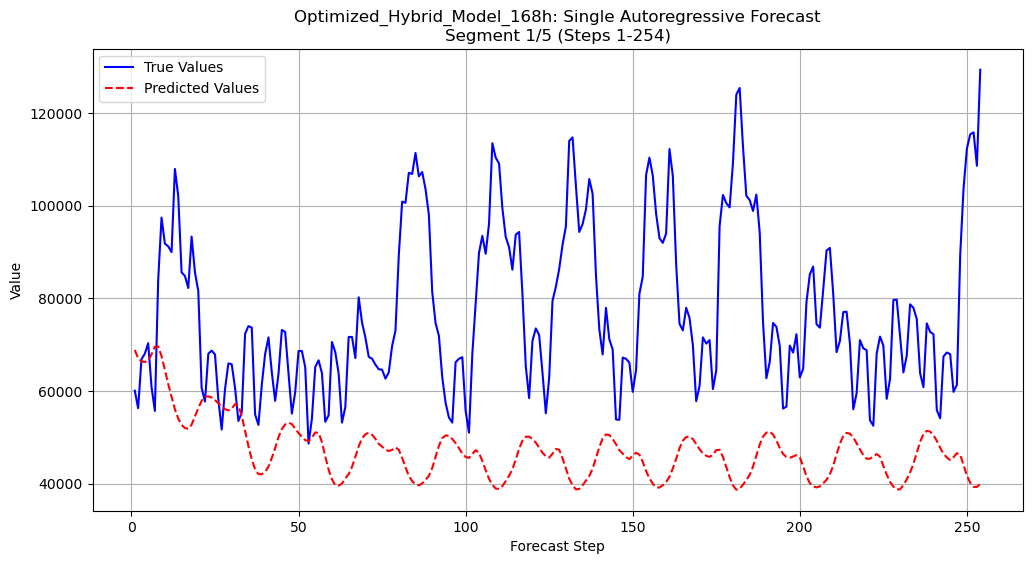

Segment plot saved to: inference_plots/Optimized_Hybrid_Model_168h_segment1_20250323_211915.png


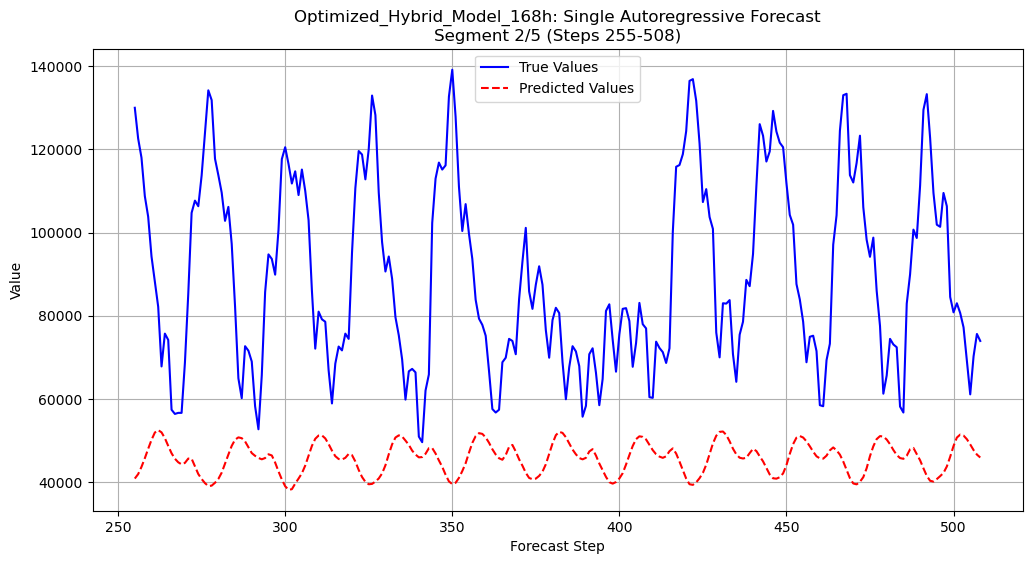

Segment plot saved to: inference_plots/Optimized_Hybrid_Model_168h_segment2_20250323_211915.png


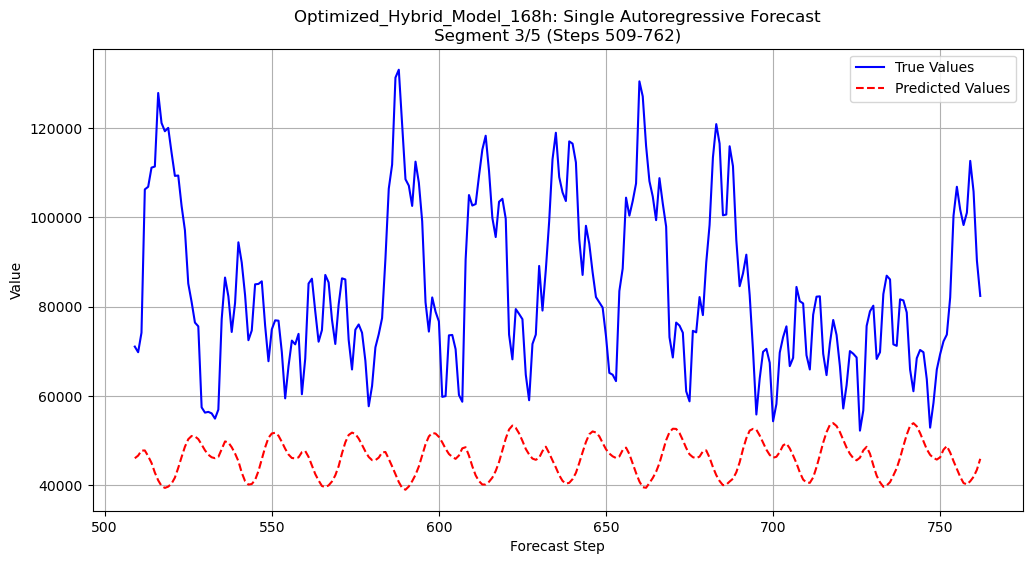

Segment plot saved to: inference_plots/Optimized_Hybrid_Model_168h_segment3_20250323_211915.png


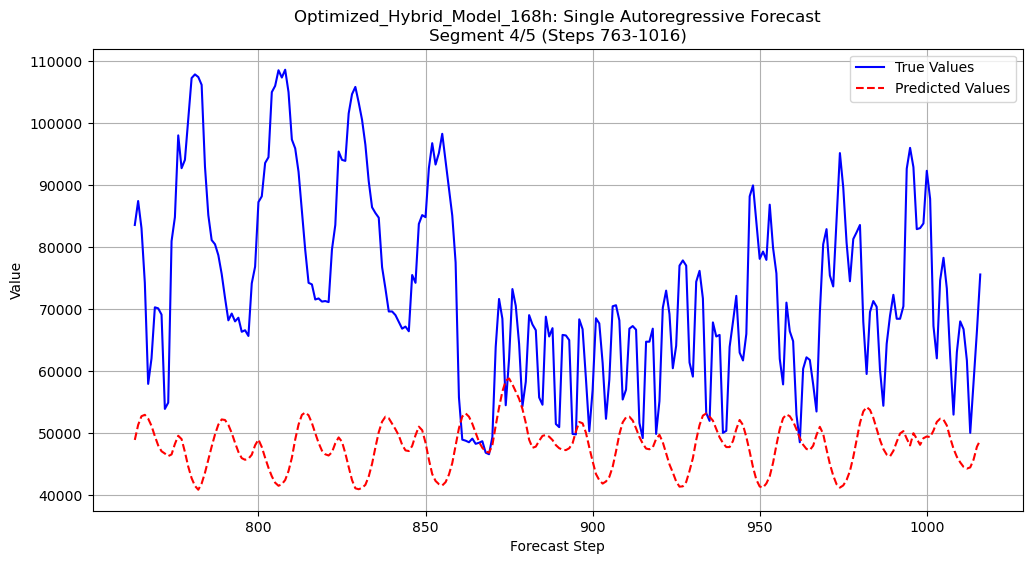

Segment plot saved to: inference_plots/Optimized_Hybrid_Model_168h_segment4_20250323_211915.png


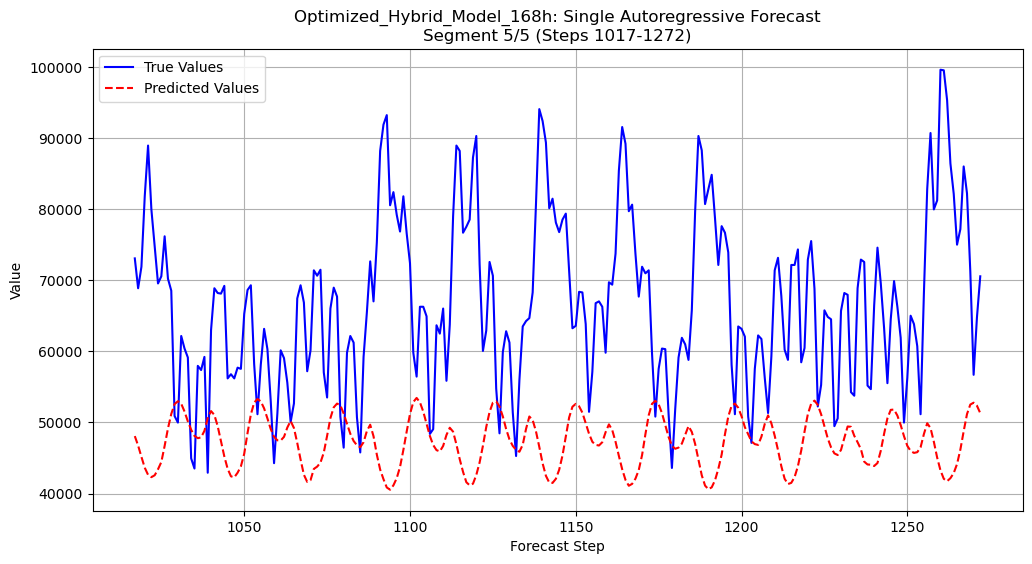

Segment plot saved to: inference_plots/Optimized_Hybrid_Model_168h_segment5_20250323_211915.png


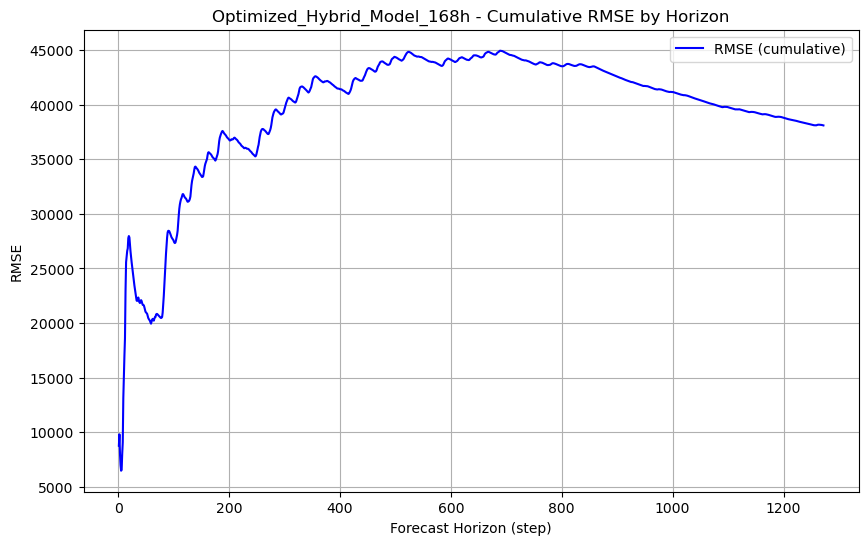

Cumulative RMSE plot saved to: inference_plots/Optimized_Hybrid_Model_168h_cumulative_rmse_20250323_211915.png


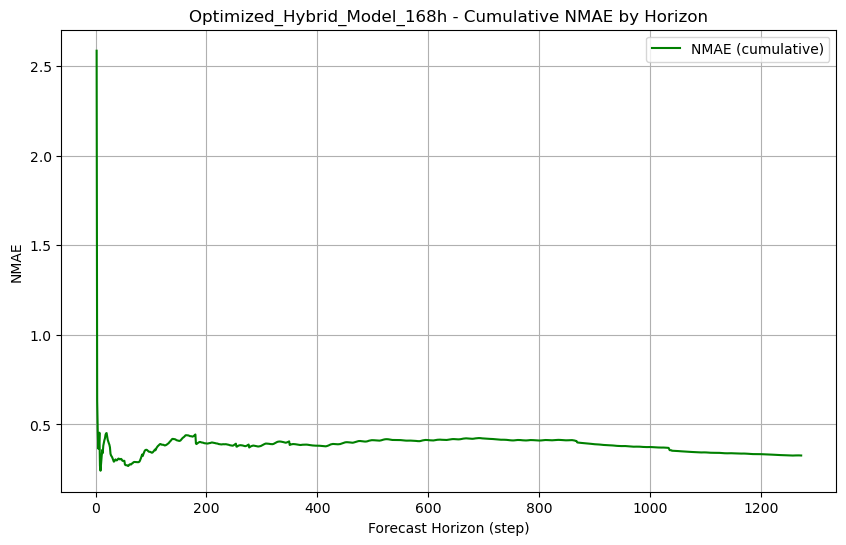

Cumulative NMAE plot saved to: inference_plots/Optimized_Hybrid_Model_168h_cumulative_nmae_20250323_211915.png


In [ ]:
import numpy as np                        
import pandas as pd                       
import tensorflow as tf                   
from tensorflow.keras import Input, Model 
from tensorflow.keras.layers import Dense, LSTM, Concatenate, Dropout  
from tensorflow.keras.callbacks import EarlyStopping 
from tensorflow.keras.optimizers import Adam          
from sklearn.model_selection import ParameterGrid    
from joblib import Parallel, delayed      
import time                               
from sklearn.metrics import mean_squared_error  

# Feature statiche 
static_features = ['Year sin', 'Year cos', 'Hour sin', 'Hour cos', 
                   'Day sin', 'Day cos', 'Nuvolosità [%]']
# Feature dinamiche 
dynamic_features = ['Irraggiamento [kWh/m2]', 'Temperatura [K]', 'Potenza Uffici [W]']
target_col = 'Potenza Uffici [W]'  # Colonna target da prevedere

def create_dataset(df, window_size, static_feats, dynamic_feats, target):
    """
    Crea dataset per series forecasting con finestre temporali
    
    Args:
        df: DataFrame sorgente
        window_size: Dimensione finestra temporale
        static_feats: Feature statiche
        dynamic_feats: Feature dinamiche
        target: Colonna target
    
    Returns:
        X_stat: Feature statiche
        X_dyn: Feature dinamiche
        y: Valori target
    """
    X_stat, X_dyn, y = [], [], []
    # Inizia dall'indice window_size per avere dati storici
    for i in range(window_size, len(df)):
        # Estrae finestra feature dinamiche
        dyn_window = df[dynamic_feats].iloc[i-window_size:i].values
        X_dyn.append(dyn_window)
        
        # Estrae feature statiche al timestep corrente
        stat_current = df[static_feats].iloc[i].values
        X_stat.append(stat_current)
        
        # Estrae valore target
        y.append(df[target].iloc[i])
    
    return np.array(X_stat), np.array(X_dyn), np.array(y)

def create_model(learning_rate, dropout_rate, window_size, model__static_units, model__lstm_units):
    """
    Costruisce un modello ibrido con rami statico e dinamico
    
    Args:
        learning_rate: Tasso di apprendimento
        dropout_rate: Tasso di dropout per regolarizzazione
        window_size: Dimensione finestra temporale
        model__static_units: Neuroni per il ramo statico
        model__lstm_units: Neuroni per i layer LSTM
    
    Returns:
        Modello Keras compilato
    """
    # Pulizia sessione per evitare problemi di memoria
    tf.keras.backend.clear_session()
    
    # Input layer per feature statiche e dinamiche
    input_stat = Input(shape=(len(static_features),), name='input_static')
    input_dyn = Input(shape=(window_size, len(dynamic_features)), name='input_dynamic')

    # Ramo statico con layer dense e dropout
    x_stat = Dense(model__static_units, activation='relu')(input_stat)
    x_stat = Dropout(dropout_rate)(x_stat)

    # Ramo dinamico con layer LSTM multipli e dropout
    x_dyn = LSTM(model__lstm_units, activation='relu', return_sequences=True)(input_dyn)
    x_dyn = Dropout(dropout_rate)(x_dyn)
    x_dyn = LSTM(model__lstm_units, activation='relu', return_sequences=True)(x_dyn)
    x_dyn = LSTM(model__lstm_units, activation='relu', return_sequences=False)(x_dyn)
    x_dyn = Dropout(dropout_rate)(x_dyn)

    # Concatenazione dei rami statico e dinamico
    merged = Concatenate()([x_stat, x_dyn])
    output = Dense(1)(merged)  # Layer di output finale

    # Creazione e compilazione del modello
    model = Model(inputs=[input_stat, input_dyn], outputs=output)
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, 
                  loss='mean_squared_error', 
                  metrics=['mean_squared_error'])
    
    return model

def train_and_evaluate(params, window_size, X_stat_train, X_dyn_train, y_train, X_stat_val, X_dyn_val, y_val):
    """
    Addestramento e valutazione del modello con parametri specifici
    Args:
        params: Dizionario dei parametri del modello
        window_size: Dimensione finestra temporale
        X_stat_train/val: Feature statiche train/validation
        X_dyn_train/val: Feature dinamiche train/validation
        y_train/val: Target train/validation
    Returns:
        Dizionario con risultati del training
    """
    # Estrazione parametri
    learning_rate = params['learning_rate']
    dropout_rate = params['dropout_rate']
    model__static_units = params['model__static_units']
    model__lstm_units = params['model__lstm_units']
    batch_size = params['batch_size']
    
    # Creazione e training del modello
    model = create_model(learning_rate, dropout_rate, window_size, model__static_units, model__lstm_units)
    
    # Early stopping per prevenire overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)
    # Training con misurazione del tempo
    start_time = time.time()
    history = model.fit(
        x=[X_stat_train, X_dyn_train],
        y=y_train,
        validation_data=([X_stat_val, X_dyn_val], y_val),
        epochs=50,
        batch_size=batch_size,
        callbacks=[early_stopping],
        verbose=0
    )
    # Valutazione e restituzione risultati
    val_loss = model.evaluate([X_stat_val, X_dyn_val], y_val, verbose=0)[0]
    training_time = time.time() - start_time
    
    return {
        'params': params,
        'val_loss': val_loss,
        'history': history.history,
        'model': model,
        'training_time': training_time
    }

def single_chain_autoregressive_inference_with_plots(model,data_evaluation,static_features,dynamic_features,input_width,forecast_steps,target,train_mean,model_name='Hybrid_Model',
                                                     output_filename='predictions_single_chain.xlsx'
):
    """
    Esegue inferenza autoregressiva e genera visualizzazioni
    
    Args:
        model: Modello Keras addestrato
        data_evaluation: Dati per valutazione
        static_features: Elenco feature statiche
        dynamic_features: Elenco feature dinamiche
        input_width: Dimensione finestra di input
        forecast_steps: Numero di passi di previsione
        target: Colonna target
        train_mean: Medie del training set
        train_std: Deviazioni standard del training set
        model_name: Nome del modello per plot
        output_filename: Nome file Excel per salvataggio risultati
    
    Returns:
        Predizioni reali e valori veri
    """
    print(f"Executing single-chain autoregressive inference from the BEGINNING with {model_name} (input_width={input_width})...")
    
    # Adatta forecast_steps se più grande della lunghezza del dataset
    if len(data_evaluation) < input_width + forecast_steps:
        forecast_steps = forecast_steps - input_width
        print(f"Forecast steps reduced to {forecast_steps} to match dataset length.")
    
    # Preparazione dati
    data_real = data_evaluation.copy()
    data_std = data_evaluation.copy()
    
    # Standardizzazione dei dati
    for col in data_std.columns:
        if col in train_mean and col in train_std:
            data_std[col] = (data_std[col] - train_mean[col]) / train_std[col]
        else:
            print(f"Warning: colonna '{col}' non presente in train_mean/std, lasciata invariata.")
    
    # Preparazione finestra corrente
    current_window = data_std.iloc[0 : input_width + forecast_steps].copy()
    
    # Inizializzazione array per predizioni
    predictions_std = np.zeros(forecast_steps)
    predictions_real = np.zeros(forecast_steps)
    
    # Ciclo di inferenza autoregressiva
    for step in range(forecast_steps):
        local_idx = input_width + step
        
        # Preparazione feature statiche e dinamiche
        X_stat_current = current_window[static_features].iloc[local_idx - 1 : local_idx].values
        X_dyn_window = current_window[dynamic_features].iloc[step : step + input_width].values
        X_dyn_window = X_dyn_window.reshape(1, input_width, len(dynamic_features))
        
        # Predizione
        y_pred_std = model.predict([X_stat_current, X_dyn_window], verbose=0)[0][0]
        predictions_std[step] = y_pred_std
        
        # Destandardizzazione
        y_pred_real = y_pred_std * train_std[target] + train_mean[target]
        predictions_real[step] = y_pred_real
        
        # Reinserimento della predizione per autoregressione
        if step < forecast_steps - 1:
            current_window.at[current_window.index[local_idx], target] = y_pred_std

    # Calcolo metriche di performance
    true_values_real = data_real[target].iloc[input_width : input_width + forecast_steps].values
    rmse_full = np.sqrt(mean_squared_error(true_values_real, predictions_real))
    mae_full = np.mean(np.abs(true_values_real - predictions_real))
    data_range = np.max(true_values_real) - np.min(true_values_real) if len(true_values_real) > 0 else 1
    nmae_full = mae_full / data_range if data_range != 0 else np.nan
    
    # Stampa risultati e salvataggio
    print(f"Single-chain forecast completed. Global RMSE={rmse_full:.2f}, Global NMAE={nmae_full:.4f}")
    results_df = pd.DataFrame({
        'Step': np.arange(1, forecast_steps + 1),
        'True_Values': true_values_real,
        'Predicted_Values': predictions_real
    })
    
    # Salvataggio risultati in Excel
    with pd.ExcelWriter(output_filename) as writer:
        results_df.to_excel(writer, sheet_name='Single_Forecast', index=False)
    print(f"Results saved to {output_filename}")
    
    
    return predictions_real, true_values_real

# --- DEFINIZIONE DELLA GRID DEI PARAMETRI ---
param_grid = {
    'learning_rate': [0.001, 0.005, 0.01],
    'dropout_rate': [0.2, 0.3, 0.5],
    'model__static_units': [50, 100, 150],
    'model__lstm_units': [50, 100, 150],
    'batch_size': [32, 64, 128]
}
grid = list(ParameterGrid(param_grid))
print(f"Total parameter combinations: {len(grid)}")

input_widths = [24, 48, 96, 168]  # Diverse dimensioni di finestra temporale
forecast_steps = 1440  # Numero di passi di previsione

# Ciclo principale per esperimenti con diverse finestre temporali
for window_size in input_widths:
    print("\n" + "="*60)
    print(f"Esperimento per input width = {window_size} (ore)")
    print("="*60)
    
    # Creazione dei dataset per l'input width corrente
    X_stat_train, X_dyn_train, y_train = create_dataset(train_data_std, window_size, static_features, dynamic_features, target_col)
    X_stat_val, X_dyn_val, y_val = create_dataset(val_data_std, window_size, static_features, dynamic_features, target_col)
    X_stat_test, X_dyn_test, y_test = create_dataset(test_data_std, window_size, static_features, dynamic_features, target_col)
    
    # Stampa delle dimensioni dei dataset
    print("Shapes:")
    print(" X_stat_train:", X_stat_train.shape)
    print(" X_dyn_train:", X_dyn_train.shape)
    print(" y_train:", y_train.shape)
    
    # Esecuzione della grid search in parallelo
    print("Starting Grid Search...")
    results = Parallel(n_jobs=-1, verbose=2)(
        delayed(train_and_evaluate)(
            params, window_size, X_stat_train, X_dyn_train, y_train, X_stat_val, X_dyn_val, y_val
        ) for params in grid
    )
    
    # Ordinamento dei risultati per validation loss
    results.sort(key=lambda x: x['val_loss'])
    
    # Stampa dei risultati della grid search
    print("\nGrid Search Results (sorted by validation loss):")
    for i, result in enumerate(results):
        params = result['params']
        val_loss = result['val_loss']
        time_taken = result['training_time']
        print(f"{i+1}. Val Loss: {val_loss:.6f}, Learning Rate: {params['learning_rate']}, "
              f"Dropout Rate: {params['dropout_rate']}, Batch Size: {params['batch_size']}, "
              f"Static Units: {params['model__static_units']}, LSTM Units: {params['model__lstm_units']}, "
              f"Time: {time_taken:.2f}s")
    
    # Recupero del miglior modello
    best_result = results[0]
    best_model = best_result['model']
    best_params = best_result['params']
    
    # Stampa dei parametri del miglior modello
    print(f"\nBest Model Parameters for input width {window_size}:")
    print(f"  Learning Rate: {best_params['learning_rate']}")
    print(f"  Dropout Rate: {best_params['dropout_rate']}")
    print(f"  Static Units: {best_params['model__static_units']}")
    print(f"  LSTM Units: {best_params['model__lstm_units']}")
    print(f"  Batch Size: {best_params['batch_size']}")
    print(f"  Validation Loss: {best_result['val_loss']:.6f}")
    
    # Test finale con il modello migliore
    test_loss = best_model.evaluate([X_stat_test, X_dyn_test], y_test, verbose=0)
    print(f"\nFinal Test Loss with Best Model (input width {window_size}): {test_loss}")
    
    # Salvataggio del modello migliore
    model_filename = f"best_hybrid_model_lstm_{window_size}h.h5"
    best_model.save(model_filename)
    print(f"Best model saved as '{model_filename}'")
    
    # Esecuzione dell'inferenza autoregressiva con plotting
    pred_real, true_real = single_chain_autoregressive_inference_with_plots(
        model=best_model,
        data_evaluation=evaluation_data,
        static_features=static_features,
        dynamic_features=dynamic_features,
        input_width=window_size,
        forecast_steps=forecast_steps,
        target=target_col,
        train_mean=data_mean,
        train_std=data_devstd,
        model_name=f'Optimized_Hybrid_Model_{window_size}h',
        output_filename=f'Hybrid_model_single_forecast_{window_size}h.xlsx'
    )

IRRAGIAMENTO

Total parameter combinations: 243

Esperimento per input width = 24 (ore)
Shapes:
 X_stat_train: (9148, 7)
 X_dyn_train: (9148, 24, 3)
 y_train: (9148,)
Starting Grid Search...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.



Training model with params: learning_rate=0.001, dropout_rate=0.2, static_units=100, lstm_units=150, batch_size=32

Training model with params: learning_rate=0.001, dropout_rate=0.2, static_units=50, lstm_units=150, batch_size=32

Training model with params: learning_rate=0.001, dropout_rate=0.2, static_units=50, lstm_units=50, batch_size=32

Training model with params: learning_rate=0.005, dropout_rate=0.2, static_units=100, lstm_units=50, batch_size=32
Training model with params: learning_rate=0.005, dropout_rate=0.2, static_units=50, lstm_units=100, batch_size=32


Training model with params: learning_rate=0.001, dropout_rate=0.2, static_units=150, lstm_units=50, batch_size=32

Training model with params: learning_rate=0.005, dropout_rate=0.2, static_units=50, lstm_units=50, batch_size=32

Training model with params: learning_rate=0.001, dropout_rate=0.2, static_units=100, lstm_units=50, batch_size=32

Training model with params: learning_rate=0.005, dropout_rate=0.2, static_units=

[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed: 11.2min


Completed in 664.93s - Val Loss: 0.014072

Training model with params: learning_rate=0.001, dropout_rate=0.3, static_units=50, lstm_units=50, batch_size=32
Completed in 634.90s - Val Loss: 0.013682

Training model with params: learning_rate=0.001, dropout_rate=0.3, static_units=100, lstm_units=50, batch_size=32
Completed in 193.57s - Val Loss: 0.013044

Training model with params: learning_rate=0.001, dropout_rate=0.3, static_units=150, lstm_units=50, batch_size=32
Completed in 192.96s - Val Loss: 0.013271

Training model with params: learning_rate=0.001, dropout_rate=0.3, static_units=50, lstm_units=100, batch_size=32
Completed in 602.65s - Val Loss: 0.014652

Training model with params: learning_rate=0.001, dropout_rate=0.3, static_units=100, lstm_units=100, batch_size=32
Completed in 196.03s - Val Loss: 0.015757

Training model with params: learning_rate=0.001, dropout_rate=0.3, static_units=150, lstm_units=100, batch_size=32
Completed in 600.49s - Val Loss: 0.071978

Training model

/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



Training model with params: learning_rate=0.001, dropout_rate=0.5, static_units=150, lstm_units=100, batch_size=32
Completed in 711.92s - Val Loss: 0.019493

Training model with params: learning_rate=0.001, dropout_rate=0.5, static_units=50, lstm_units=150, batch_size=32
Completed in 192.06s - Val Loss: 0.016591

Training model with params: learning_rate=0.001, dropout_rate=0.5, static_units=100, lstm_units=150, batch_size=32
Completed in 1562.68s - Val Loss: 0.011038

Training model with params: learning_rate=0.001, dropout_rate=0.5, static_units=150, lstm_units=150, batch_size=32
Completed in 1563.28s - Val Loss: 0.011601

Training model with params: learning_rate=0.005, dropout_rate=0.5, static_units=50, lstm_units=50, batch_size=32
Completed in 1576.76s - Val Loss: 0.011429

Training model with params: learning_rate=0.005, dropout_rate=0.5, static_units=100, lstm_units=50, batch_size=32
Completed in 193.46s - Val Loss: 0.016691

Training model with params: learning_rate=0.005, dro

[Parallel(n_jobs=-1)]: Done 134 tasks      | elapsed: 127.3min


Completed in 1438.17s - Val Loss: 0.012770

Training model with params: learning_rate=0.005, dropout_rate=0.5, static_units=100, lstm_units=100, batch_size=64
Completed in 175.86s - Val Loss: 0.017623

Training model with params: learning_rate=0.005, dropout_rate=0.5, static_units=150, lstm_units=100, batch_size=64
Completed in 169.97s - Val Loss: 0.017252

Training model with params: learning_rate=0.005, dropout_rate=0.5, static_units=50, lstm_units=150, batch_size=64
Completed in 1460.05s - Val Loss: 0.013640

Training model with params: learning_rate=0.005, dropout_rate=0.5, static_units=100, lstm_units=150, batch_size=64
Completed in 876.24s - Val Loss: 0.012654

Training model with params: learning_rate=0.005, dropout_rate=0.5, static_units=150, lstm_units=150, batch_size=64
Completed in 900.71s - Val Loss: 0.013616

Training model with params: learning_rate=0.01, dropout_rate=0.5, static_units=50, lstm_units=50, batch_size=64
Completed in 868.77s - Val Loss: 0.014206

Training mo

[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed: 217.5min finished



Final Test Loss with Best Model (input width 24): [1.5077223777770996, 1.5077223777770996]
Best model saved as 'best_hybrid_model_lstm_irragiamento_24h.h5'
Executing single-chain autoregressive inference from the BEGINNING with Optimized_Hybrid_Model_irragiamento24h (input_width=24)...
Single-chain forecast completed. Global RMSE=0.26, Global NMAE=0.2155
Results saved to Hybrid_model_single_forecast_irragiamento24h.xlsx


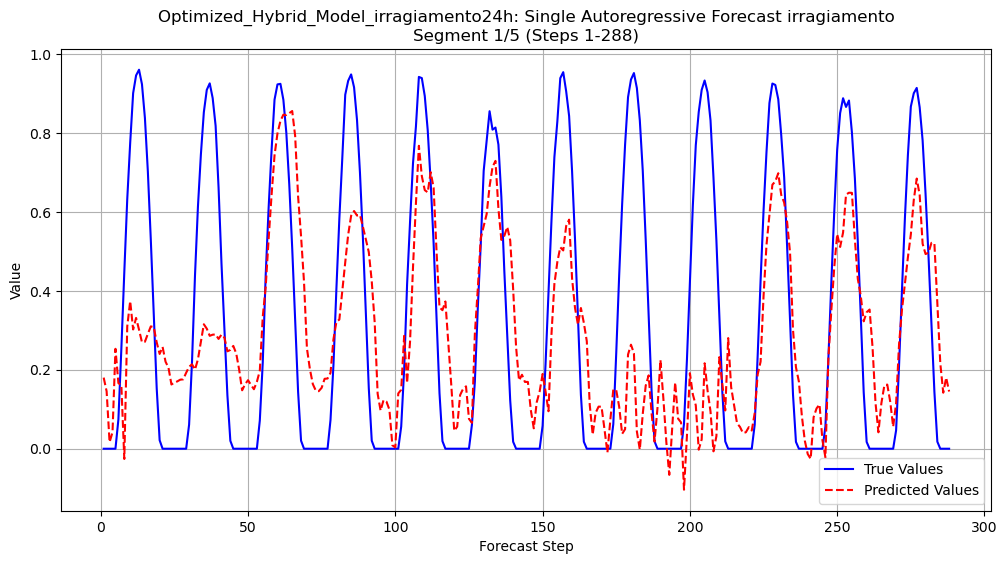

Segment plot saved to: inference_plots/Optimized_Hybrid_Model_irragiamento24h_segment1_20250324_042719.png


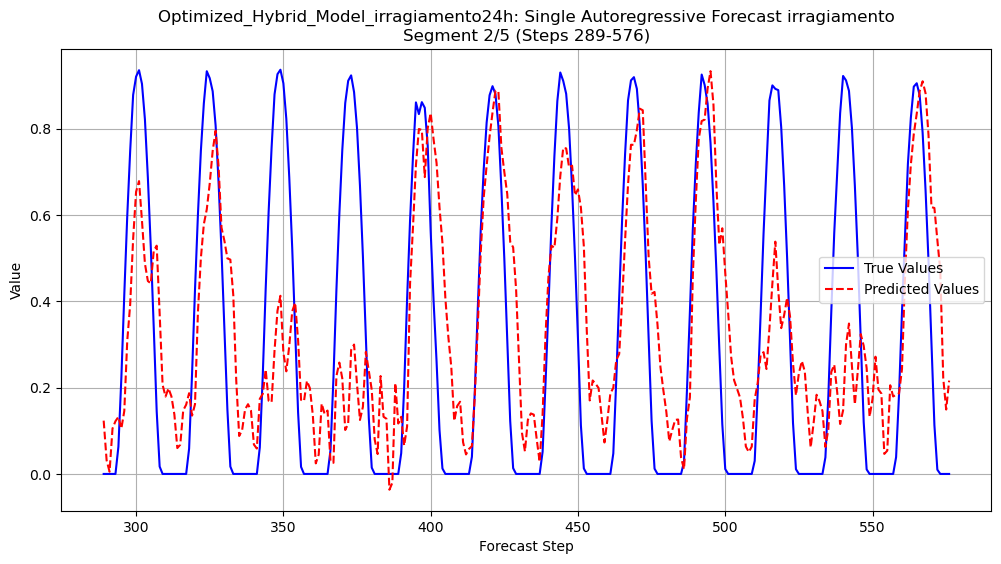

Segment plot saved to: inference_plots/Optimized_Hybrid_Model_irragiamento24h_segment2_20250324_042719.png


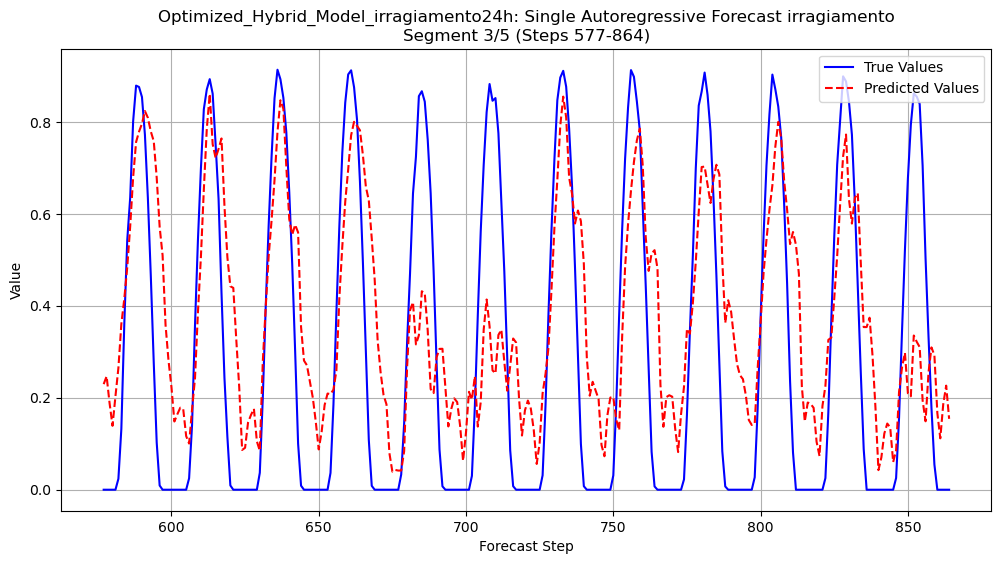

Segment plot saved to: inference_plots/Optimized_Hybrid_Model_irragiamento24h_segment3_20250324_042719.png


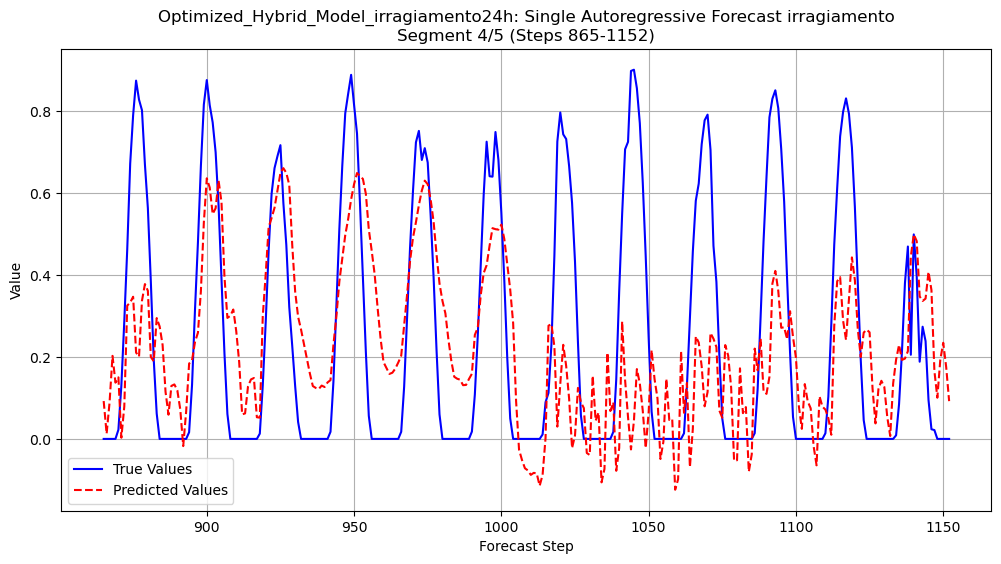

Segment plot saved to: inference_plots/Optimized_Hybrid_Model_irragiamento24h_segment4_20250324_042719.png


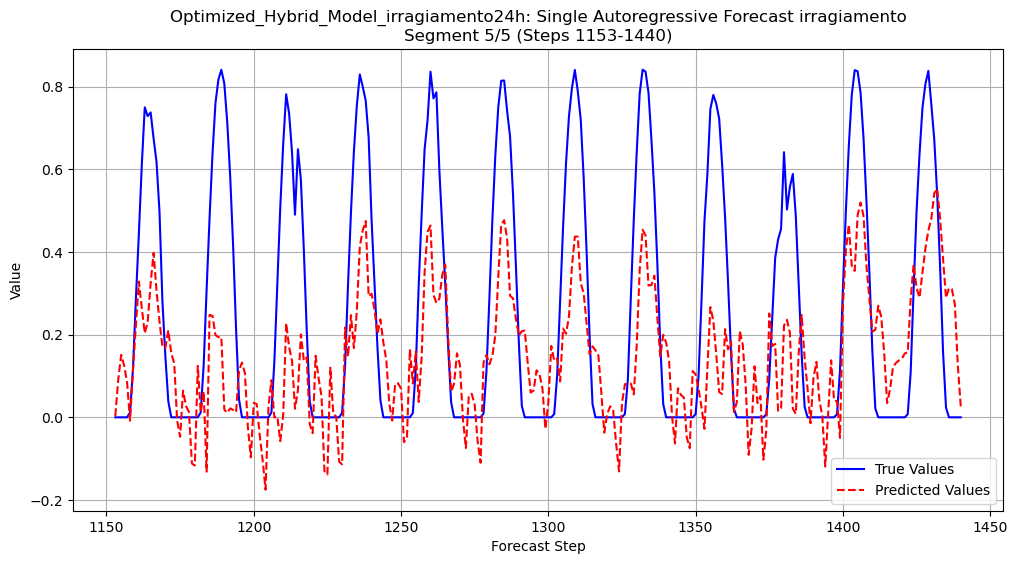

Segment plot saved to: inference_plots/Optimized_Hybrid_Model_irragiamento24h_segment5_20250324_042719.png


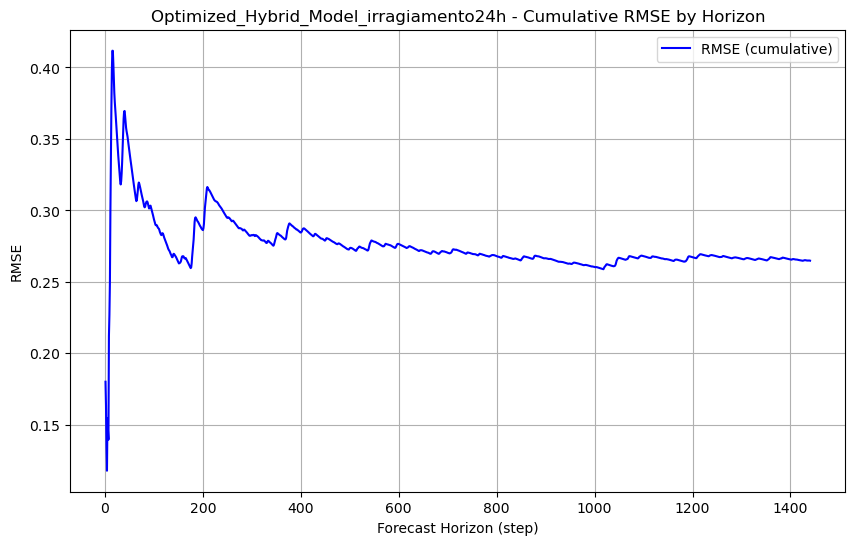

Cumulative RMSE plot saved to: inference_plots/Optimized_Hybrid_Model_irragiamento24h_cumulative_rmse_20250324_042719.png


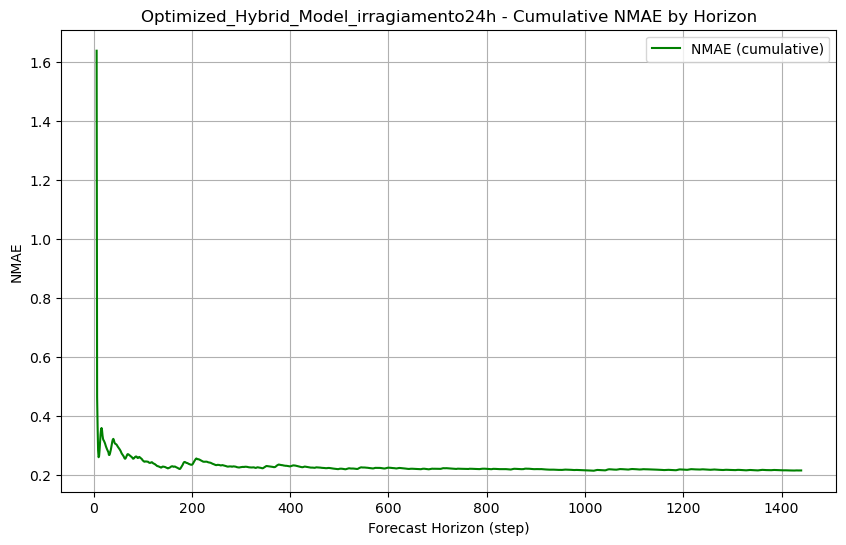

Cumulative NMAE plot saved to: inference_plots/Optimized_Hybrid_Model_irragiamento24h_cumulative_nmae_20250324_042719.png

Esperimento per input width = 48 (ore)
Shapes:
 X_stat_train: (9124, 7)
 X_dyn_train: (9124, 48, 3)
 y_train: (9124,)
Starting Grid Search...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.



Training model with params: learning_rate=0.001, dropout_rate=0.2, static_units=50, lstm_units=50, batch_size=32

Training model with params: learning_rate=0.001, dropout_rate=0.2, static_units=100, lstm_units=50, batch_size=32

Training model with params: learning_rate=0.001, dropout_rate=0.2, static_units=150, lstm_units=50, batch_size=32

Training model with params: learning_rate=0.001, dropout_rate=0.2, static_units=50, lstm_units=100, batch_size=32

Training model with params: learning_rate=0.001, dropout_rate=0.2, static_units=100, lstm_units=100, batch_size=32

Training model with params: learning_rate=0.001, dropout_rate=0.2, static_units=150, lstm_units=100, batch_size=32

Training model with params: learning_rate=0.005, dropout_rate=0.2, static_units=50, lstm_units=100, batch_size=32
Training model with params: learning_rate=0.005, dropout_rate=0.2, static_units=100, lstm_units=100, batch_size=32
Training model with params: learning_rate=0.001, dropout_rate=0.2, static_units

[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed: 22.4min
/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



Training model with params: learning_rate=0.01, dropout_rate=0.2, static_units=150, lstm_units=150, batch_size=32
Completed in 1401.96s - Val Loss: 0.011629

Training model with params: learning_rate=0.001, dropout_rate=0.3, static_units=50, lstm_units=50, batch_size=32
Completed in 1097.49s - Val Loss: 0.013559

Training model with params: learning_rate=0.001, dropout_rate=0.3, static_units=100, lstm_units=50, batch_size=32
Completed in 378.24s - Val Loss: 0.012750

Training model with params: learning_rate=0.001, dropout_rate=0.3, static_units=150, lstm_units=50, batch_size=32
Completed in 355.45s - Val Loss: 0.013017

Training model with params: learning_rate=0.001, dropout_rate=0.3, static_units=50, lstm_units=100, batch_size=32
Completed in 1322.12s - Val Loss: 0.017085

Training model with params: learning_rate=0.001, dropout_rate=0.3, static_units=100, lstm_units=100, batch_size=32
Completed in 825.27s - Val Loss: 0.083947

Training model with params: learning_rate=0.001, dropo

[Parallel(n_jobs=-1)]: Done 134 tasks      | elapsed: 236.6min



Training model with params: learning_rate=0.005, dropout_rate=0.5, static_units=50, lstm_units=100, batch_size=64
Completed in 331.77s - Val Loss: 0.017023

Training model with params: learning_rate=0.005, dropout_rate=0.5, static_units=100, lstm_units=100, batch_size=64
Completed in 2722.87s - Val Loss: 0.043164

Training model with params: learning_rate=0.005, dropout_rate=0.5, static_units=150, lstm_units=100, batch_size=64
Completed in 1954.63s - Val Loss: 0.021425

Training model with params: learning_rate=0.005, dropout_rate=0.5, static_units=50, lstm_units=150, batch_size=64
Completed in 2752.91s - Val Loss: 0.015300

Training model with params: learning_rate=0.005, dropout_rate=0.5, static_units=100, lstm_units=150, batch_size=64
Completed in 352.83s - Val Loss: 0.020892

Training model with params: learning_rate=0.005, dropout_rate=0.5, static_units=150, lstm_units=150, batch_size=64
Completed in 1675.09s - Val Loss: 0.399596

Training model with params: learning_rate=0.01, d

[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed: 400.4min finished



Final Test Loss with Best Model (input width 48): [1.4701802730560303, 1.4701802730560303]
Best model saved as 'best_hybrid_model_lstm_irragiamento_48h.h5'
Executing single-chain autoregressive inference from the BEGINNING with Optimized_Hybrid_Model_irragiamento48h (input_width=48)...
Single-chain forecast completed. Global RMSE=0.26, Global NMAE=0.2139
Results saved to Hybrid_model_single_forecast_irragiamento48h.xlsx


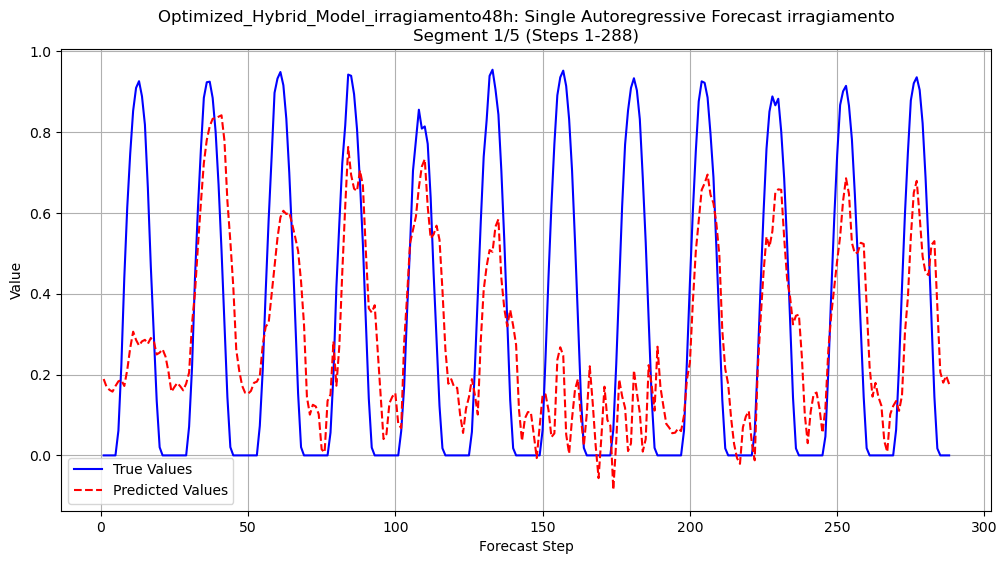

Segment plot saved to: inference_plots/Optimized_Hybrid_Model_irragiamento48h_segment1_20250324_110818.png


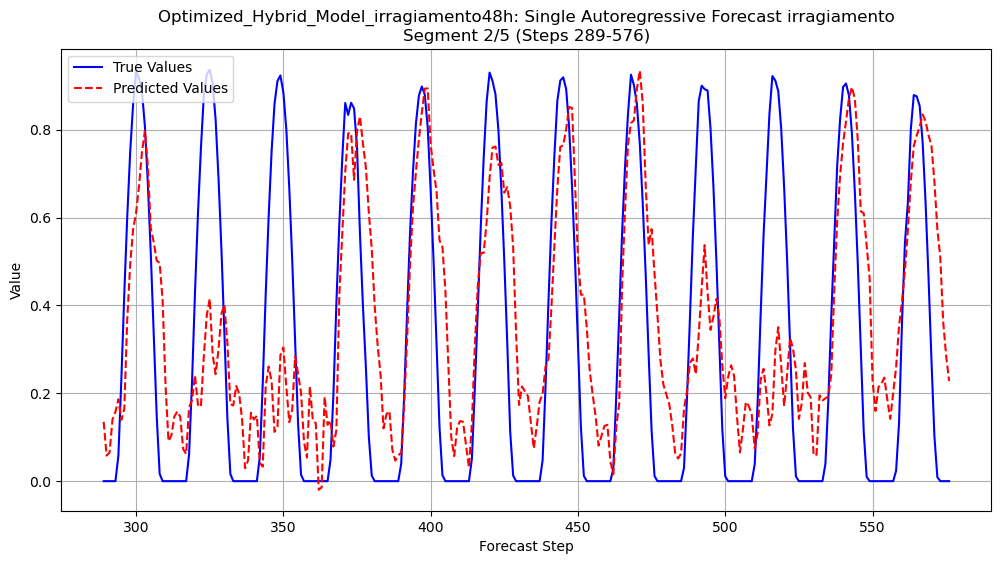

Segment plot saved to: inference_plots/Optimized_Hybrid_Model_irragiamento48h_segment2_20250324_110818.png


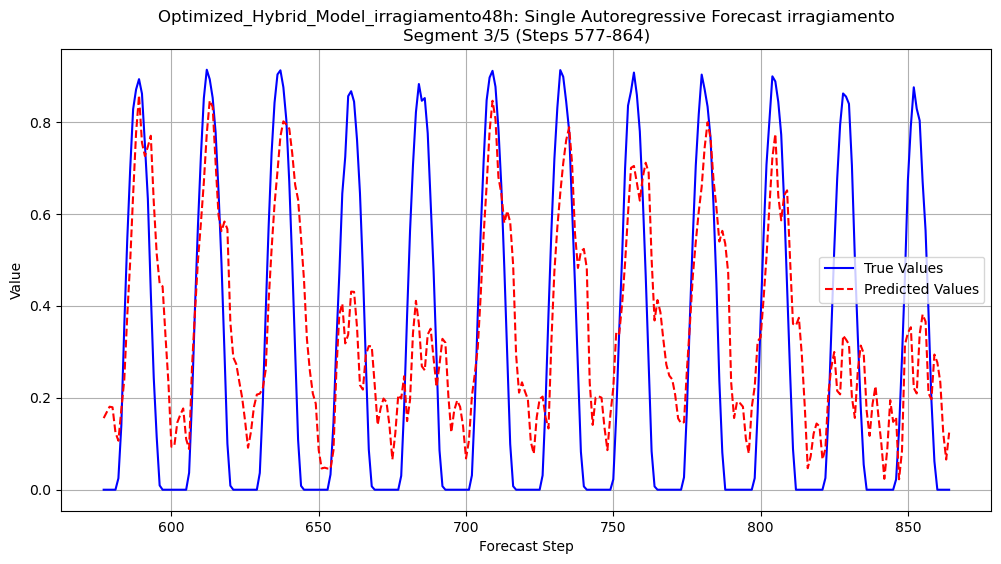

Segment plot saved to: inference_plots/Optimized_Hybrid_Model_irragiamento48h_segment3_20250324_110818.png


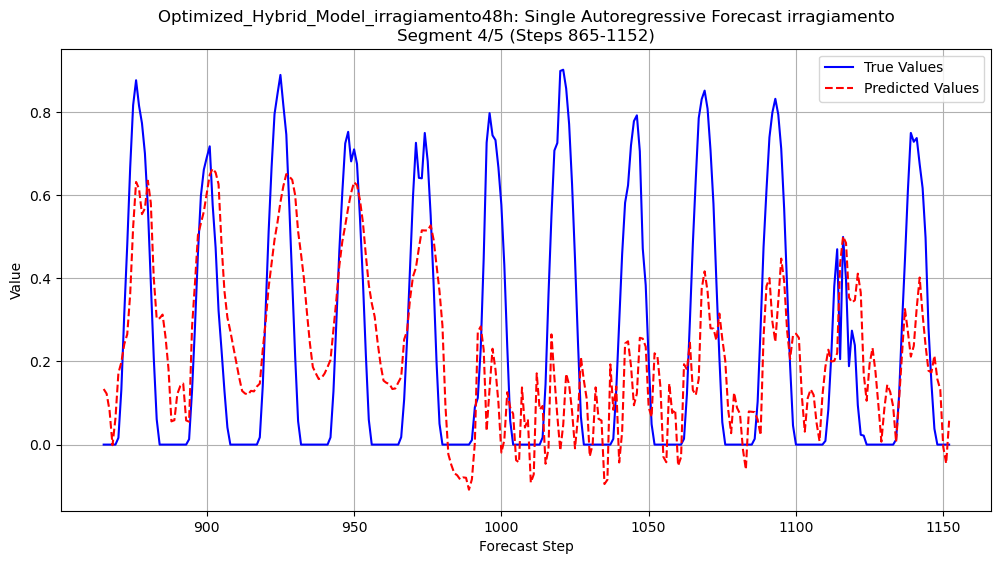

Segment plot saved to: inference_plots/Optimized_Hybrid_Model_irragiamento48h_segment4_20250324_110818.png


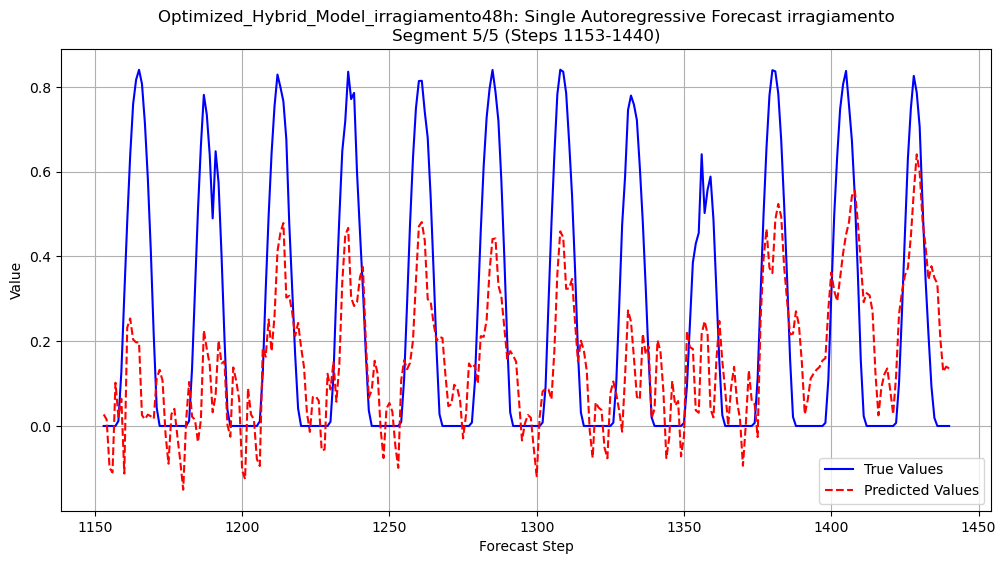

Segment plot saved to: inference_plots/Optimized_Hybrid_Model_irragiamento48h_segment5_20250324_110818.png


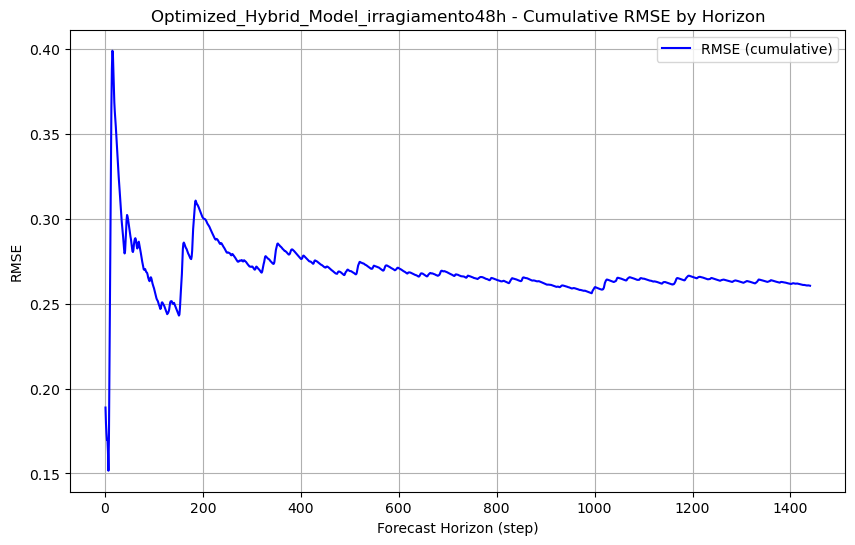

Cumulative RMSE plot saved to: inference_plots/Optimized_Hybrid_Model_irragiamento48h_cumulative_rmse_20250324_110818.png


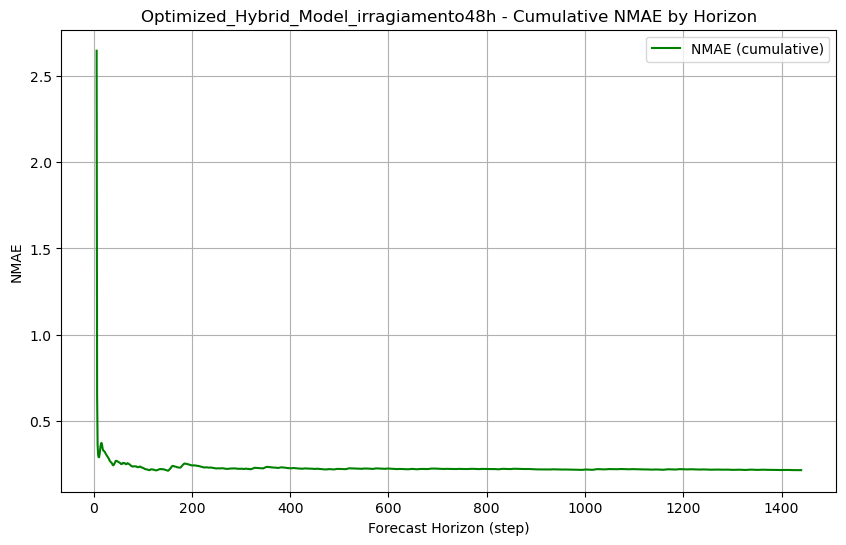

Cumulative NMAE plot saved to: inference_plots/Optimized_Hybrid_Model_irragiamento48h_cumulative_nmae_20250324_110818.png

Esperimento per input width = 96 (ore)
Shapes:
 X_stat_train: (9076, 7)
 X_dyn_train: (9076, 96, 3)
 y_train: (9076,)
Starting Grid Search...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.



Training model with params: learning_rate=0.001, dropout_rate=0.2, static_units=50, lstm_units=50, batch_size=32

Training model with params: learning_rate=0.001, dropout_rate=0.2, static_units=100, lstm_units=50, batch_size=32

Training model with params: learning_rate=0.001, dropout_rate=0.2, static_units=50, lstm_units=150, batch_size=32

Training model with params: learning_rate=0.005, dropout_rate=0.2, static_units=100, lstm_units=50, batch_size=32

Training model with params: learning_rate=0.001, dropout_rate=0.2, static_units=150, lstm_units=100, batch_size=32

Training model with params: learning_rate=0.001, dropout_rate=0.2, static_units=150, lstm_units=150, batch_size=32

Training model with params: learning_rate=0.005, dropout_rate=0.2, static_units=100, lstm_units=100, batch_size=32

Training model with params: learning_rate=0.005, dropout_rate=0.2, static_units=150, lstm_units=50, batch_size=32

Training model with params: learning_rate=0.005, dropout_rate=0.2, static_uni

[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed: 45.6min


Completed in 2740.95s - Val Loss: 0.023570

Training model with params: learning_rate=0.001, dropout_rate=0.3, static_units=50, lstm_units=50, batch_size=32
Completed in 2782.15s - Val Loss: 0.028224

Training model with params: learning_rate=0.001, dropout_rate=0.3, static_units=100, lstm_units=50, batch_size=32
Completed in 1701.28s - Val Loss: nan

Training model with params: learning_rate=0.001, dropout_rate=0.3, static_units=150, lstm_units=50, batch_size=32
Completed in 757.32s - Val Loss: 0.019072

Training model with params: learning_rate=0.001, dropout_rate=0.3, static_units=50, lstm_units=100, batch_size=32
Completed in 724.64s - Val Loss: 0.021313

Training model with params: learning_rate=0.001, dropout_rate=0.3, static_units=100, lstm_units=100, batch_size=32
Completed in 1840.92s - Val Loss: 0.021659

Training model with params: learning_rate=0.001, dropout_rate=0.3, static_units=150, lstm_units=100, batch_size=32
Completed in 748.07s - Val Loss: 0.013530

Training model 

/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



Training model with params: learning_rate=0.001, dropout_rate=0.2, static_units=100, lstm_units=150, batch_size=64
Completed in 1732.75s - Val Loss: nan

Training model with params: learning_rate=0.001, dropout_rate=0.2, static_units=150, lstm_units=150, batch_size=64
Completed in 3795.85s - Val Loss: nan

Training model with params: learning_rate=0.005, dropout_rate=0.2, static_units=50, lstm_units=50, batch_size=64
Completed in 3893.71s - Val Loss: nan

Training model with params: learning_rate=0.005, dropout_rate=0.2, static_units=100, lstm_units=50, batch_size=64
Completed in 3989.64s - Val Loss: 0.113953

Training model with params: learning_rate=0.005, dropout_rate=0.2, static_units=150, lstm_units=50, batch_size=64
Completed in 611.16s - Val Loss: 0.013534

Training model with params: learning_rate=0.005, dropout_rate=0.2, static_units=50, lstm_units=100, batch_size=64
Completed in 570.03s - Val Loss: 0.014528

Training model with params: learning_rate=0.005, dropout_rate=0.2, 

[Parallel(n_jobs=-1)]: Done 134 tasks      | elapsed: 403.1min


Completed in 775.47s - Val Loss: 0.016466

Training model with params: learning_rate=0.005, dropout_rate=0.5, static_units=100, lstm_units=100, batch_size=64
Completed in 737.61s - Val Loss: 0.017277

Training model with params: learning_rate=0.005, dropout_rate=0.5, static_units=150, lstm_units=100, batch_size=64
Completed in 4676.36s - Val Loss: 0.014094

Training model with params: learning_rate=0.005, dropout_rate=0.5, static_units=50, lstm_units=150, batch_size=64
Completed in 2862.69s - Val Loss: nan

Training model with params: learning_rate=0.005, dropout_rate=0.5, static_units=100, lstm_units=150, batch_size=64
Completed in 2829.42s - Val Loss: nan

Training model with params: learning_rate=0.005, dropout_rate=0.5, static_units=150, lstm_units=150, batch_size=64
Completed in 2999.50s - Val Loss: nan

Training model with params: learning_rate=0.01, dropout_rate=0.5, static_units=50, lstm_units=50, batch_size=64
Completed in 4943.94s - Val Loss: 0.012917

Training model with par

[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed: 672.2min finished



Final Test Loss with Best Model (input width 96): [1.4467254877090454, 1.4467254877090454]
Best model saved as 'best_hybrid_model_lstm_irragiamento_96h.h5'
Executing single-chain autoregressive inference from the BEGINNING with Optimized_Hybrid_Model_irragiamento96h (input_width=96)...
Forecast steps reduced to 1344 to match dataset length.
Single-chain forecast completed. Global RMSE=0.26, Global NMAE=0.2132
Results saved to Hybrid_model_single_forecast_irragiamento96h.xlsx


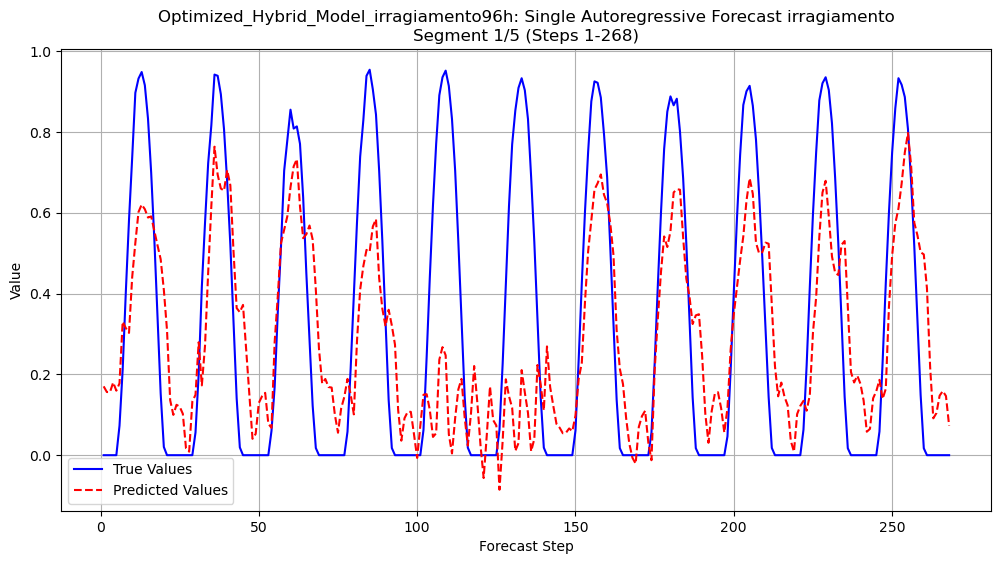

Segment plot saved to: inference_plots/Optimized_Hybrid_Model_irragiamento96h_segment1_20250324_222106.png


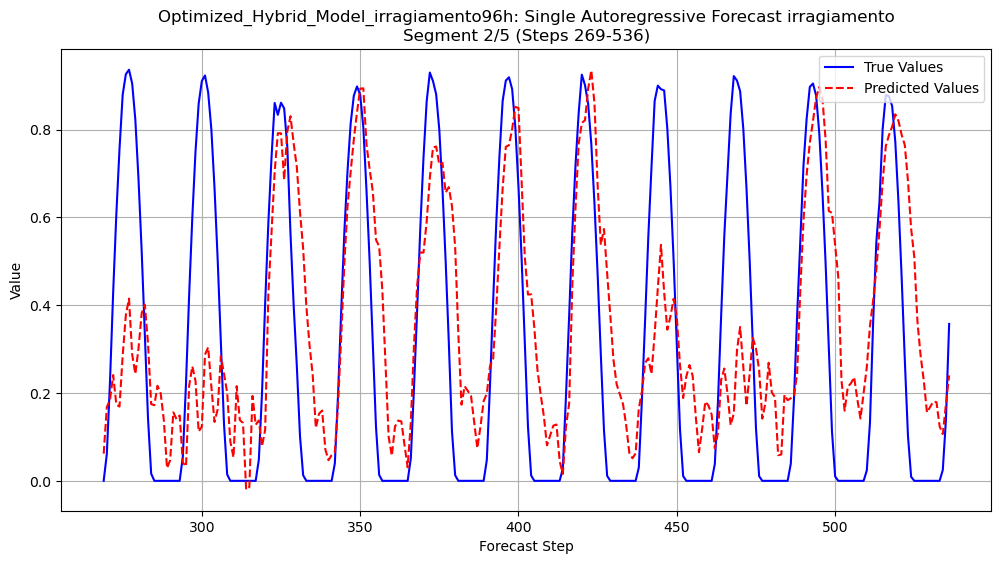

Segment plot saved to: inference_plots/Optimized_Hybrid_Model_irragiamento96h_segment2_20250324_222106.png


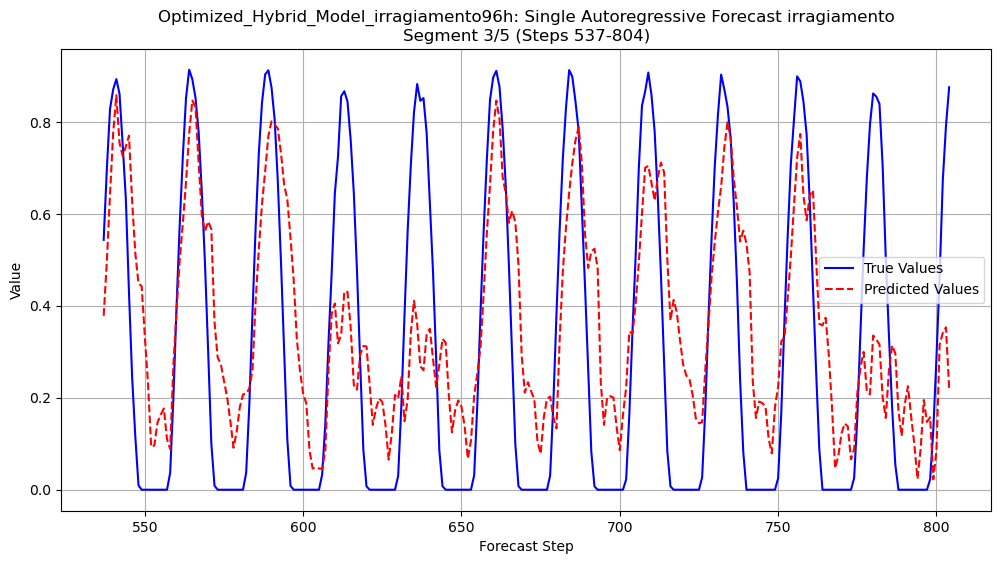

Segment plot saved to: inference_plots/Optimized_Hybrid_Model_irragiamento96h_segment3_20250324_222106.png


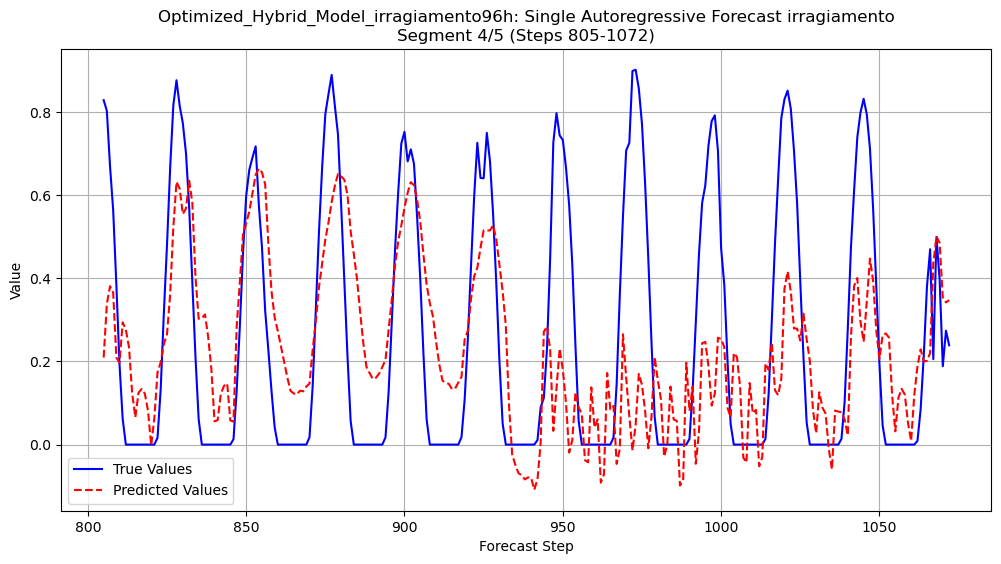

Segment plot saved to: inference_plots/Optimized_Hybrid_Model_irragiamento96h_segment4_20250324_222106.png


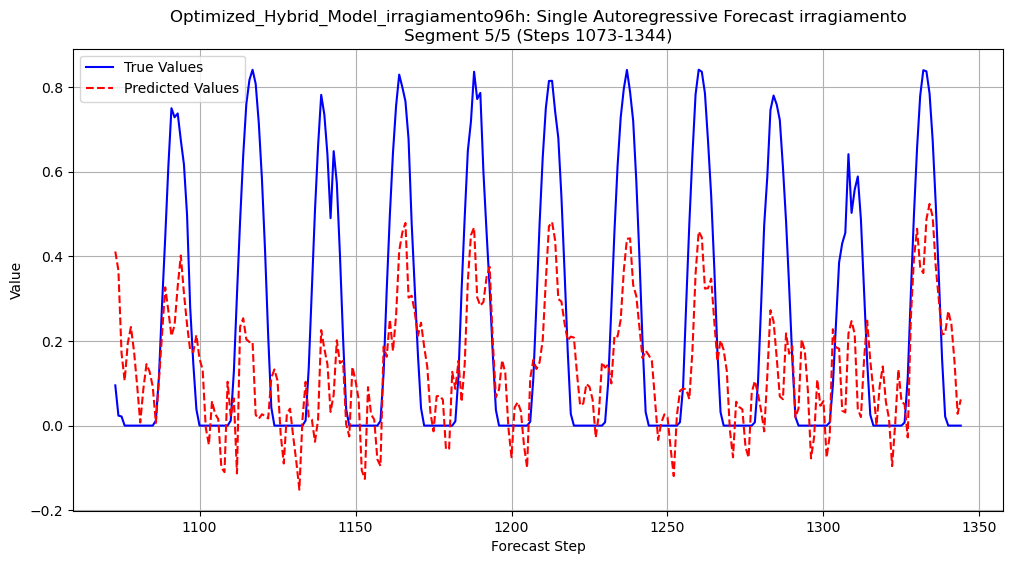

Segment plot saved to: inference_plots/Optimized_Hybrid_Model_irragiamento96h_segment5_20250324_222106.png


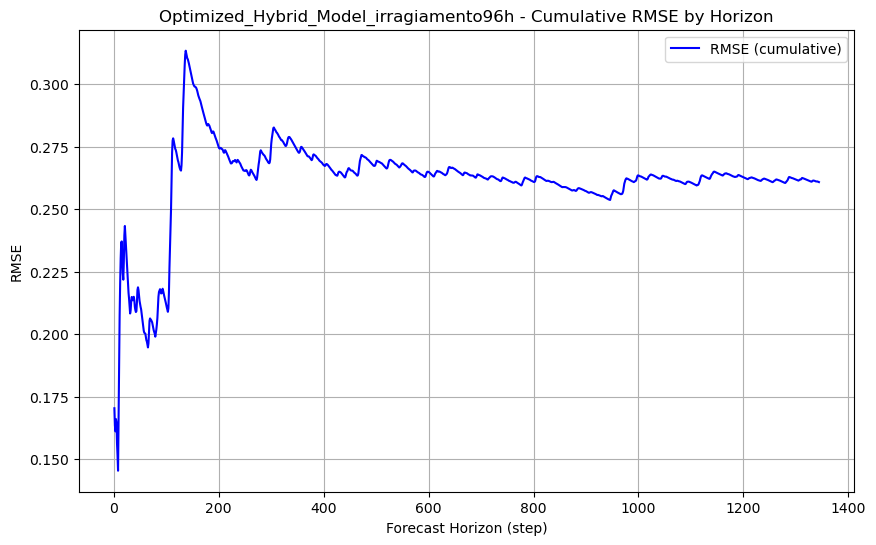

Cumulative RMSE plot saved to: inference_plots/Optimized_Hybrid_Model_irragiamento96h_cumulative_rmse_20250324_222106.png


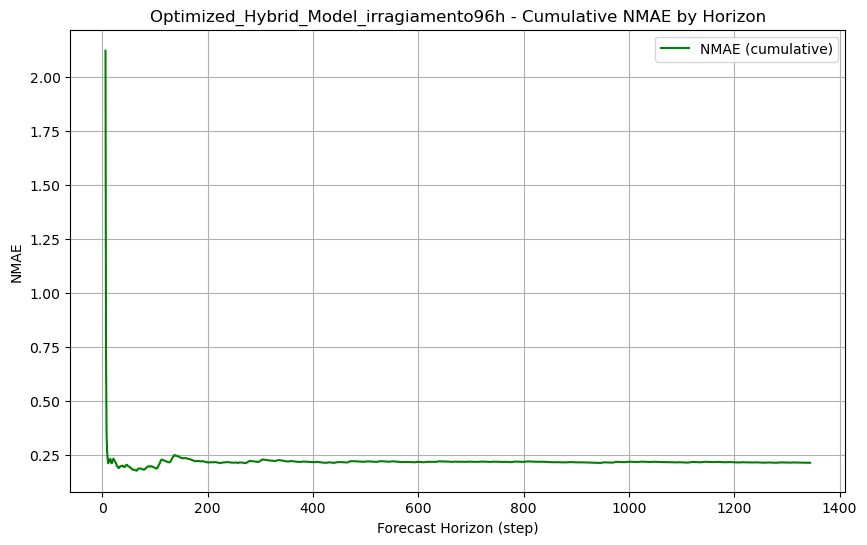

Cumulative NMAE plot saved to: inference_plots/Optimized_Hybrid_Model_irragiamento96h_cumulative_nmae_20250324_222106.png

Esperimento per input width = 168 (ore)
Shapes:
 X_stat_train: (9004, 7)
 X_dyn_train: (9004, 168, 3)
 y_train: (9004,)
Starting Grid Search...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.



Training model with params: learning_rate=0.005, dropout_rate=0.2, static_units=50, lstm_units=50, batch_size=32

Training model with params: learning_rate=0.001, dropout_rate=0.2, static_units=150, lstm_units=50, batch_size=32

Training model with params: learning_rate=0.005, dropout_rate=0.2, static_units=50, lstm_units=100, batch_size=32

Training model with params: learning_rate=0.001, dropout_rate=0.2, static_units=150, lstm_units=100, batch_size=32

Training model with params: learning_rate=0.001, dropout_rate=0.2, static_units=100, lstm_units=50, batch_size=32

Training model with params: learning_rate=0.001, dropout_rate=0.2, static_units=50, lstm_units=100, batch_size=32

Training model with params: learning_rate=0.001, dropout_rate=0.2, static_units=100, lstm_units=150, batch_size=32
Training model with params: learning_rate=0.005, dropout_rate=0.2, static_units=150, lstm_units=50, batch_size=32


Training model with params: learning_rate=0.005, dropout_rate=0.2, static_unit

[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed: 62.7min


Completed in 4825.75s - Val Loss: 0.012542

Training model with params: learning_rate=0.001, dropout_rate=0.3, static_units=50, lstm_units=50, batch_size=32
Completed in 4846.32s - Val Loss: 0.012511

Training model with params: learning_rate=0.001, dropout_rate=0.3, static_units=100, lstm_units=50, batch_size=32
Completed in 3175.57s - Val Loss: nan

Training model with params: learning_rate=0.001, dropout_rate=0.3, static_units=150, lstm_units=50, batch_size=32
Completed in 1195.77s - Val Loss: 0.013361

Training model with params: learning_rate=0.001, dropout_rate=0.3, static_units=50, lstm_units=100, batch_size=32
Completed in 1202.83s - Val Loss: 0.013742

Training model with params: learning_rate=0.001, dropout_rate=0.3, static_units=100, lstm_units=100, batch_size=32
Completed in 3143.83s - Val Loss: nan

Training model with params: learning_rate=0.001, dropout_rate=0.3, static_units=150, lstm_units=100, batch_size=32
Completed in 3132.06s - Val Loss: nan

Training model with pa

/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



Training model with params: learning_rate=0.005, dropout_rate=0.3, static_units=100, lstm_units=150, batch_size=32
Completed in 3181.18s - Val Loss: nan

Training model with params: learning_rate=0.005, dropout_rate=0.3, static_units=150, lstm_units=150, batch_size=32
Completed in 3224.56s - Val Loss: nan

Training model with params: learning_rate=0.01, dropout_rate=0.3, static_units=50, lstm_units=50, batch_size=32
Completed in 6754.01s - Val Loss: nan

Training model with params: learning_rate=0.01, dropout_rate=0.3, static_units=100, lstm_units=50, batch_size=32
Completed in 738.13s - Val Loss: nan

Training model with params: learning_rate=0.01, dropout_rate=0.3, static_units=150, lstm_units=50, batch_size=32
Completed in 7014.46s - Val Loss: nan

Training model with params: learning_rate=0.01, dropout_rate=0.3, static_units=50, lstm_units=100, batch_size=32
Completed in 716.89s - Val Loss: nan

Training model with params: learning_rate=0.01, dropout_rate=0.3, static_units=100, ls

[Parallel(n_jobs=-1)]: Done 134 tasks      | elapsed: 639.4min


Completed in 1091.95s - Val Loss: 0.018775

Training model with params: learning_rate=0.005, dropout_rate=0.5, static_units=100, lstm_units=100, batch_size=64
Completed in 1112.73s - Val Loss: 0.039428

Training model with params: learning_rate=0.005, dropout_rate=0.5, static_units=150, lstm_units=100, batch_size=64
Completed in 8778.20s - Val Loss: 0.012371

Training model with params: learning_rate=0.005, dropout_rate=0.5, static_units=50, lstm_units=150, batch_size=64
Completed in 5273.86s - Val Loss: nan

Training model with params: learning_rate=0.005, dropout_rate=0.5, static_units=100, lstm_units=150, batch_size=64
Completed in 5381.08s - Val Loss: nan

Training model with params: learning_rate=0.005, dropout_rate=0.5, static_units=150, lstm_units=150, batch_size=64
Completed in 5147.08s - Val Loss: nan

Training model with params: learning_rate=0.01, dropout_rate=0.5, static_units=50, lstm_units=50, batch_size=64
Completed in 8706.19s - Val Loss: 0.012694

Training model with p

[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed: 1051.4min finished



Final Test Loss with Best Model (input width 168): [1.3834811449050903, 1.3834811449050903]
Best model saved as 'best_hybrid_model_lstm_irragiamento_168h.h5'
Executing single-chain autoregressive inference from the BEGINNING with Optimized_Hybrid_Model_irragiamento168h (input_width=168)...
Forecast steps reduced to 1272 to match dataset length.
Single-chain forecast completed. Global RMSE=0.26, Global NMAE=0.2147
Results saved to Hybrid_model_single_forecast_irragiamento168h.xlsx


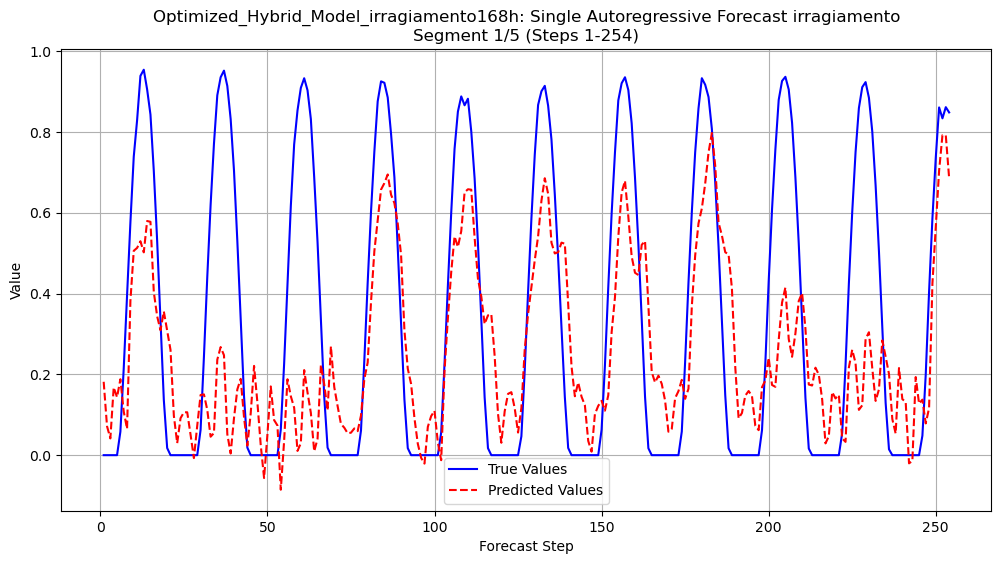

Segment plot saved to: inference_plots/Optimized_Hybrid_Model_irragiamento168h_segment1_20250325_155306.png


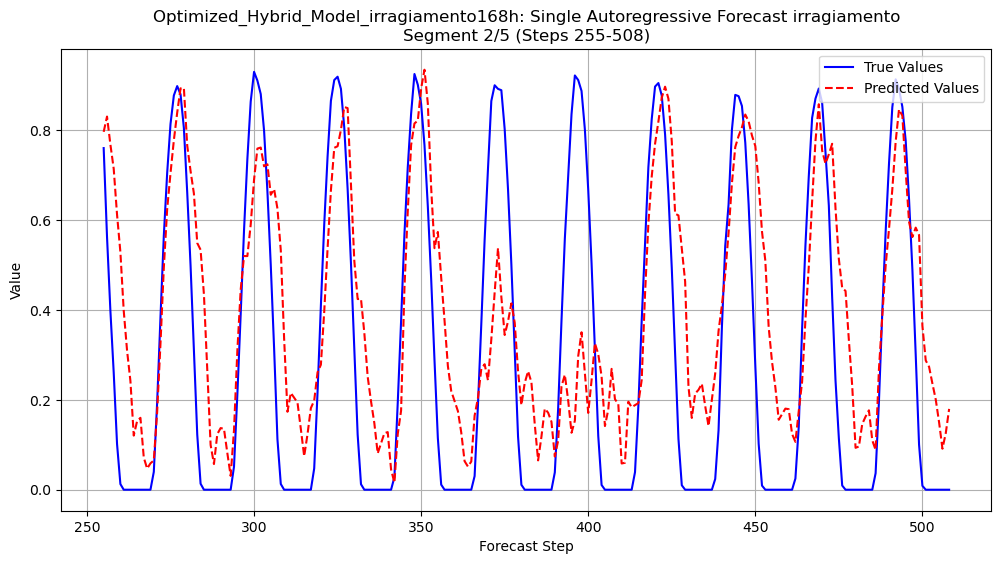

Segment plot saved to: inference_plots/Optimized_Hybrid_Model_irragiamento168h_segment2_20250325_155306.png


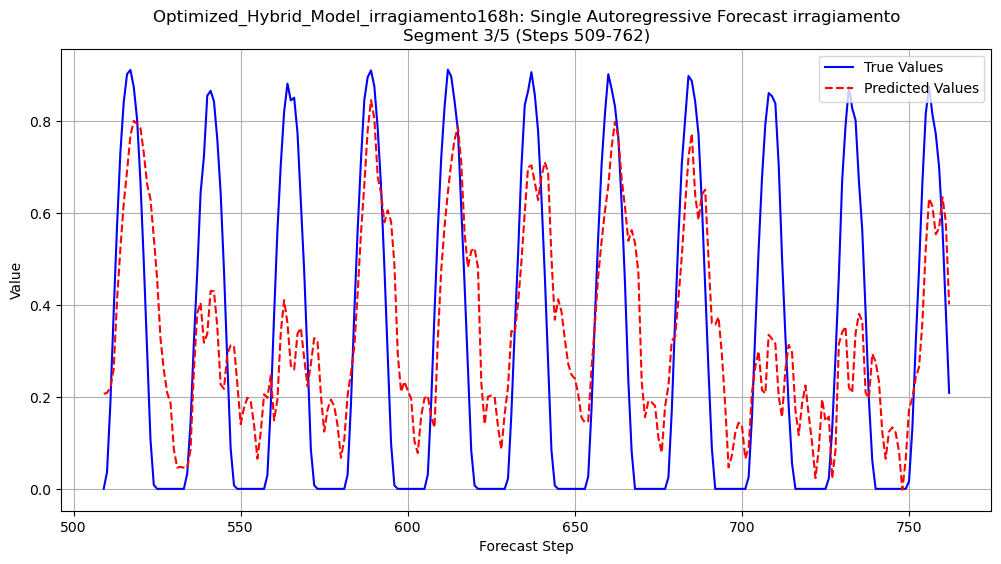

Segment plot saved to: inference_plots/Optimized_Hybrid_Model_irragiamento168h_segment3_20250325_155306.png


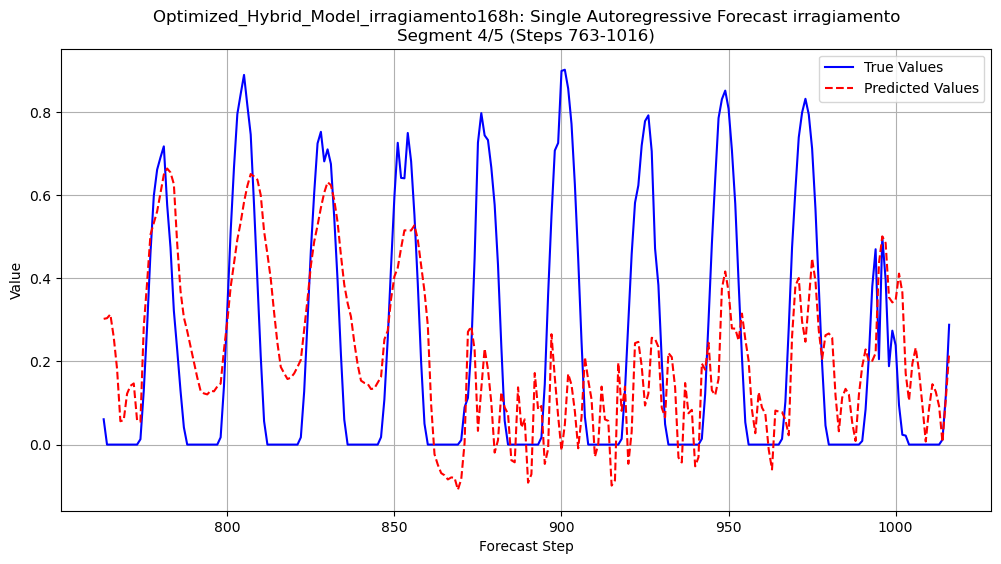

Segment plot saved to: inference_plots/Optimized_Hybrid_Model_irragiamento168h_segment4_20250325_155306.png


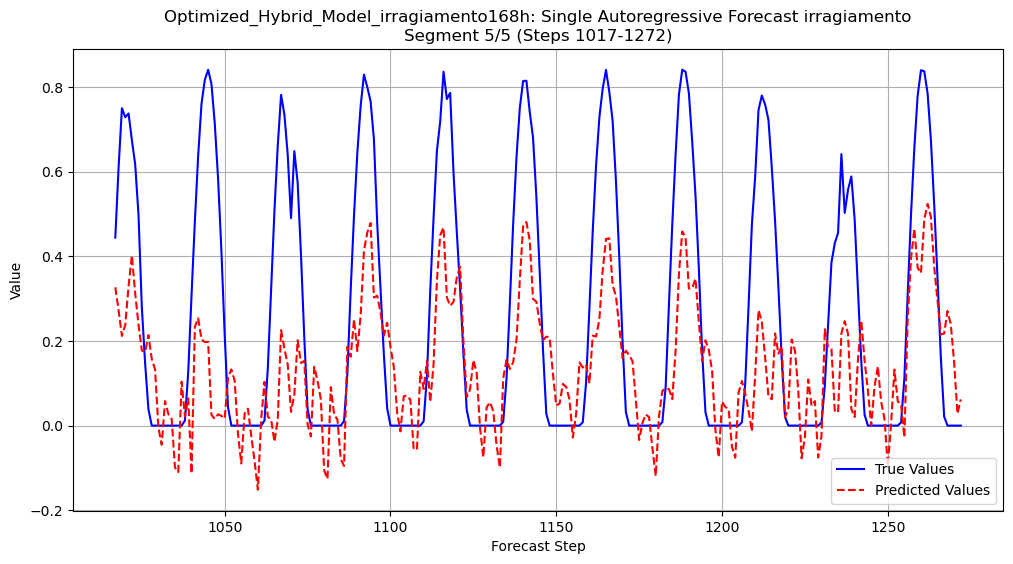

Segment plot saved to: inference_plots/Optimized_Hybrid_Model_irragiamento168h_segment5_20250325_155306.png


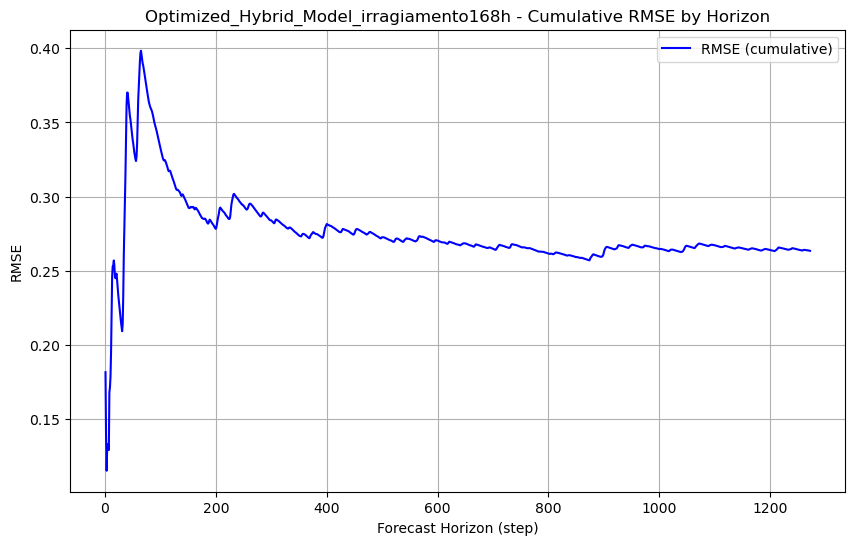

Cumulative RMSE plot saved to: inference_plots/Optimized_Hybrid_Model_irragiamento168h_cumulative_rmse_20250325_155306.png


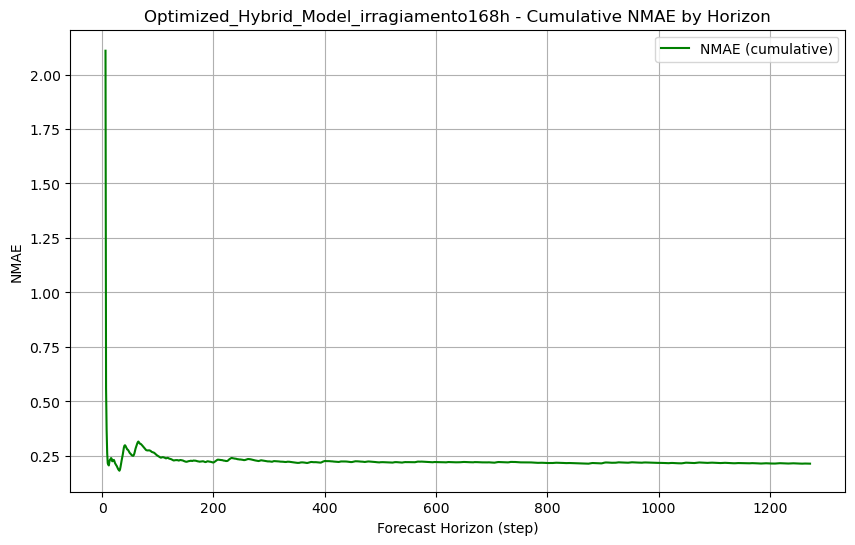

Cumulative NMAE plot saved to: inference_plots/Optimized_Hybrid_Model_irragiamento168h_cumulative_nmae_20250325_155306.png


In [15]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense, LSTM, Concatenate, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import ParameterGrid
import matplotlib.pyplot as plt
import os
import random as rd
from joblib import Parallel, delayed
import time
from datetime import datetime
from sklearn.metrics import mean_squared_error

# --- DEFINIZIONE DELLE FEATURES ---
static_features = ['Year sin', 'Year cos', 'Hour sin', 'Hour cos', 
                   'Day sin', 'Day cos', 'Nuvolosità [%]']
dynamic_features = ['Irraggiamento [kWh/m2]', 'Temperatura [K]', 'Potenza Uffici [W]']
target_col = 'Irraggiamento [kWh/m2]'

# --- FUNZIONE PER CREARE IL DATASET ---
def create_dataset(df, window_size, static_feats, dynamic_feats, target):
    X_stat, X_dyn, y = [], [], []
    # Iniziamo da index = window_size per avere a disposizione i dati precedenti
    for i in range(window_size, len(df)):
        # Finestra delle feature dinamiche: [i-window_size, i)
        dyn_window = df[dynamic_feats].iloc[i-window_size:i].values
        X_dyn.append(dyn_window)
        
        # Feature statiche al timestep i
        stat_current = df[static_feats].iloc[i].values
        X_stat.append(stat_current)
        
        # Target al timestep i
        y.append(df[target].iloc[i])
    
    return np.array(X_stat), np.array(X_dyn), np.array(y)

# --- FUNZIONE PER CREARE IL MODELLO ---
def create_model(learning_rate, dropout_rate, window_size, model__static_units, model__lstm_units):
    tf.keras.backend.clear_session()
    
    input_stat = Input(shape=(len(static_features),), name='input_static')
    input_dyn = Input(shape=(window_size, len(dynamic_features)), name='input_dynamic')

    # Ramo statico
    x_stat = Dense(model__static_units, activation='relu')(input_stat)
    x_stat = Dropout(dropout_rate)(x_stat)

    # Ramo dinamico
    x_dyn = LSTM(model__lstm_units, activation='relu', return_sequences=True)(input_dyn)
    x_dyn = Dropout(dropout_rate)(x_dyn)
    x_dyn = LSTM(model__lstm_units, activation='relu', return_sequences=True)(x_dyn)
    x_dyn = LSTM(model__lstm_units, activation='relu', return_sequences=False)(x_dyn)
    x_dyn = Dropout(dropout_rate)(x_dyn)

    # Concatenazione dei due rami (entrambi ora hanno dimensione 2D)
    merged = Concatenate()([x_stat, x_dyn])
    output = Dense(1)(merged)

    model = Model(inputs=[input_stat, input_dyn], outputs=output)
    
    # Compilazione con Adam e learning rate personalizzato
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, 
                  loss='mean_squared_error', 
                  metrics=['mean_squared_error'])
    
    return model

# --- FUNZIONE PER TRAINING E VALUTAZIONE ---
def train_and_evaluate(params, window_size, X_stat_train, X_dyn_train, y_train, X_stat_val, X_dyn_val, y_val):
    learning_rate = params['learning_rate']
    dropout_rate = params['dropout_rate']
    model__static_units = params['model__static_units']
    model__lstm_units = params['model__lstm_units']
    batch_size = params['batch_size']
    
    print(f"\nTraining model with params: learning_rate={learning_rate}, dropout_rate={dropout_rate}, "
          f"static_units={model__static_units}, lstm_units={model__lstm_units}, batch_size={batch_size}")
    
    # Creazione del modello con i parametri correnti
    model = create_model(learning_rate, dropout_rate, window_size, model__static_units, model__lstm_units)
    
    # Early stopping per evitare overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)
    
    # Training
    start_time = time.time()
    history = model.fit(
        x=[X_stat_train, X_dyn_train],
        y=y_train,
        validation_data=([X_stat_val, X_dyn_val], y_val),
        epochs=50,
        batch_size=batch_size,
        callbacks=[early_stopping],
        verbose=0
    )
    
    # Valutazione su validation set
    val_loss = model.evaluate([X_stat_val, X_dyn_val], y_val, verbose=0)[0]
    training_time = time.time() - start_time
    
    print(f"Completed in {training_time:.2f}s - Val Loss: {val_loss:.6f}")
    
    return {
        'params': params,
        'val_loss': val_loss,
        'history': history.history,
        'model': model,
        'training_time': training_time
    }

# --- DEFINIZIONE DELLA GRID DEI PARAMETRI ---
param_grid = {
    'learning_rate': [0.001, 0.005, 0.01],
    'dropout_rate': [0.2, 0.3, 0.5],
    'model__static_units': [50, 100,150],
    'model__lstm_units': [50, 100,150],
    'batch_size': [32, 64, 128]
}
grid = list(ParameterGrid(param_grid))
print(f"Total parameter combinations: {len(grid)}")

# --- FUNZIONE PER L'INFERENZA AUTOREGRESSIVA CON PLOTTING ---
def single_chain_autoregressive_inference_with_plots(
    model,
    data_evaluation,       # dati in scala reale
    static_features,
    dynamic_features,
    input_width,
    forecast_steps,
    target,
    train_mean,            # dizionario con la media di ogni colonna
    train_std,             # dizionario con la std di ogni colonna
    model_name='Hybrid_Model',
    output_filename='predictions_single_chain.xlsx'
):
    print(f"Executing single-chain autoregressive inference from the BEGINNING with {model_name} (input_width={input_width})...")
    
    if len(data_evaluation) < input_width + forecast_steps:
        forecast_steps=forecast_steps-input_width
        print(f"Forecast steps reduced to {forecast_steps} to match dataset length.")
    
    data_real = data_evaluation.copy()
    data_std = data_evaluation.copy()
    for col in data_std.columns:
        if col in train_mean and col in train_std:
            data_std[col] = (data_std[col] - train_mean[col]) / train_std[col]
        else:
            print(f"Warning: colonna '{col}' non presente in train_mean/std, lasciata invariata.")
    
    current_window = data_std.iloc[0 : input_width + forecast_steps].copy()
    
    predictions_std = np.zeros(forecast_steps)
    predictions_real = np.zeros(forecast_steps)
    
    for step in range(forecast_steps):
        local_idx = input_width + step
        
        # Preparazione delle feature statiche (1 riga)
        X_stat_current = current_window[static_features].iloc[local_idx - 1 : local_idx].values
        # Preparazione della finestra dinamica (ultimi input_width timestep)
        X_dyn_window = current_window[dynamic_features].iloc[step : step + input_width].values
        X_dyn_window = X_dyn_window.reshape(1, input_width, len(dynamic_features))
        
        # Predizione
        y_pred_std = model.predict([X_stat_current, X_dyn_window], verbose=0)[0][0]
        predictions_std[step] = y_pred_std
        
        # Destandardizzazione
        y_pred_real = y_pred_std * train_std[target] + train_mean[target]
        predictions_real[step] = y_pred_real
        
        # Reinserimento della predizione per autoregressione
        if step < forecast_steps - 1:
            current_window.at[current_window.index[local_idx], target] = y_pred_std

    true_values_real = data_real[target].iloc[input_width : input_width + forecast_steps].values

    rmse_full = np.sqrt(mean_squared_error(true_values_real, predictions_real))
    mae_full = np.mean(np.abs(true_values_real - predictions_real))
    data_range = np.max(true_values_real) - np.min(true_values_real) if len(true_values_real) > 0 else 1
    nmae_full = mae_full / data_range if data_range != 0 else np.nan
    print(f"Single-chain forecast completed. Global RMSE={rmse_full:.2f}, Global NMAE={nmae_full:.4f}")
    
    results_df = pd.DataFrame({
        'Step': np.arange(1, forecast_steps + 1),
        'True_Values': true_values_real,
        'Predicted_Values': predictions_real
    })
    with pd.ExcelWriter(output_filename) as writer:
        results_df.to_excel(writer, sheet_name='Single_Forecast', index=False)
    print(f"Results saved to {output_filename}")
    
    plots_dir = "inference_plots"
    if not os.path.exists(plots_dir):
        os.makedirs(plots_dir)
    
    num_groups = 5
    group_size = forecast_steps // num_groups
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    
    for group in range(num_groups):
        start_h = group * group_size
        end_h = (group + 1) * group_size if group < num_groups - 1 else forecast_steps
        xvals = np.arange(start_h + 1, end_h + 1)
        
        plt.figure(figsize=(12,6))
        plt.plot(xvals, true_values_real[start_h:end_h], label='True Values', color='blue')
        plt.plot(xvals, predictions_real[start_h:end_h], label='Predicted Values', color='red', linestyle='--')
        plt.title(f'{model_name}: Single Autoregressive Forecast irragiamento\nSegment {group+1}/{num_groups} (Steps {start_h+1}-{end_h})')
        plt.xlabel('Forecast Step')
        plt.ylabel('Value')
        plt.legend()
        plt.grid(True)
        
        segment_filename = f"{plots_dir}/{model_name}_segment{group+1}_{timestamp}.png"
        plt.savefig(segment_filename, dpi=300, bbox_inches='tight')
        plt.show()
        print(f"Segment plot saved to: {segment_filename}")
    
    horizon_rmse = np.zeros(forecast_steps)
    horizon_nmae = np.zeros(forecast_steps)
    for h in range(1, forecast_steps + 1):
        tv = true_values_real[:h]
        pv = predictions_real[:h]
        rmse_h = np.sqrt(mean_squared_error(tv, pv))
        mae_h = np.mean(np.abs(tv - pv))
        rng = np.max(tv) - np.min(tv) if len(tv) > 0 else 1
        nmae_h = mae_h / rng if rng != 0 else np.nan
        horizon_rmse[h-1] = rmse_h
        horizon_nmae[h-1] = nmae_h
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, forecast_steps + 1), horizon_rmse, label='RMSE (cumulative)', color='blue')
    plt.title(f'{model_name} - Cumulative RMSE by Horizon')
    plt.xlabel('Forecast Horizon (step)')
    plt.ylabel('RMSE')
    plt.grid(True)
    plt.legend()
    rmse_filename = f"{plots_dir}/{model_name}_cumulative_rmse_{timestamp}.png"
    plt.savefig(rmse_filename, dpi=300, bbox_inches='tight')
    plt.show()
    print(f"Cumulative RMSE plot saved to: {rmse_filename}")
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, forecast_steps + 1), horizon_nmae, label='NMAE (cumulative)', color='green')
    plt.title(f'{model_name} - Cumulative NMAE by Horizon')
    plt.xlabel('Forecast Horizon (step)')
    plt.ylabel('NMAE')
    plt.grid(True)
    plt.legend()
    nmae_filename = f"{plots_dir}/{model_name}_cumulative_nmae_{timestamp}.png"
    plt.savefig(nmae_filename, dpi=300, bbox_inches='tight')
    plt.show()
    print(f"Cumulative NMAE plot saved to: {nmae_filename}")
    
    return predictions_real, true_values_real

# --- ESECUZIONE DEL WORKFLOW PER DIVERSI INPUT WIDTH ---
input_widths = [24, 48, 96, 168]
forecast_steps = 1440  # Puoi modificare questo valore se necessario

for window_size in input_widths:
    print("\n" + "="*60)
    print(f"Esperimento per input width = {window_size} (ore)")
    print("="*60)
    
    # Creazione dei dataset per l'input width corrente
    X_stat_train, X_dyn_train, y_train = create_dataset(train_data_std, window_size, static_features, dynamic_features, target_col)
    X_stat_val, X_dyn_val, y_val = create_dataset(val_data_std, window_size, static_features, dynamic_features, target_col)
    X_stat_test, X_dyn_test, y_test = create_dataset(test_data_std, window_size, static_features, dynamic_features, target_col)
    
    print("Shapes:")
    print(" X_stat_train:", X_stat_train.shape)
    print(" X_dyn_train:", X_dyn_train.shape)
    print(" y_train:", y_train.shape)
    
    # Esecuzione della grid search in parallelo
    print("Starting Grid Search...")
    results = Parallel(n_jobs=-1, verbose=2)(
        delayed(train_and_evaluate)(
            params, window_size, X_stat_train, X_dyn_train, y_train, X_stat_val, X_dyn_val, y_val
        ) for params in grid
    )
    
    # Ordinamento dei risultati per validation loss
    results.sort(key=lambda x: x['val_loss'])
    
    print("\nGrid Search Results (sorted by validation loss):")
    for i, result in enumerate(results):
        params = result['params']
        val_loss = result['val_loss']
        time_taken = result['training_time']
        print(f"{i+1}. Val Loss: {val_loss:.6f}, Learning Rate: {params['learning_rate']}, "
              f"Dropout Rate: {params['dropout_rate']}, Batch Size: {params['batch_size']}, "
              f"Static Units: {params['model__static_units']}, LSTM Units: {params['model__lstm_units']}, "
              f"Time: {time_taken:.2f}s")
    
    # Recupero del miglior modello
    best_result_irragiamento = results[0]
    best_model_irragiamento = best_result['model']
    best_params_irragiamento = best_result['params']
    
    print(f"\nBest Model Parameters for input width {window_size}:")
    print(f"  Learning Rate: {best_params_irragiamento['learning_rate']}")
    print(f"  Dropout Rate: {best_params_irragiamento['dropout_rate']}")
    print(f"  Static Units: {best_params_irragiamento['model__static_units']}")
    print(f"  LSTM Units: {best_params_irragiamento['model__lstm_units']}")
    print(f"  Batch Size: {best_params_irragiamento['batch_size']}")
    print(f"  Validation Loss: {best_result_irragiamento['val_loss']:.6f}")
    
    # Test finale con il modello migliore
    test_loss = best_model.evaluate([X_stat_test, X_dyn_test], y_test, verbose=0)
    print(f"\nFinal Test Loss with Best Model (input width {window_size}): {test_loss}")
    
    # Salvataggio del modello migliore (nome che include il window_size)
    model_filename = f"best_hybrid_model_lstm_irragiamento_{window_size}h.h5"
    best_model_irragiamento.save(model_filename)
    print(f"Best model saved as '{model_filename}'")
    
    # Esecuzione dell'inferenza autoregressiva con plotting
    pred_real, true_real = single_chain_autoregressive_inference_with_plots(
        model=best_model_irragiamento,
        data_evaluation=evaluation_data,
        static_features=static_features,
        dynamic_features=dynamic_features,
        input_width=window_size,
        forecast_steps=forecast_steps,
        target=target_col,
        train_mean=data_mean,
        train_std=data_devstd,
        model_name=f'Optimized_Hybrid_Model_irragiamento{window_size}h',
        output_filename=f'Hybrid_model_single_forecast_irragiamento{window_size}h.xlsx'
    )

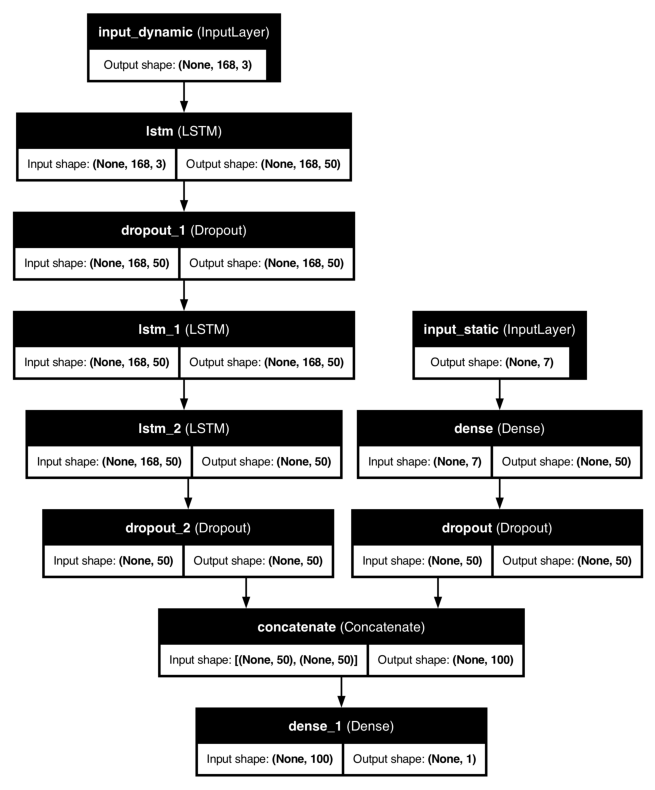

In [17]:
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import tensorflow as tf

# Supponiamo che il tuo modello sia chiamato 'model'
plot_model(best_model_irragiamento, to_file='model_structure.png', show_shapes=True, show_layer_names=True)

# Carica e mostra l'immagine generata
img = plt.imread('model_structure.png')
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()